In [1]:
import pandas as pd
import numpy as np
import glob
from scipy import stats

In [2]:
print(pd.__version__)

1.4.4


In [3]:
carpeta="data/Only_training_hipotesis_salida/"

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/Only_training_hipotesis_salida\\pTEST_new_0.05_0.csv.pickle'

In [6]:
df= pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,ma_umbral,target_prediction
0,0,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.27006608, 0.5092243...","[0.010533879, 0.12306667, 0.86639947]","[0.0, 0.0, 1.0]",0,5974,...,contradiction_contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,ADJ}, there{there,ADV}, is{be,VERB}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.8723953, 0.10360007, 0.060492776...","[0.9748248, 0.019451505, 0.005723763]","[1.0, 0.0, 0.0]",0,9031,NOUN VERB ADV A...,entailment_entailment
2,2,"[NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...","[NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.27006608, 0.3649431, 0.41940242,...","[0.0019956813, 0.9582574, 0.039746977]","[0.0, 1.0, 0.0]",0,6904,...,neutral_neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, individual{indivi...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.51841784, 0.4755275...","[0.91099256, 0.069450915, 0.019556593]","[1.0, 0.0, 0.0]",0,7300,...,entailment_entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, the{the,DET}, kids{kid,NOUN...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.45478085, 0.0918647...","[0.004923836, 0.4795705, 0.51550573]","[0.0, 0.0, 1.0]",0,7779,...,contradiction_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
675,675,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, he{-PRON-,PRON}, has{have,V...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.5841148, 0.13640098, 1.8738387, ...","[0.005338389, 0.016108144, 0.97855353]","[0.0, 0.0, 1.0]",1,9610,...,contradiction_contradiction
676,676,"[NULL{null,ADJ}, girl{girl,NOUN}, wearing{wear...","[NULL{null,ADJ}, one{one,NUM}, plays{play,VERB...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.38066497, 1.4112635, 0.33594915,...","[0.012315239, 0.9340731, 0.0536117]","[0.0, 1.0, 0.0]",1,9708,NOUN \ NOUN ...,neutral_neutral
677,677,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, ma{ma,NOUN}, ...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.7470652, 0.10360007...","[0.26409826, 0.2838331, 0.4520687]","[0.0, 1.0, 0.0]",1,9726,...,neutral_contradiction
678,678,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, one{one,NUM}, reward{reward,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.38066497, 0.8718114, 0.060492776...","[0.008782644, 0.64532804, 0.34588933]","[0.0, 1.0, 0.0]",1,9764,NOUN...,neutral_neutral


In [7]:
df.Hipotesis[0]

['NULL{null,PROPN}',
 'the{the,DET}',
 'two{two,NUM}',
 'women{woman,NOUN}',
 'are{be,VERB}',
 'walking{walk,VERB}',
 'down{down,ADP}',
 'the{the,DET}',
 'shore{shore,NOUN}',
 'drinking{drink,VERB}',
 'tea{tea,NOUN}',
 '.{.,PUNCT}']

In [8]:
df.Text[0]

['NULL{null,ADJ}',
 'two{two,NUM}',
 'women{woman,NOUN}',
 'drink{drink,VERB}',
 'coffee{coffee,NOUN}',
 'and{and,CCONJ}',
 'chat{chat,NOUN}',
 'while{while,ADP}',
 'sitting{sit,VERB}',
 'on{on,ADP}',
 'a{a,DET}',
 'blanket{blanket,NOUN}',
 'near{near,ADP}',
 'a{a,DET}',
 'rocky{rocky,ADJ}',
 'shore{shore,NOUN}',
 '.{.,PUNCT}']

In [9]:
print(len(df.Hipotesis[0]))
print(len(df.Text[0]))

12
17


In [10]:
m=df.M_Align[0][1:11,1:10]

In [11]:
m

array([[4.87095769e-03, 5.87826848e-01, 5.14100373e-01, 2.69138515e-02,
        1.35315344e-01, 1.40165031e-01, 4.87095769e-03, 2.17384279e-01,
        1.88551724e-01],
       [0.00000000e+00, 5.14100373e-01, 5.51725721e+00, 7.56270345e-03,
        2.45032087e-01, 1.68814898e-01, 0.00000000e+00, 2.96593457e-01,
        9.02343690e-01],
       [3.56028351e-04, 1.36258200e-01, 9.67270851e-01, 4.88911383e-02,
        9.59482193e-01, 4.19985950e-01, 3.56028351e-04, 1.55770266e+00,
        3.33014727e+00],
       [6.72560185e-03, 1.29627839e-01, 7.32588172e-01, 1.80210043e-02,
        1.02016234e+00, 3.73384625e-01, 6.72560185e-03, 2.11892056e+00,
        3.19531178e+00],
       [1.43466308e-03, 2.50272499e-03, 1.62478611e-02, 1.12456437e-02,
        8.24797899e-02, 5.82045205e-02, 1.43466308e-03, 0.00000000e+00,
        3.10578123e-02],
       [8.87567550e-03, 2.71313816e-01, 1.36057770e+00, 7.97598809e-02,
        1.28834605e+00, 5.14888108e-01, 8.87567550e-03, 6.45897567e-01,
        1.9

In [12]:
import scipy.stats

In [13]:
c=np.corrcoef(m)

In [14]:
c

array([[ 1.        ,  0.62239667,  0.1259137 ,  0.08895169, -0.12099821,
         0.31957371, -0.05750519, -0.11004365, -0.17913765,  0.26466226],
       [ 0.62239667,  1.        ,  0.18608167,  0.09260108, -0.05965628,
         0.48767248, -0.04136389, -0.17887087, -0.22587134,  0.02184374],
       [ 0.1259137 ,  0.18608167,  1.        ,  0.98029519,  0.214985  ,
         0.86143035,  0.29587038,  0.32873753,  0.25845371,  0.67746146],
       [ 0.08895169,  0.09260108,  0.98029519,  1.        ,  0.17019251,
         0.79033989,  0.27736745,  0.34778089,  0.28211532,  0.59883643],
       [-0.12099821, -0.05965628,  0.214985  ,  0.17019251,  1.        ,
         0.49780501,  0.9799443 ,  0.93158287,  0.93399358,  0.32043769],
       [ 0.31957371,  0.48767248,  0.86143035,  0.79033989,  0.49780501,
         1.        ,  0.55681844,  0.4952015 ,  0.4338402 ,  0.69266044],
       [-0.05750519, -0.04136389,  0.29587038,  0.27736745,  0.9799443 ,
         0.55681844,  1.        ,  0.97315357

In [15]:
import seaborn as sns

In [16]:
df.Hipotesis[0]

['NULL{null,PROPN}',
 'the{the,DET}',
 'two{two,NUM}',
 'women{woman,NOUN}',
 'are{be,VERB}',
 'walking{walk,VERB}',
 'down{down,ADP}',
 'the{the,DET}',
 'shore{shore,NOUN}',
 'drinking{drink,VERB}',
 'tea{tea,NOUN}',
 '.{.,PUNCT}']

In [17]:
df.Text[0]

['NULL{null,ADJ}',
 'two{two,NUM}',
 'women{woman,NOUN}',
 'drink{drink,VERB}',
 'coffee{coffee,NOUN}',
 'and{and,CCONJ}',
 'chat{chat,NOUN}',
 'while{while,ADP}',
 'sitting{sit,VERB}',
 'on{on,ADP}',
 'a{a,DET}',
 'blanket{blanket,NOUN}',
 'near{near,ADP}',
 'a{a,DET}',
 'rocky{rocky,ADJ}',
 'shore{shore,NOUN}',
 '.{.,PUNCT}']

<AxesSubplot:>

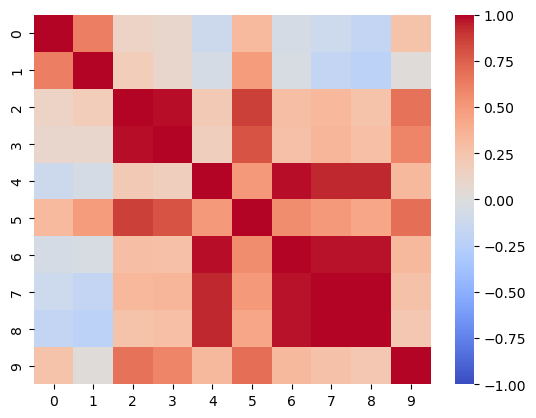

In [18]:
sns.heatmap(c,vmin=-1,vmax=1,cmap="coolwarm")

<AxesSubplot:>

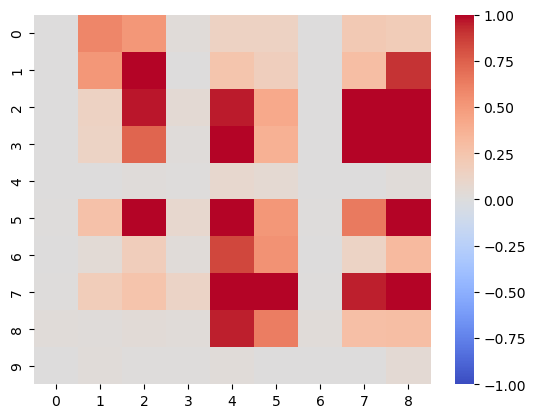

In [19]:
sns.heatmap(m,vmin=-1,vmax=1,cmap="coolwarm")

In [20]:
def normalize_2d(matrix,axis):
    norm = np.linalg.norm(matrix,axis=axis)
    if(axis==1):
        print(norm)
        matrix = matrix.T/norm  # normalized matrix
        return matrix.T
    else:
        matrix = matrix/norm  # normalized matrix
        return matrix

In [21]:
A=np.array([[1,2],[0,4],[5,6]]) 
B=np.array([[1,2,3],[3,4,5]])

In [22]:
np.dot(A,B)

array([[ 7, 10, 13],
       [12, 16, 20],
       [23, 34, 45]])

In [23]:
A

array([[1, 2],
       [0, 4],
       [5, 6]])

In [24]:
normalize_2d(A,1)

[2.23606798 4.         7.81024968]


array([[0.4472136 , 0.89442719],
       [0.        , 1.        ],
       [0.6401844 , 0.76822128]])

In [25]:
sas=pd.read_pickle(a[0])
sas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.2110...","[0.006305703, 0.06551562, 0.92817867]","[0.0, 0.0, 1.0]",0,5974,contradiction,contradiction,...,contradiction_contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,ADJ}, there{there,ADV}, is{be,VERB}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.016168319, 0.0140...","[0.99017394, 0.009517933, 0.00030803506]","[1.0, 0.0, 0.0]",0,9031,entailment,entailment,NOUN VERB ADP ...,entailment_entailment
2,2,"[NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...","[NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17911102, 0.09273...","[0.008069085, 0.9096557, 0.08227522]","[0.0, 1.0, 0.0]",0,6904,neutral,neutral,...,neutral_neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, individual{indivi...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.10867564, 0.0724...","[0.96718806, 0.028018078, 0.0047938903]","[1.0, 0.0, 0.0]",0,7300,entailment,entailment,...,entailment_entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, the{the,DET}, kids{kid,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17104001, 0.0249...","[0.066414595, 0.878744, 0.05484137]","[0.0, 0.0, 1.0]",0,7779,neutral,contradiction,...,contradiction_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,675,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, he{-PRON-,PRON}, has{have,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.023192137, 0.4689...","[0.013301309, 0.011364532, 0.9753341]","[0.0, 0.0, 1.0]",1,9610,contradiction,contradiction,...,contradiction_contradiction
676,676,"[NULL{null,ADJ}, girl{girl,NOUN}, wearing{wear...","[NULL{null,ADJ}, one{one,NUM}, plays{play,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.23011616, 0.1234...","[0.030716334, 0.96501446, 0.0042692097]","[0.0, 1.0, 0.0]",1,9708,neutral,neutral,...,neutral_neutral
677,677,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, ma{ma,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.11288659, 0.0161...","[0.4431446, 0.47437942, 0.08247595]","[0.0, 1.0, 0.0]",1,9726,neutral,neutral,...,neutral_neutral
678,678,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, one{one,NUM}, reward{reward,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.08744241, 0.0140...","[0.004797376, 0.39436302, 0.6008396]","[0.0, 1.0, 0.0]",1,9764,contradiction,neutral,...,neutral_contradiction


In [26]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'eigenvalues' : [],'eigenvectors' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_eigenvalues=[]
                l_eigenvectors=[]
                for index,strings in temp.iterrows():
                    m=strings[5][1:len(strings[1]),1:len(strings[2])]
                    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
                    x, v = np.linalg.eig (m_norm)
                    l_eigenvalues.append(x)
                    l_eigenvectors.append(v)
                new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
                new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
                new_data['Paraphrase'].append(i)
                l_eigenvalues.clear()
                l_eigenvectors.clear()
dfn=pd.DataFrame(new_data)

C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\2097832507.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

In [27]:
dfn.to_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [28]:
dfn=pd.read_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [29]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,91,entailment_entailment,"[[34.06696, 15.699168, 0.62297326, 2.6937077, ...","[[[-0.5499617, -0.2607019, -0.7279254, -0.3082...",0
1,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,7,entailment_neutral,"[[(118.48228+0j), (50.302605+0j), (17.296644+0...","[[[(-0.2567445+0j), (0.22602421+0j), (-0.48119...",0
2,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,3,entailment_contradiction,"[[64.443214, 32.065857, 12.665411, 8.325032, 1...","[[[-0.3081489, -0.5304618, -0.19804783, 0.7121...",0
3,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,135,17,neutral_entailment,"[[56.57543, 13.310407, 8.636808, 4.0915213, 0....","[[[-0.4409774, -0.08985088, -0.114130974, -0.8...",0
4,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,135,103,neutral_neutral,"[[128.64647, 46.066833, 40.945107, 11.419233, ...","[[[-0.25653696, -0.24812098, 0.5158268, 0.7711...",0
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[[39.09805, 18.501663, 1.779873, 8.443655, 7.1...","[[[-0.4879075, -0.032200847, -0.33555853, 0.80...",1
2174,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[[78.114746, 39.80463, 8.943453, 4.9040885, 0....","[[[-0.4752384, -0.129894, 0.07987505, 0.338838...",1
2175,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[[49.05619, 21.409735, 5.8213143, 0.08624716, ...","[[[-0.38634044, -0.4785809, -0.29811868, 0.282...",1
2176,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[[54.5868, 30.03044, 9.826063, 6.526256, -1.83...","[[[-0.38450018, 0.4377341, -0.3266299, -0.1258...",1


In [30]:
ejemplo1=dfn.eigenvalues[0][0]
ejemplo2=dfn.eigenvalues[0][1]
ejemplo3=dfn.eigenvalues[0][2]

In [31]:
import matplotlib.pyplot as plt
import math

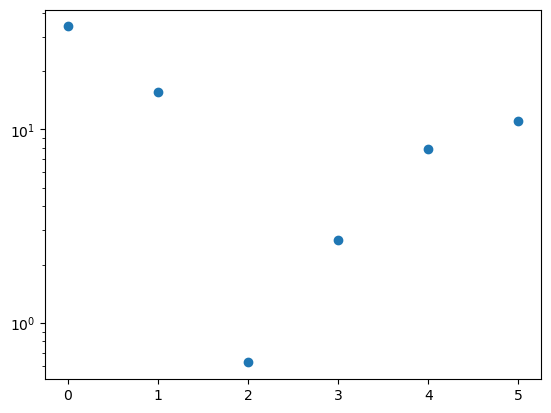

In [32]:
plt.scatter(x=np.arange(len(ejemplo1)),y=ejemplo1)
plt.yscale("log")

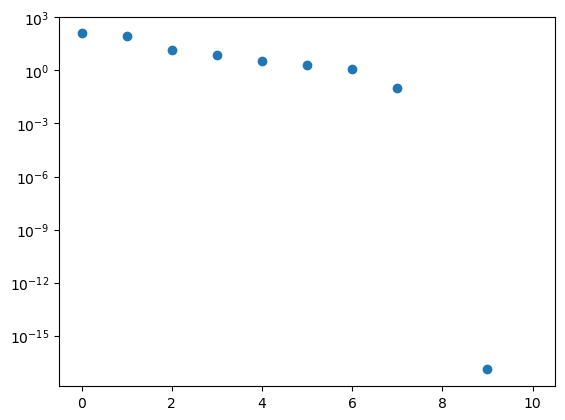

In [33]:
plt.scatter(x=np.arange(len(ejemplo2)),y=ejemplo2)
plt.yscale("log")

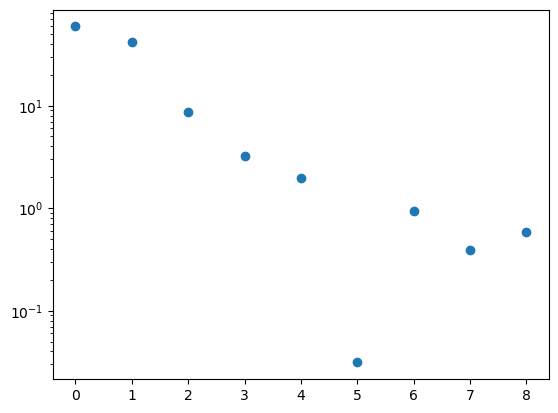

In [34]:
plt.scatter(x=np.arange(len(ejemplo3)),y=ejemplo3)
plt.yscale("log")

In [35]:
a=dfn.eigenvalues[0][4]

In [36]:
a

array([5.7765209e+01, 3.7312542e+01, 7.0059714e+00, 1.3454598e+00,
       3.8598973e-01, 1.1757654e-01, 6.2233459e-02, 5.0172606e-03],
      dtype=float32)

In [37]:
lista_eigenvalues=[]

In [38]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,91,entailment_entailment,"[[34.06696, 15.699168, 0.62297326, 2.6937077, ...","[[[-0.5499617, -0.2607019, -0.7279254, -0.3082...",0
1,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,7,entailment_neutral,"[[(118.48228+0j), (50.302605+0j), (17.296644+0...","[[[(-0.2567445+0j), (0.22602421+0j), (-0.48119...",0
2,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,101,3,entailment_contradiction,"[[64.443214, 32.065857, 12.665411, 8.325032, 1...","[[[-0.3081489, -0.5304618, -0.19804783, 0.7121...",0
3,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,135,17,neutral_entailment,"[[56.57543, 13.310407, 8.636808, 4.0915213, 0....","[[[-0.4409774, -0.08985088, -0.114130974, -0.8...",0
4,data/Only_training_hipotesis_salida\pTEST_new_...,5.0,0.csv.pickle,135,103,neutral_neutral,"[[128.64647, 46.066833, 40.945107, 11.419233, ...","[[[-0.25653696, -0.24812098, 0.5158268, 0.7711...",0
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2435,1904,neutral_neutral,"[[39.09805, 18.501663, 1.779873, 8.443655, 7.1...","[[[-0.4879075, -0.032200847, -0.33555853, 0.80...",1
2174,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2435,265,neutral_contradiction,"[[78.114746, 39.80463, 8.943453, 4.9040885, 0....","[[[-0.4752384, -0.129894, 0.07987505, 0.338838...",1
2175,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2264,122,contradiction_entailment,"[[49.05619, 21.409735, 5.8213143, 0.08624716, ...","[[[-0.38634044, -0.4785809, -0.29811868, 0.282...",1
2176,data/Only_training_hipotesis_salida\pTEST_new_...,100.0,0.csv.pickle,2264,287,contradiction_neutral,"[[54.5868, 30.03044, 9.826063, 6.526256, -1.83...","[[[-0.38450018, 0.4377341, -0.3266299, -0.1258...",1


In [39]:
grupos_box=dfn["grupo"].unique()

In [40]:
eti_box=dfn["E_P"].unique()

C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
C:\Users\Ninja\AppData\Local\Temp\ipykernel_10148\1409754109.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for f

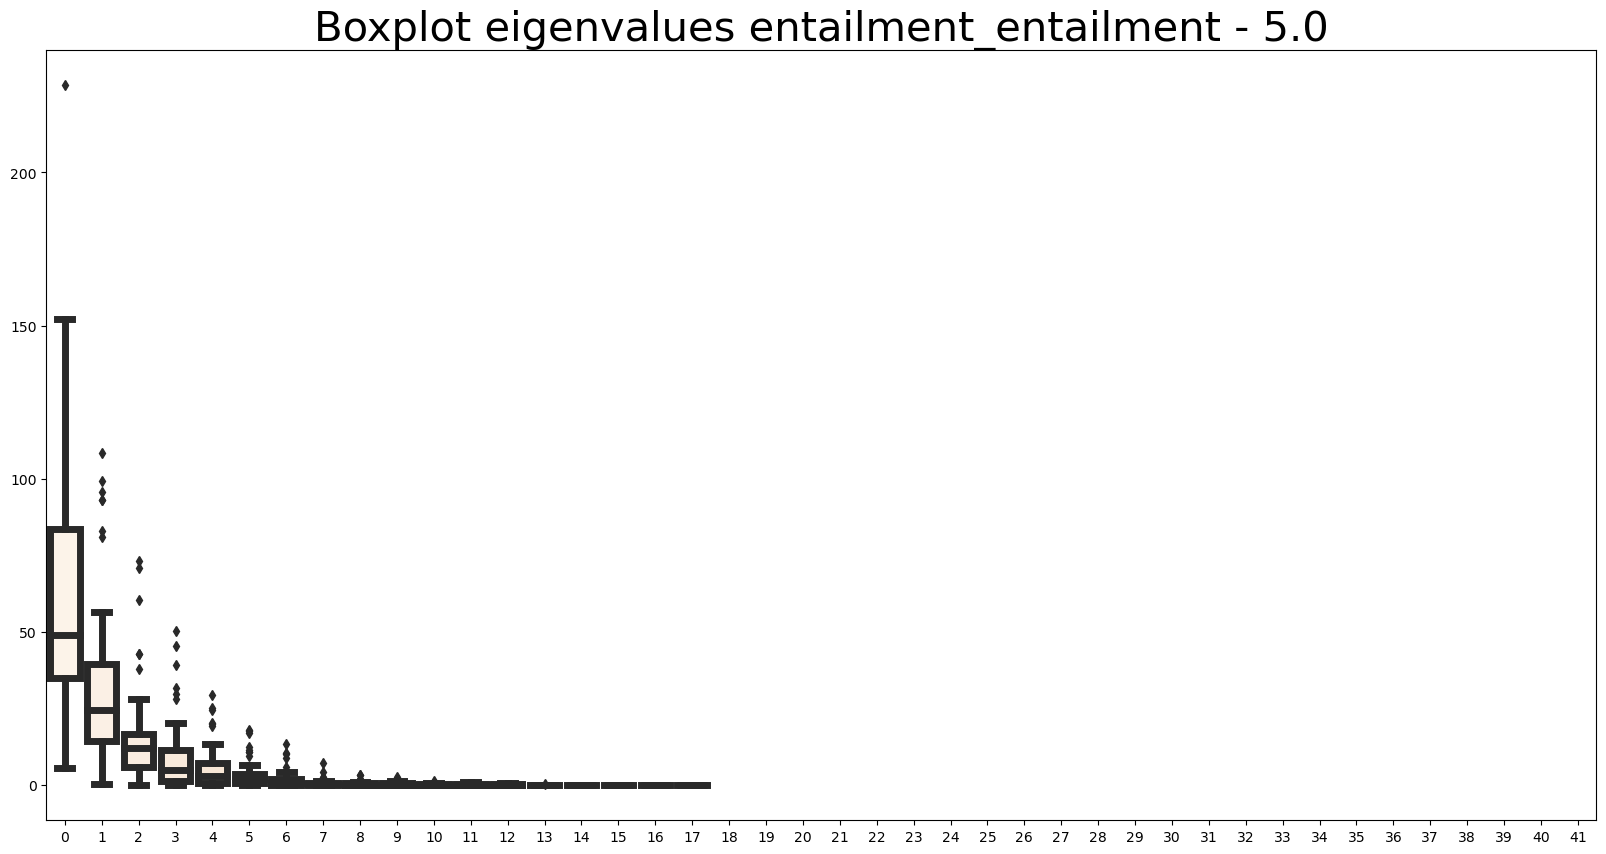

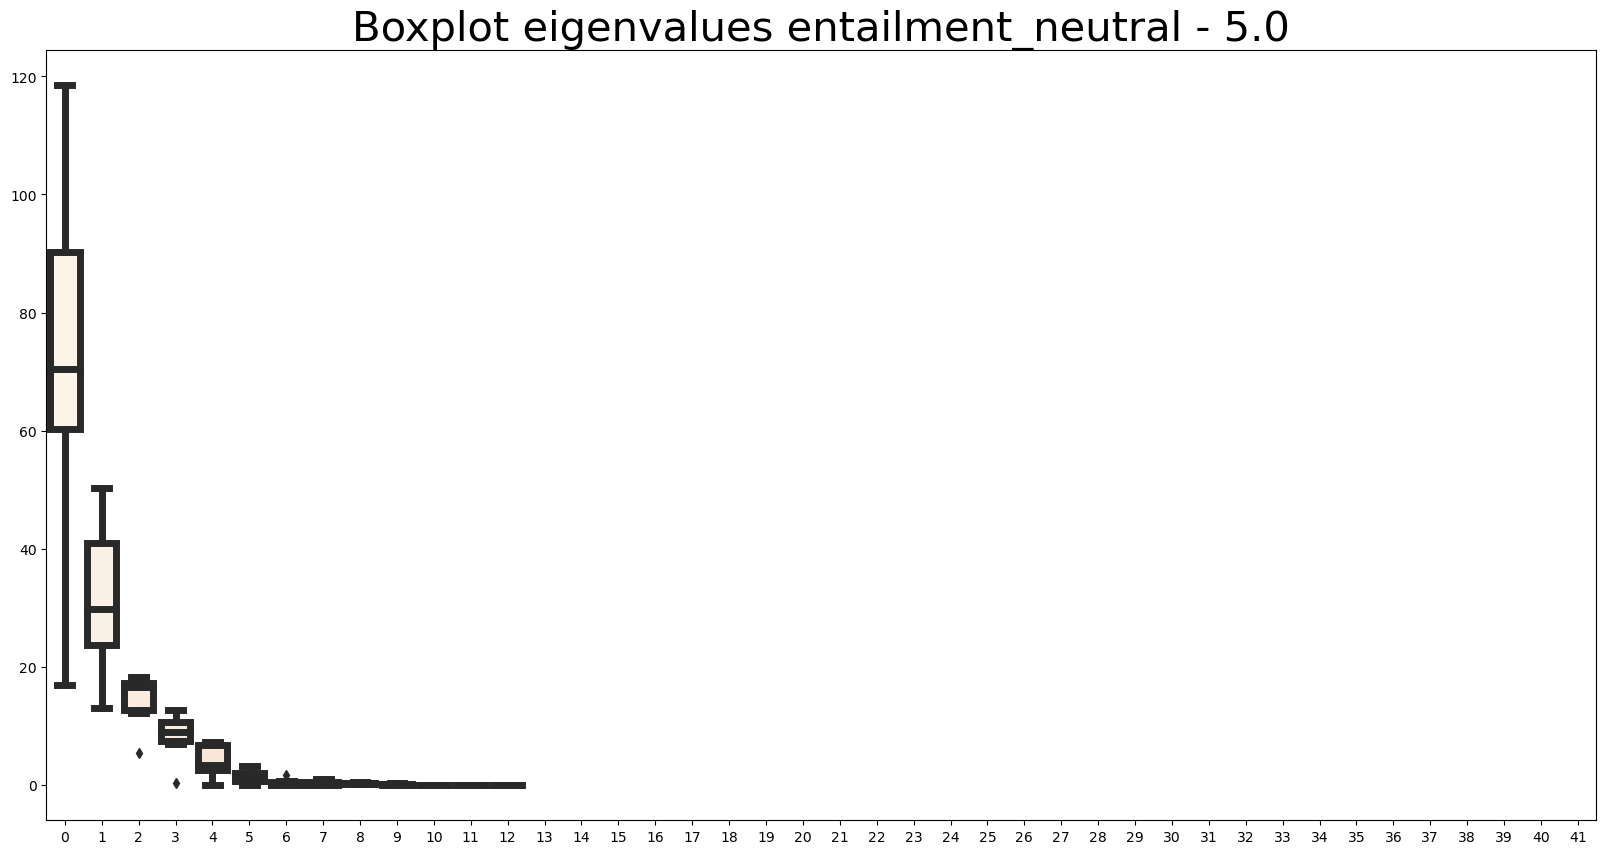

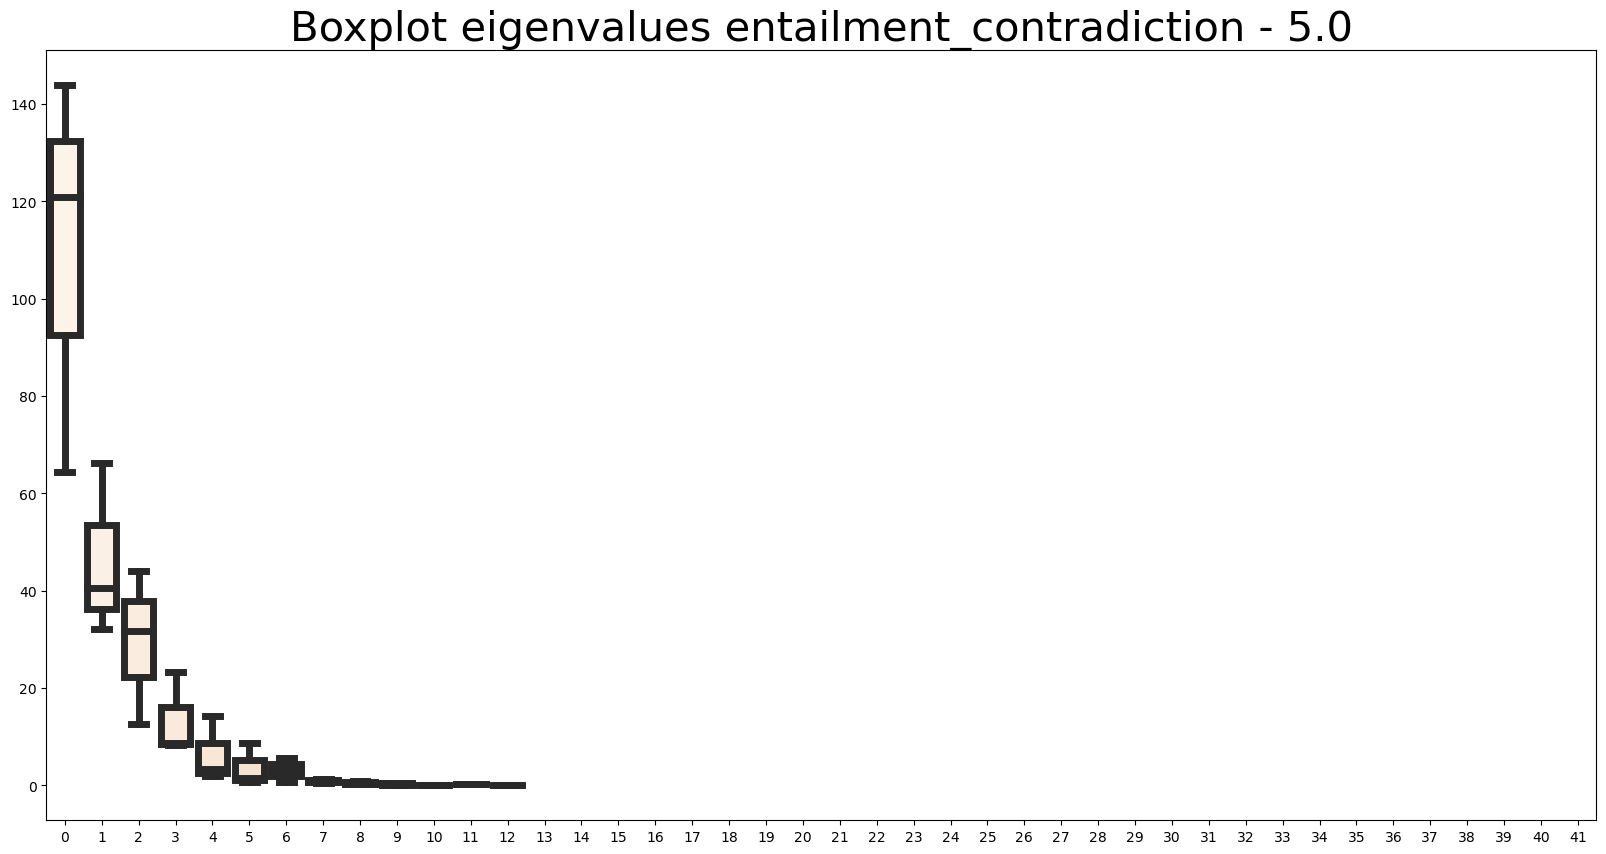

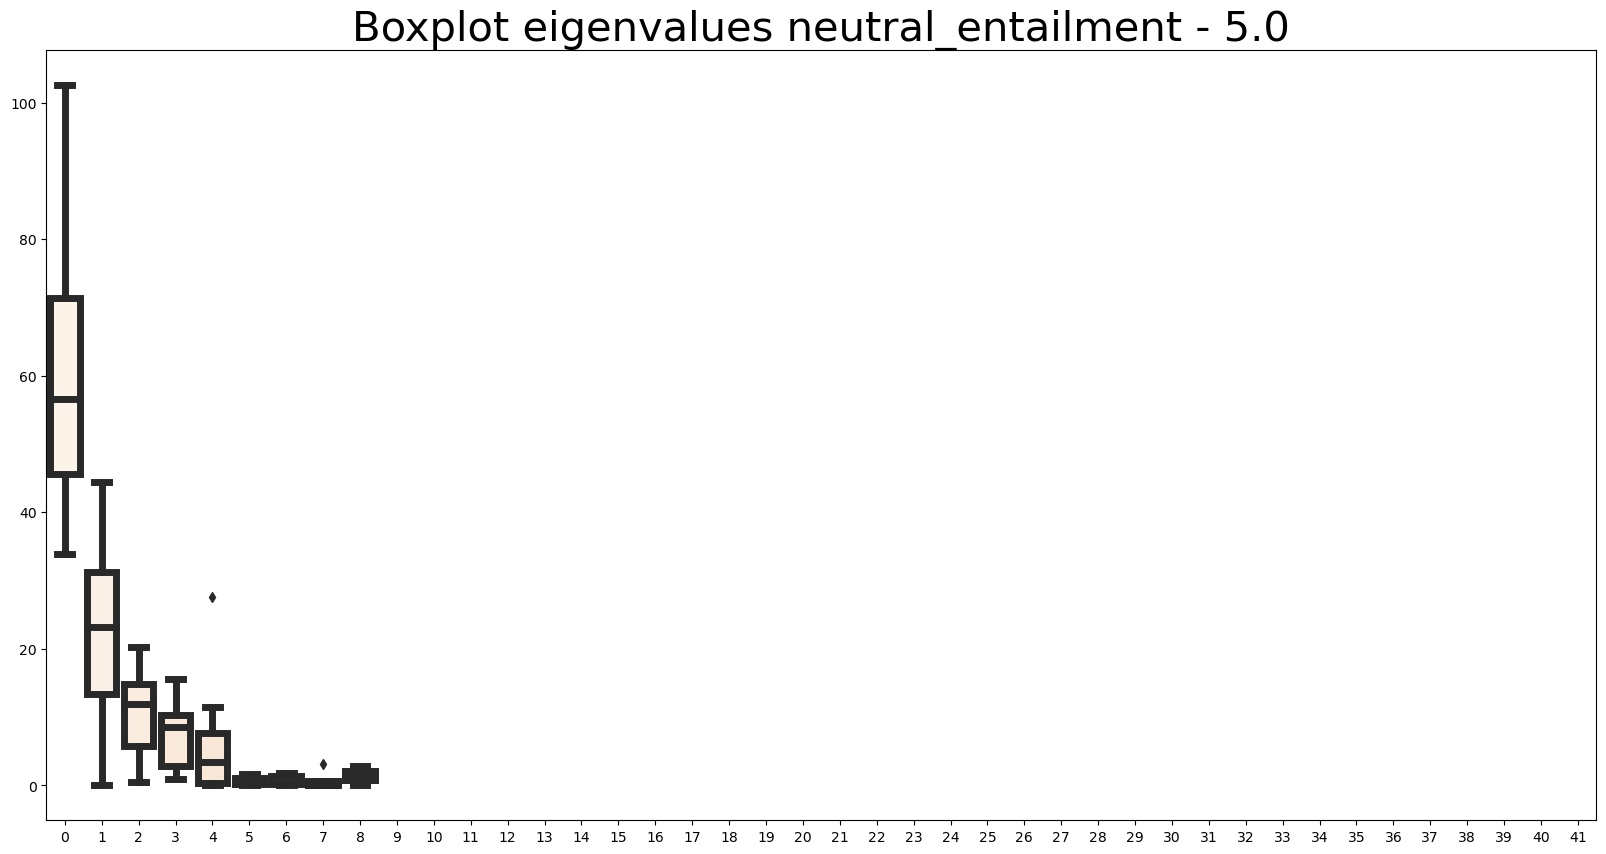

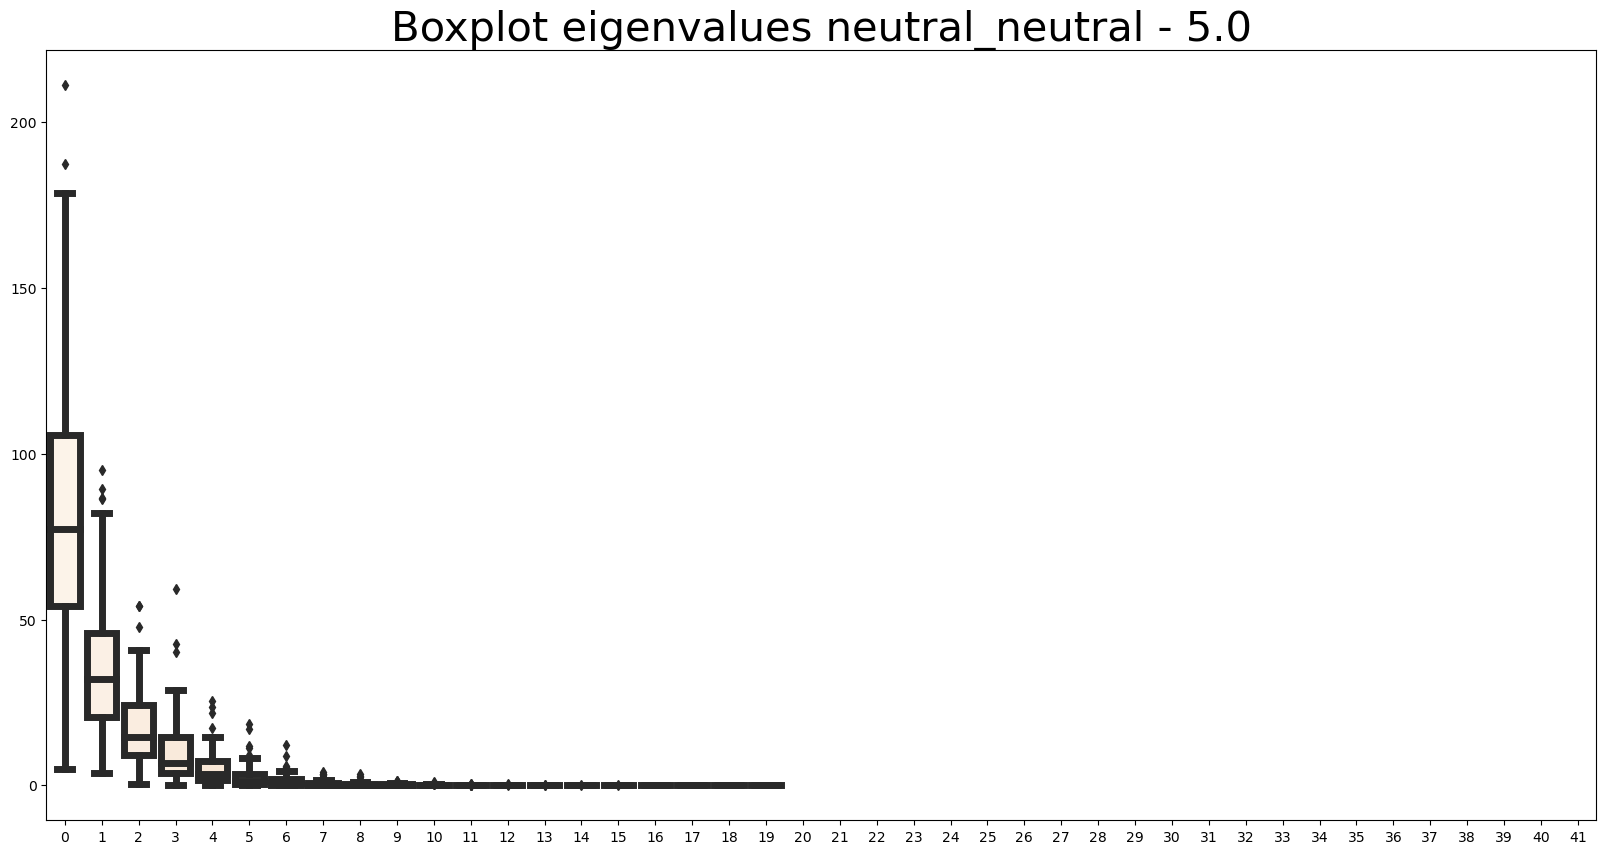

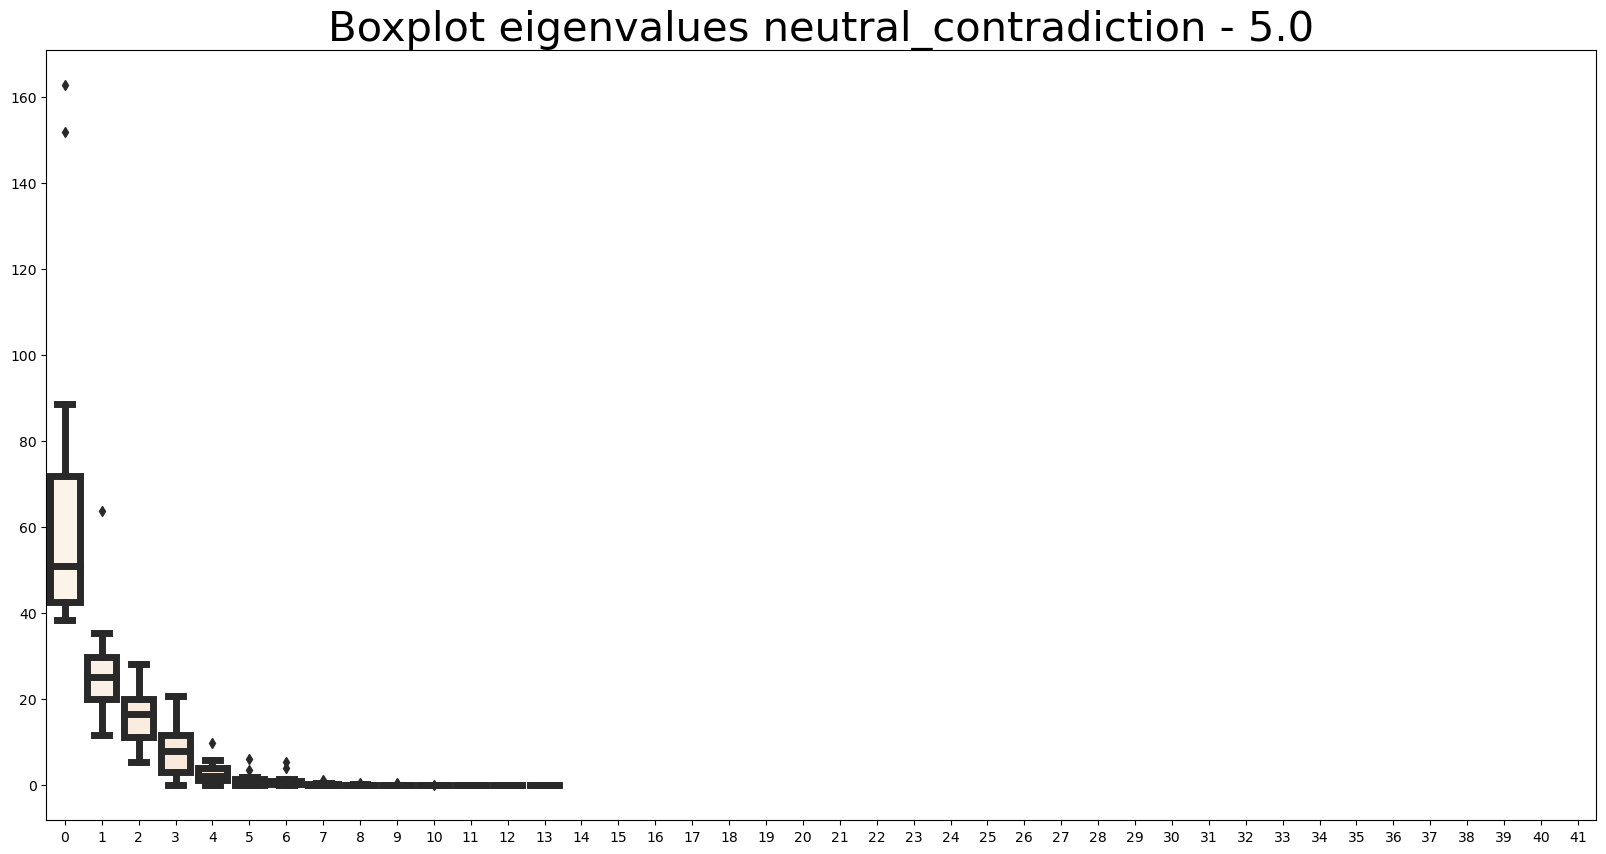

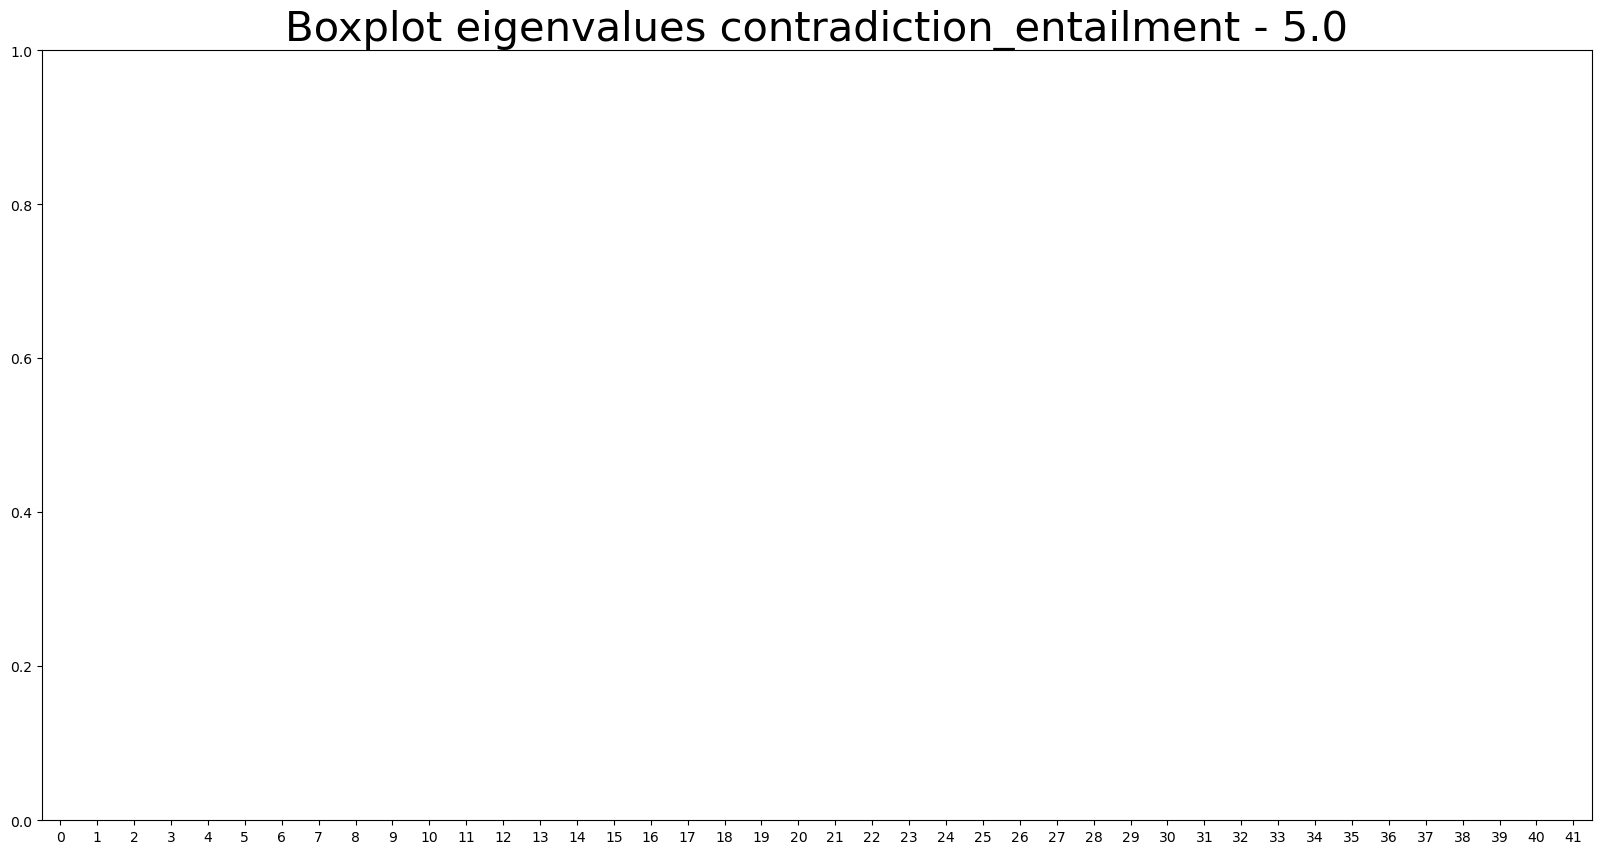

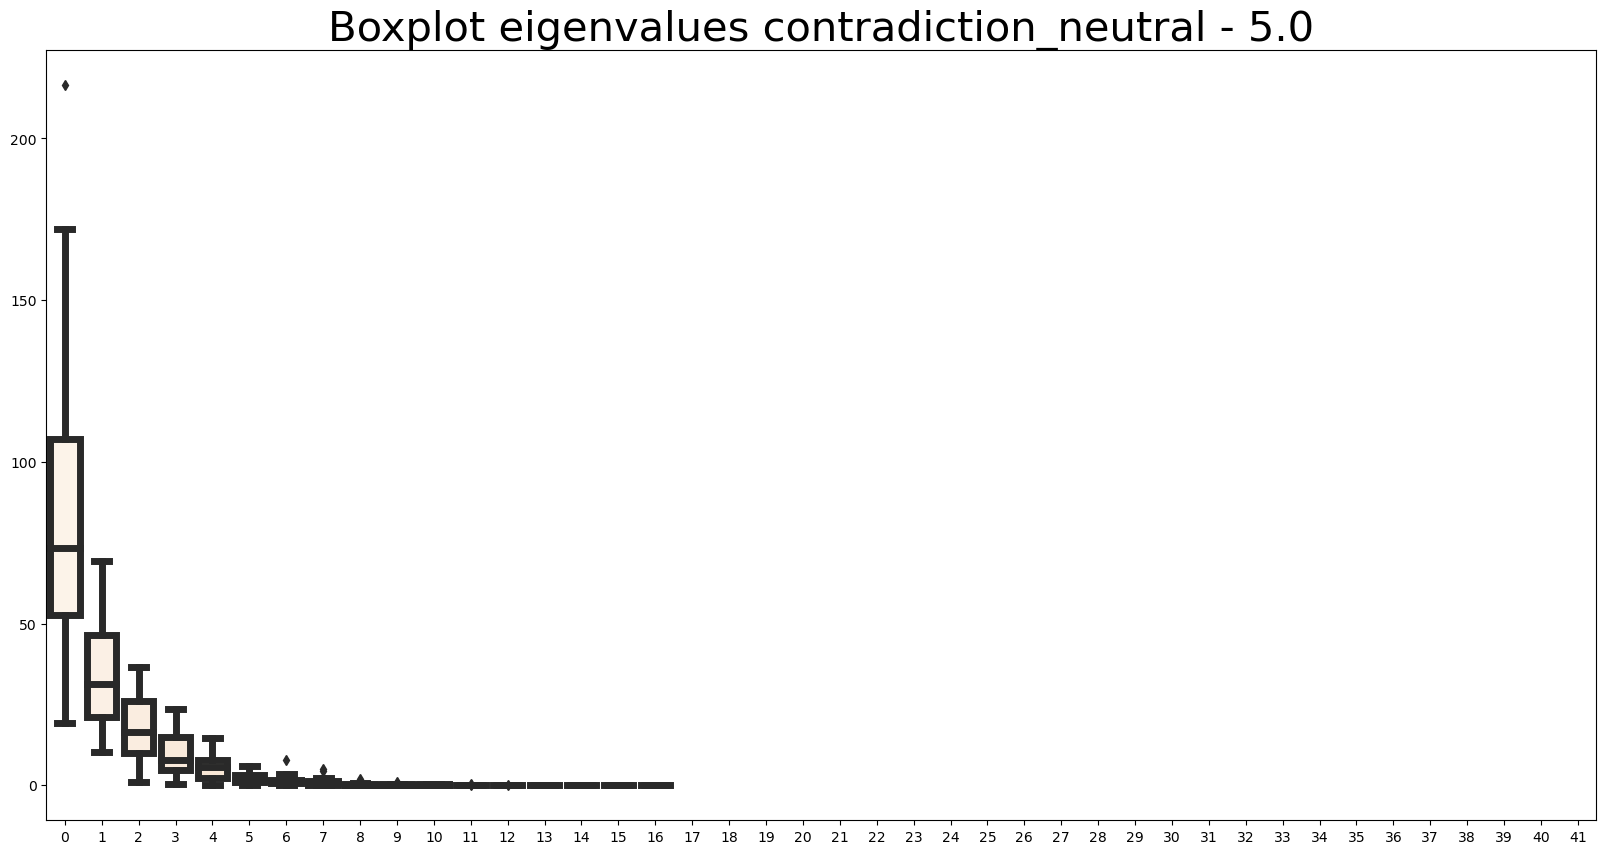

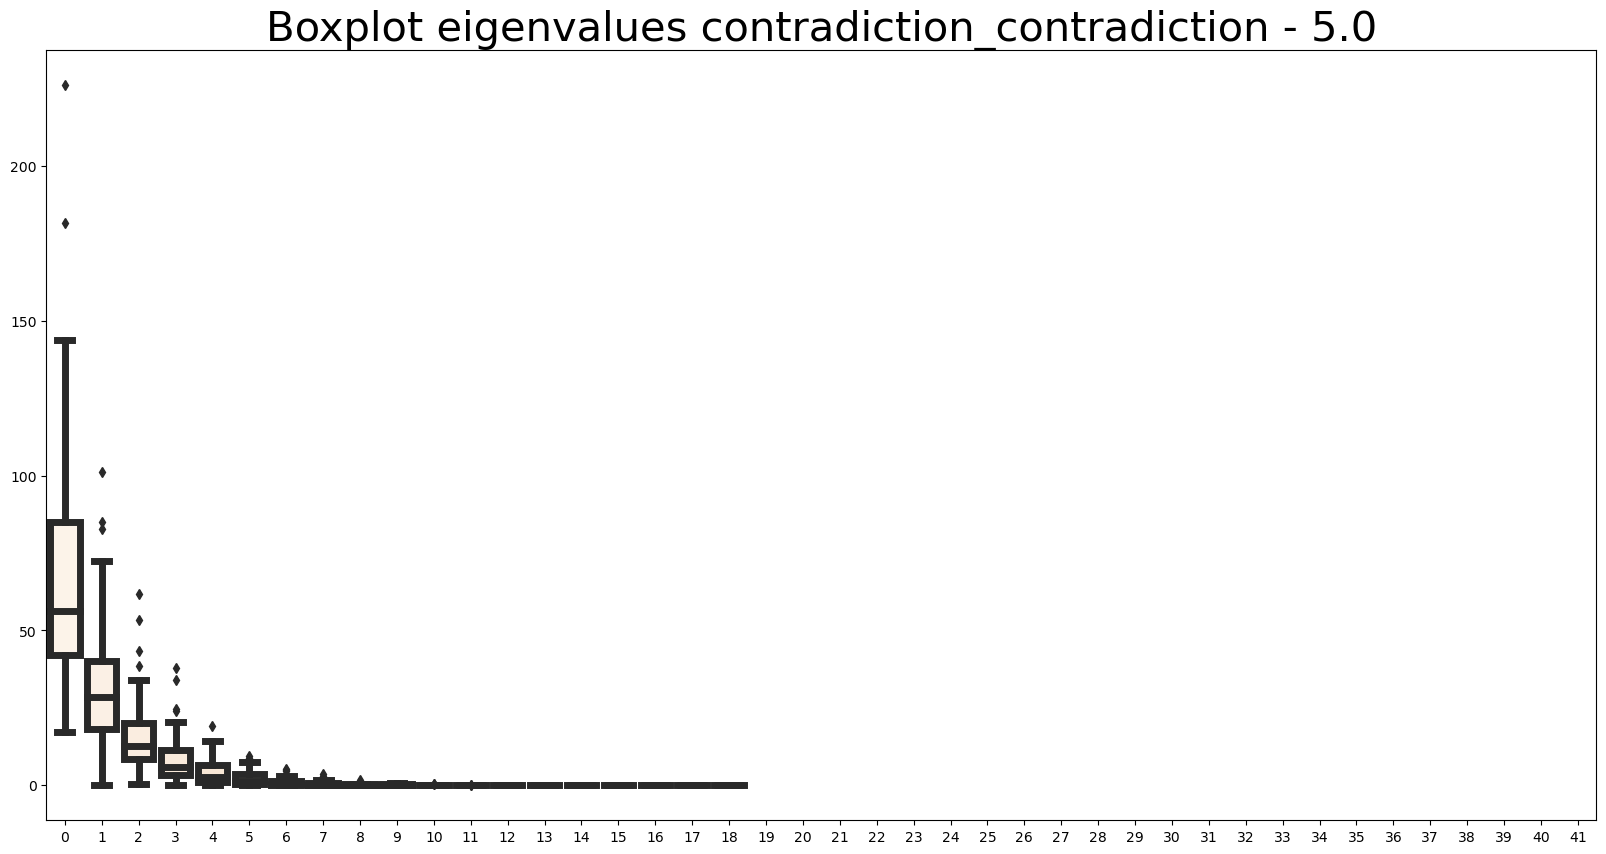

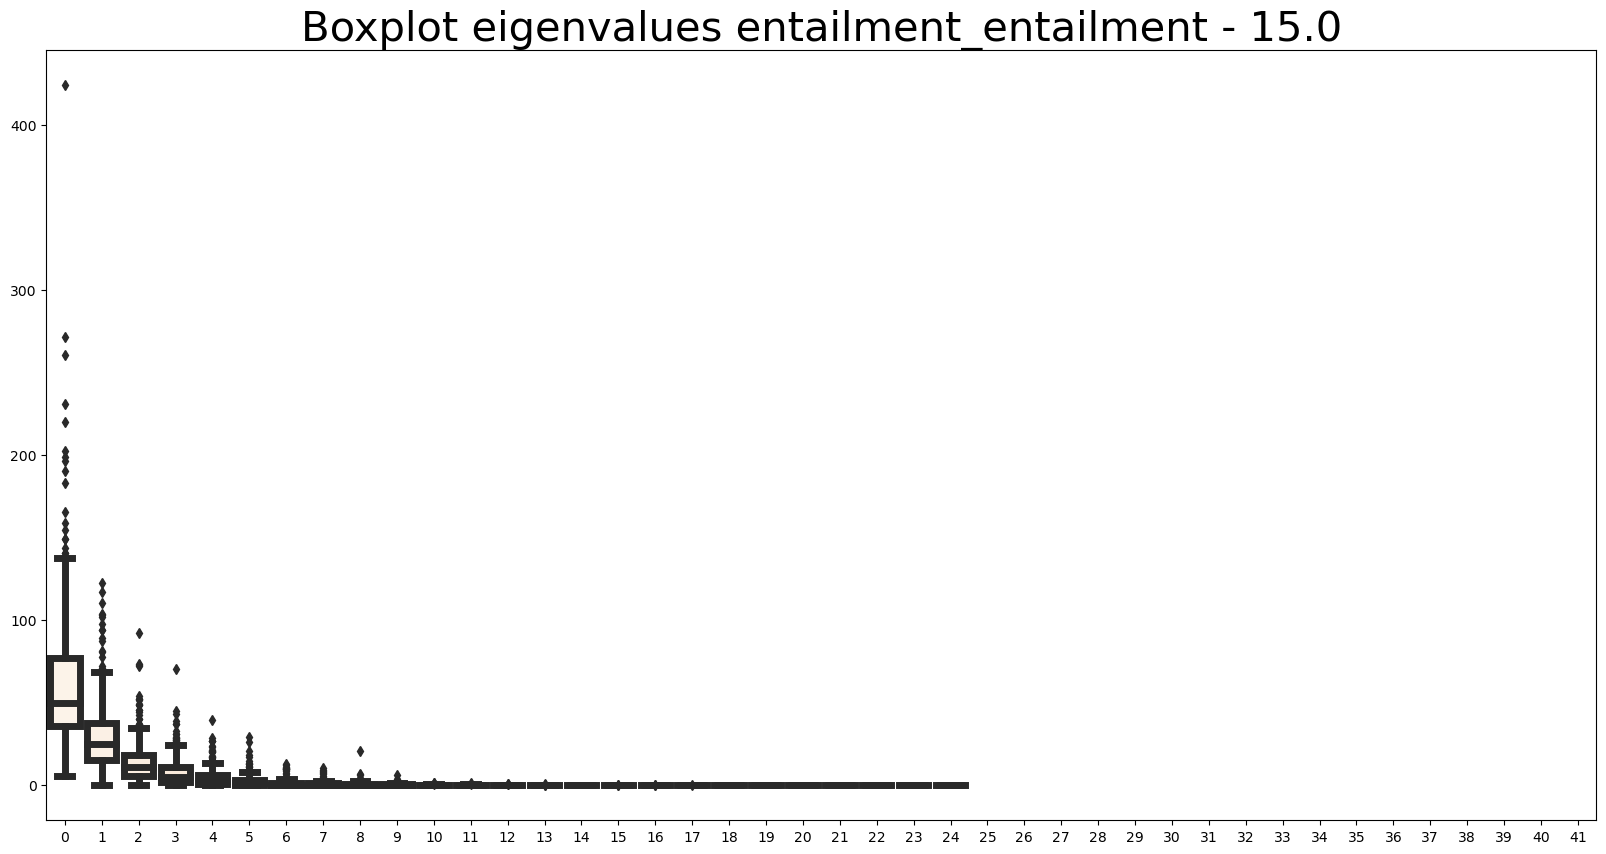

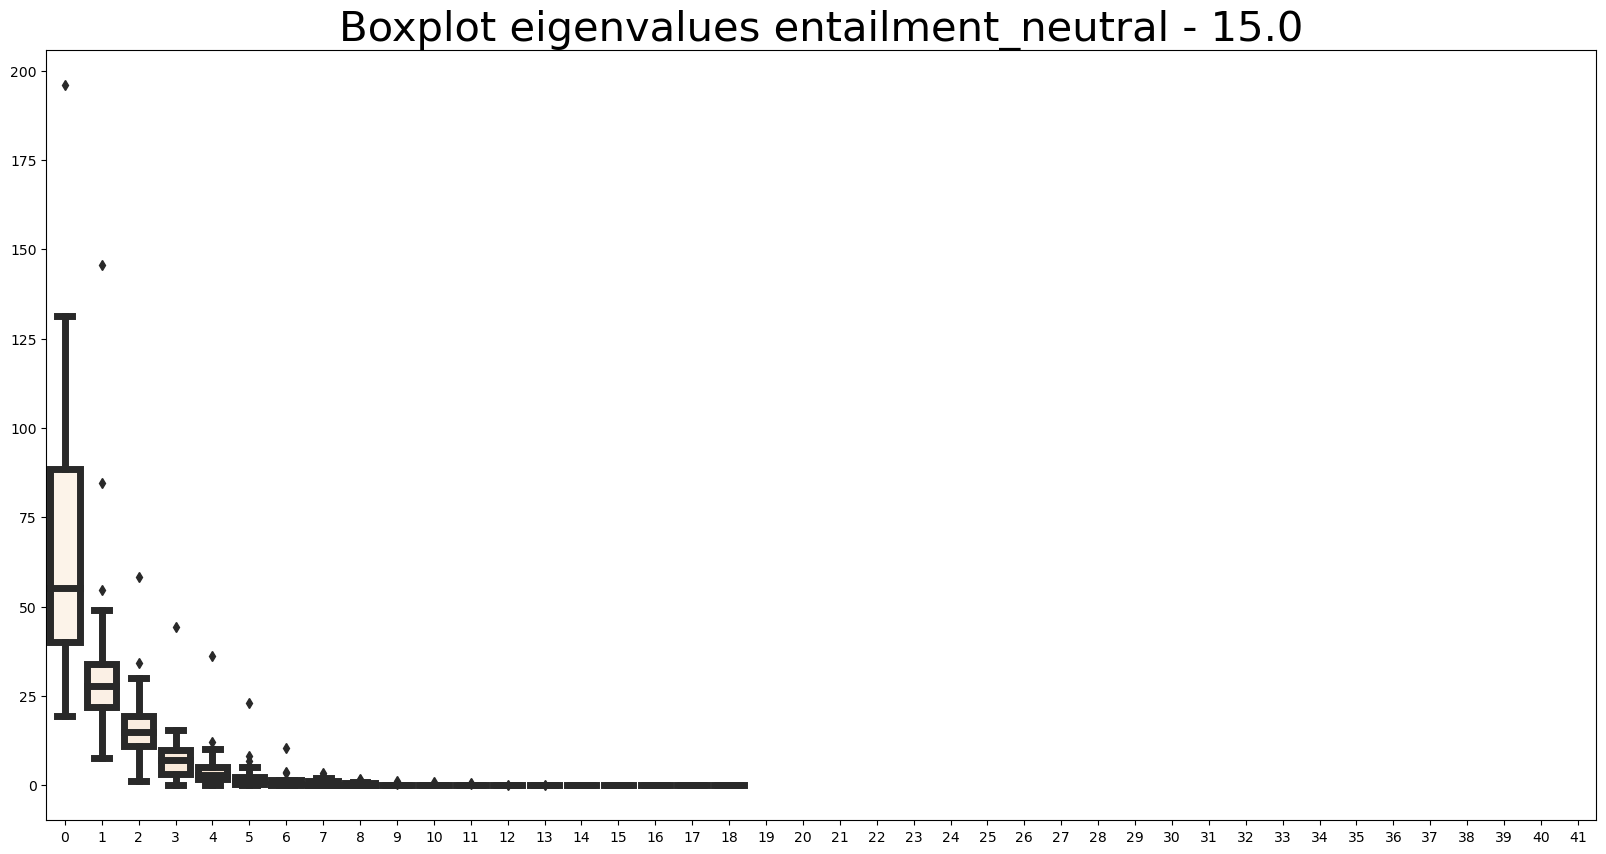

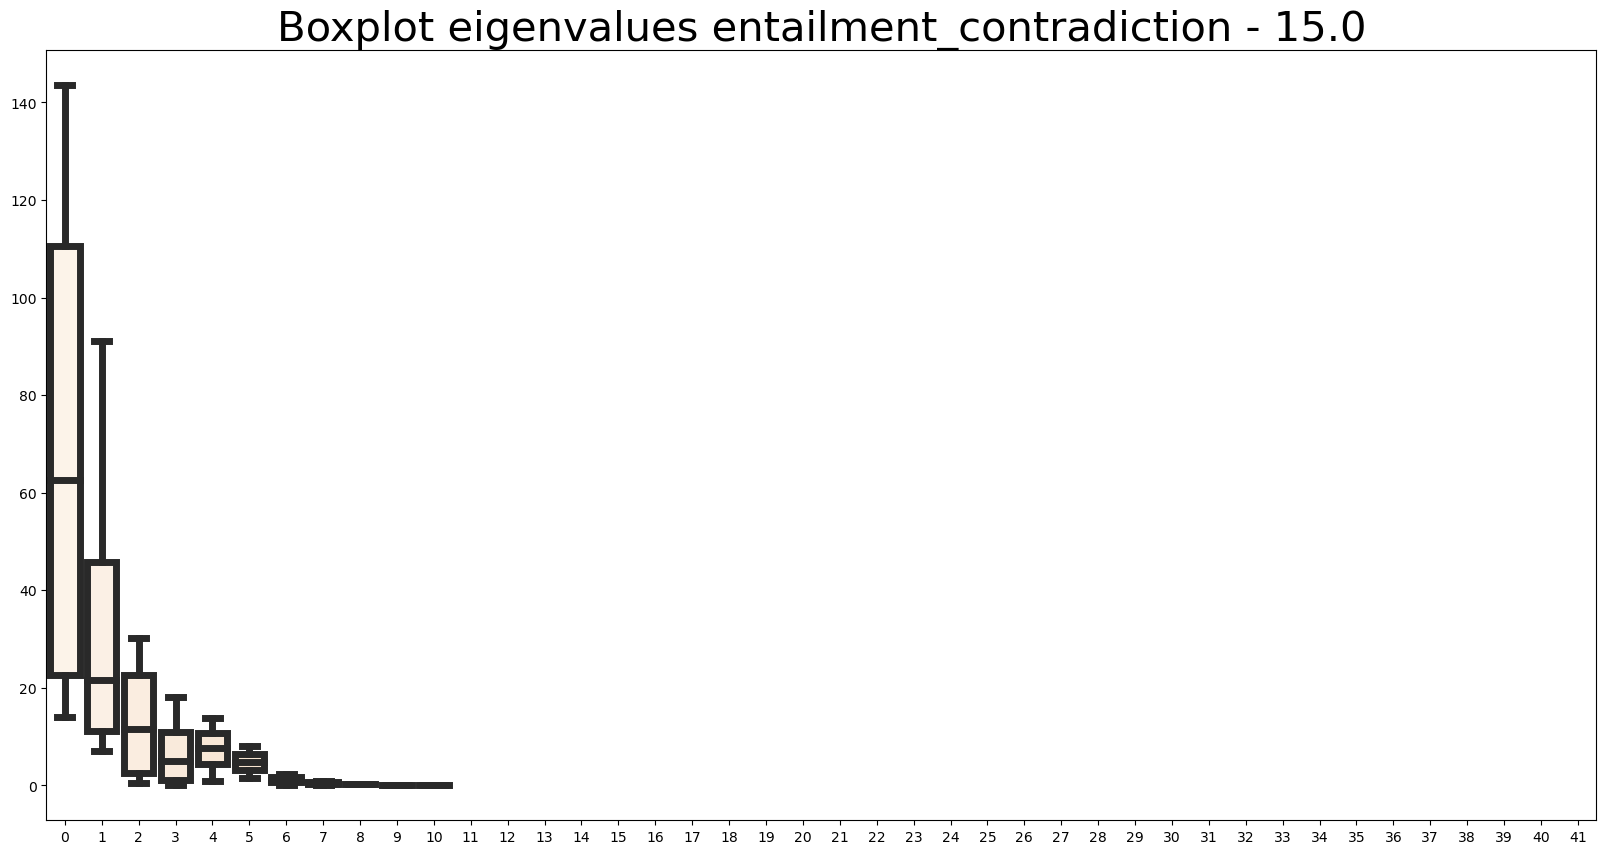

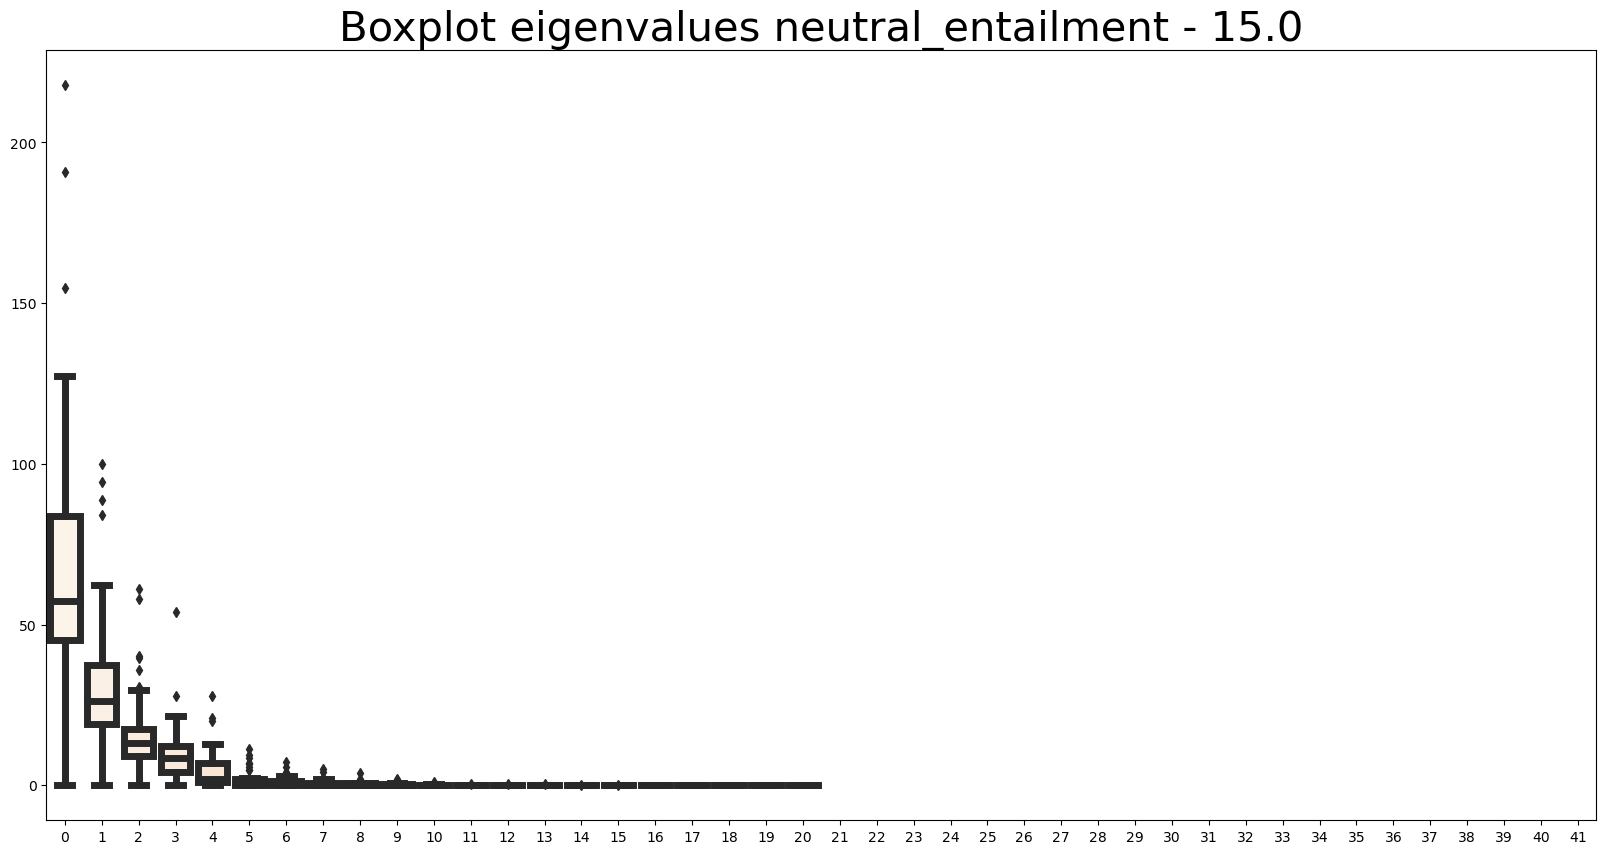

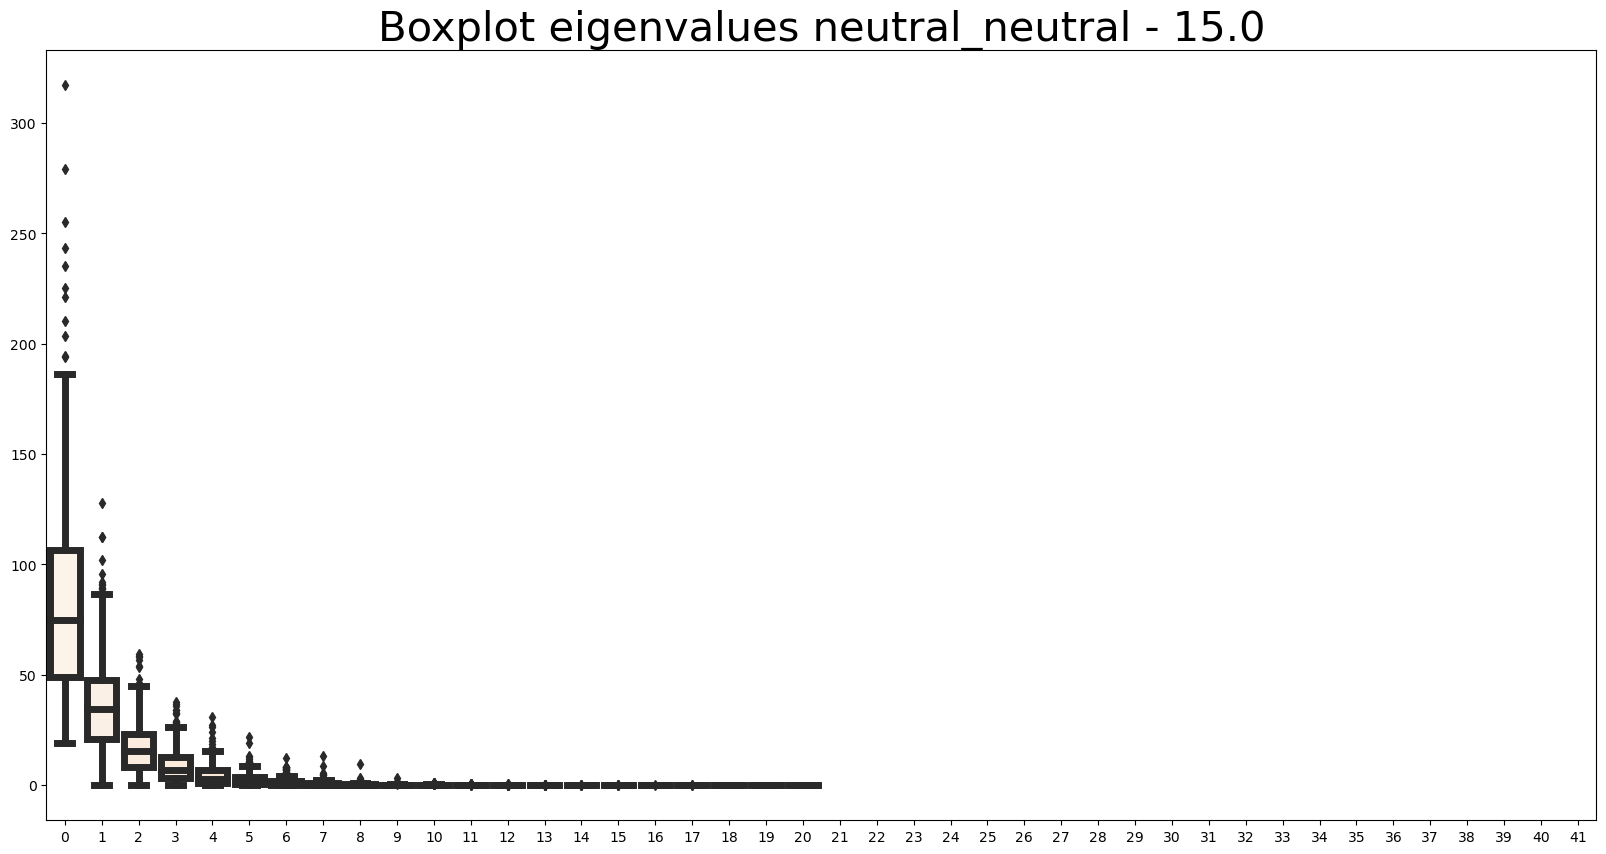

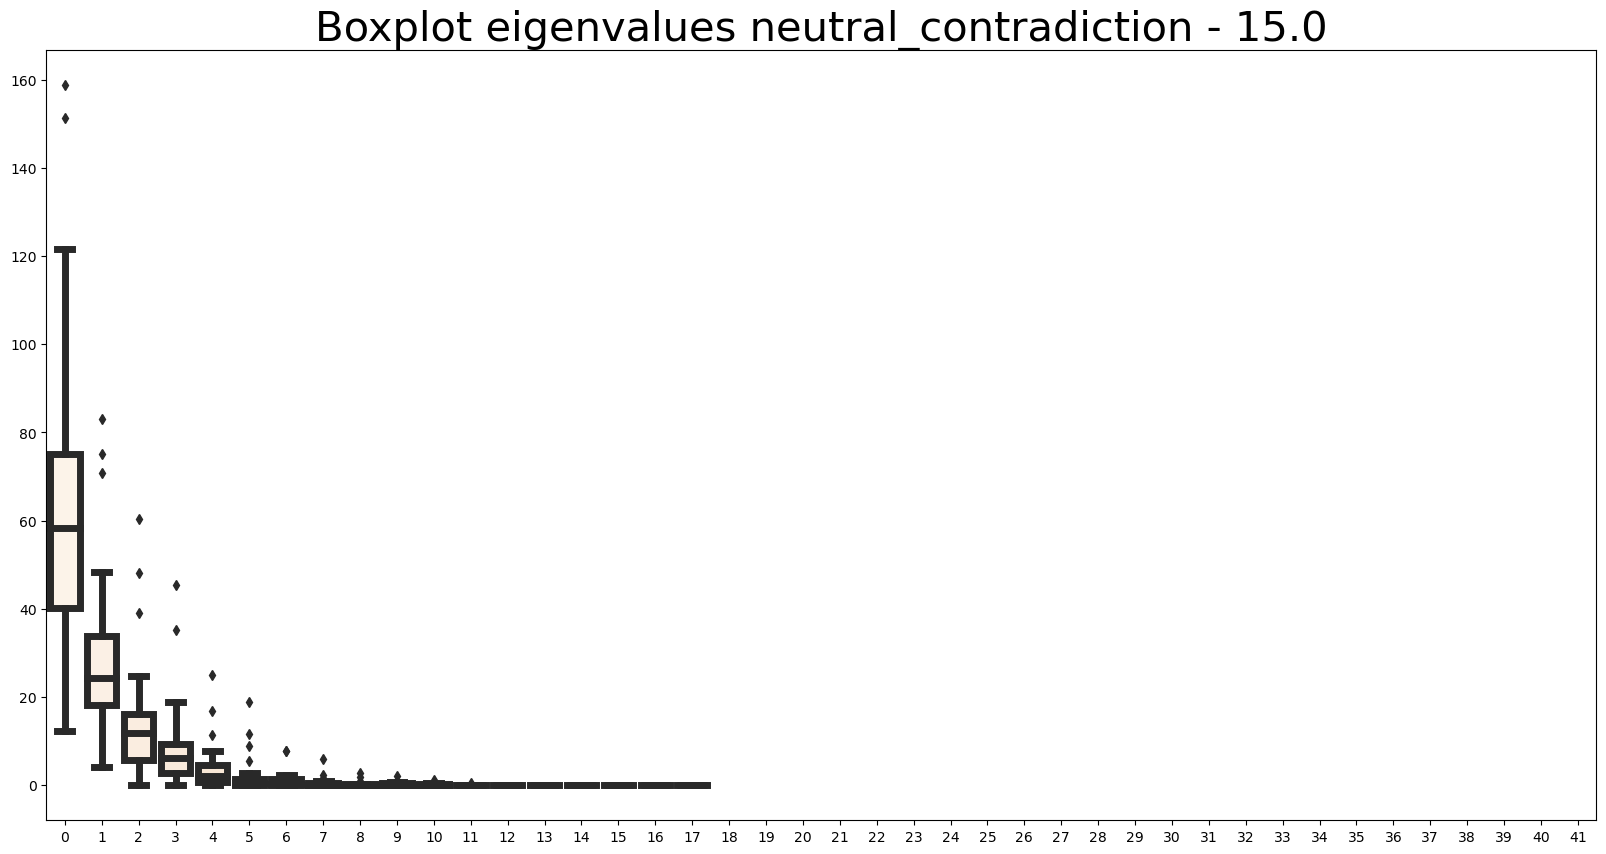

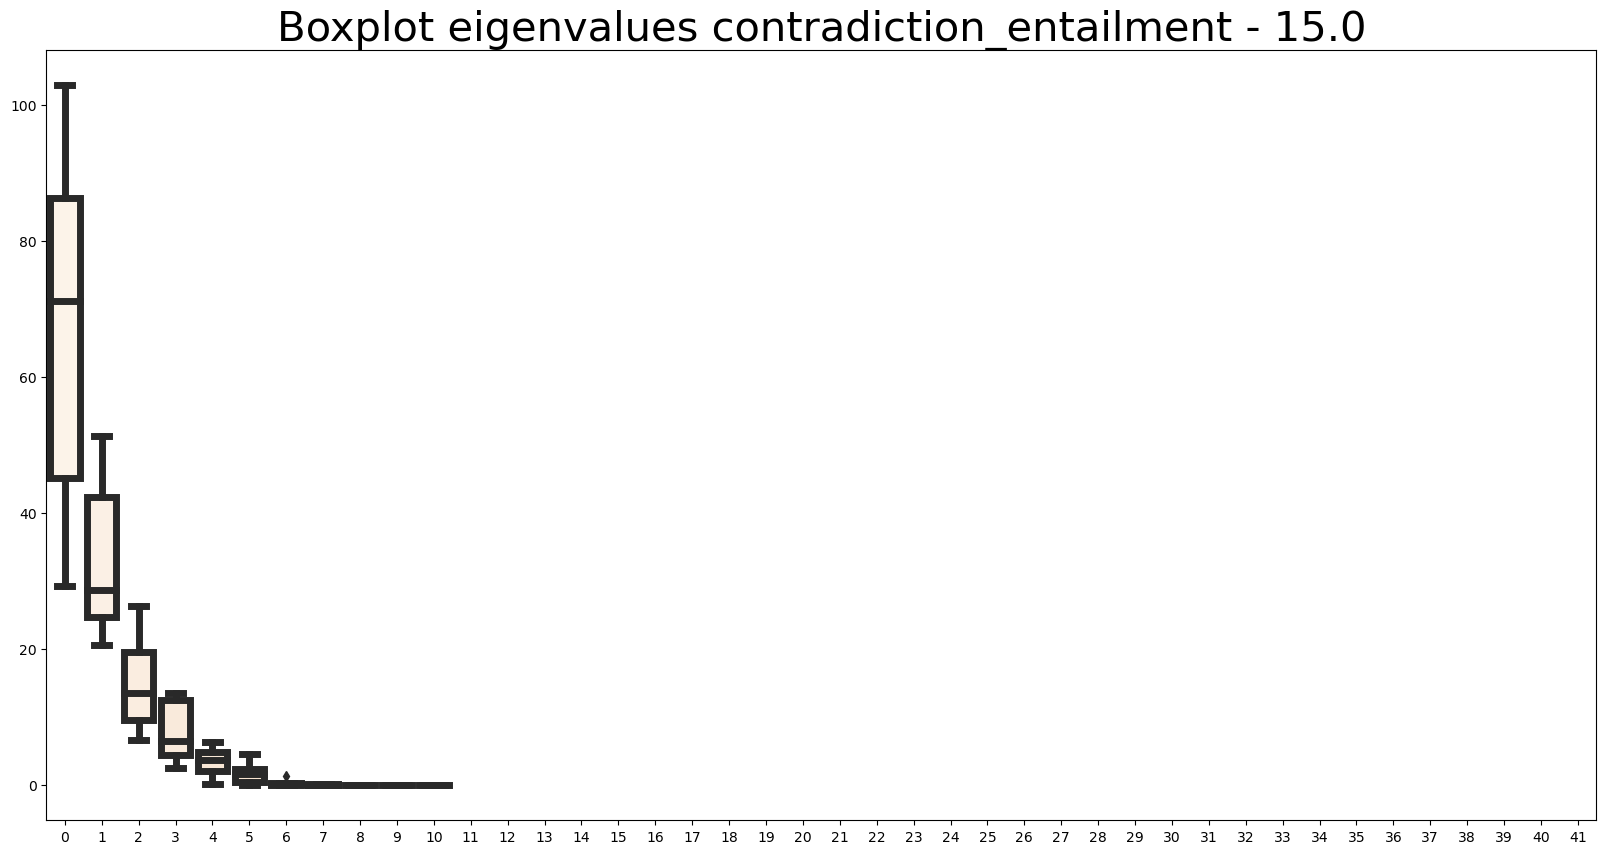

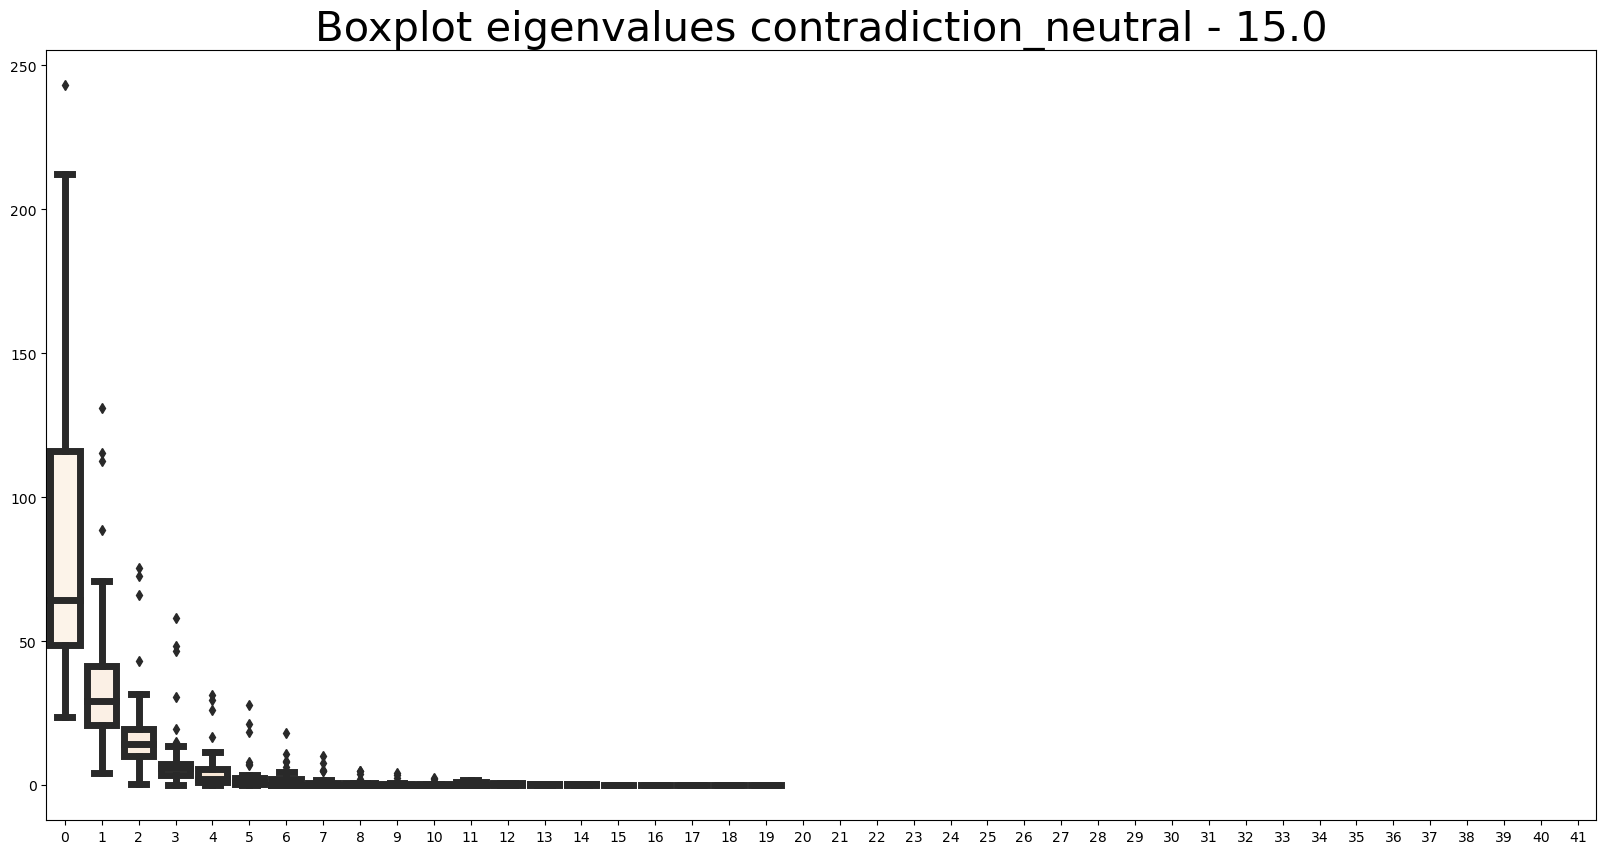

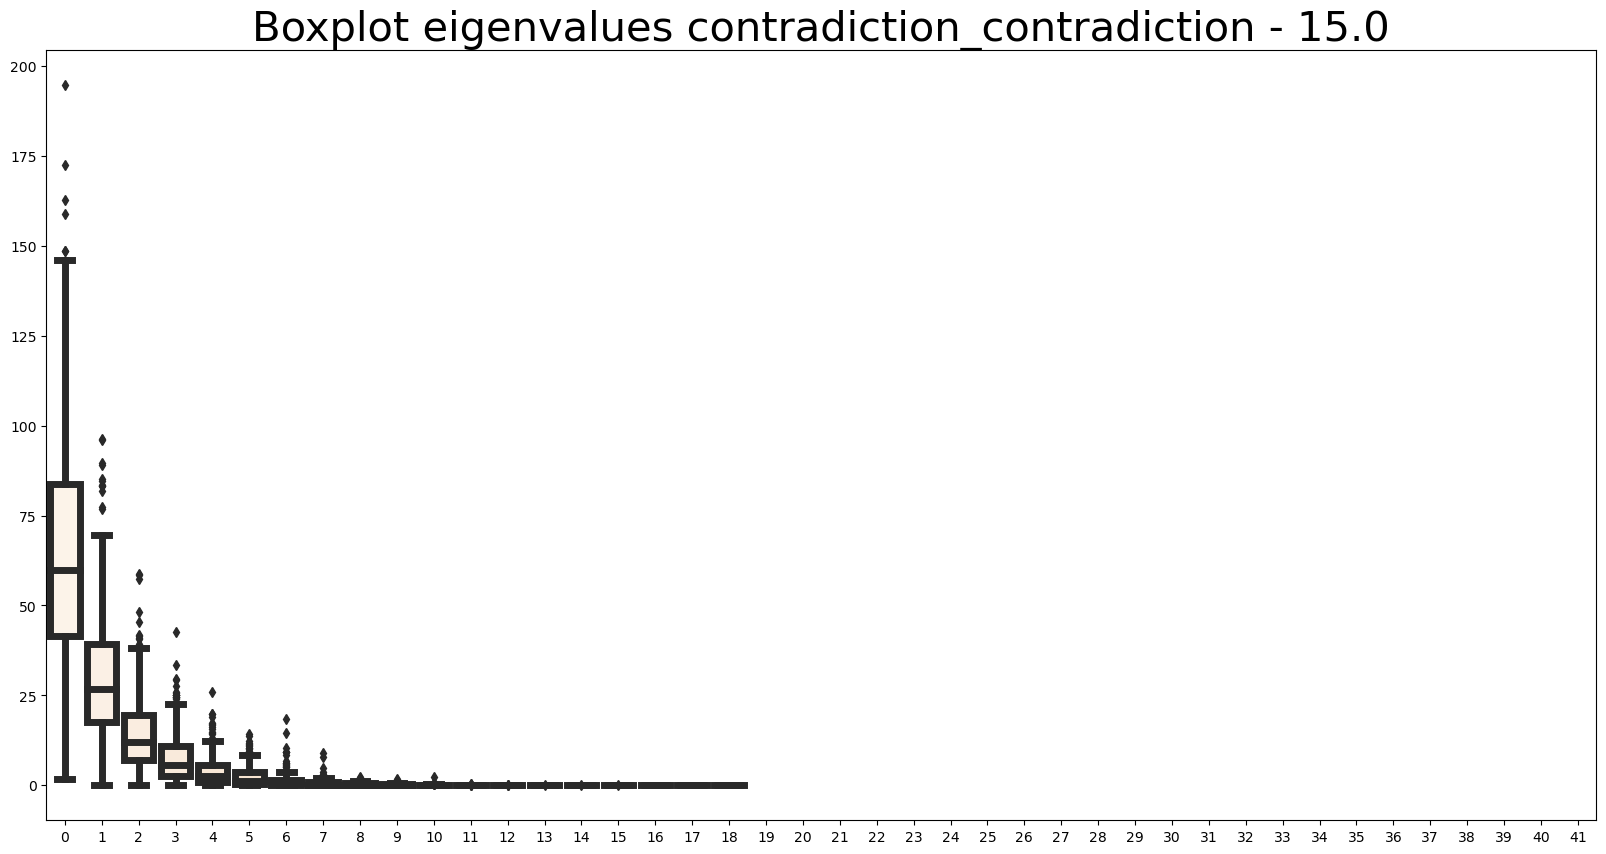

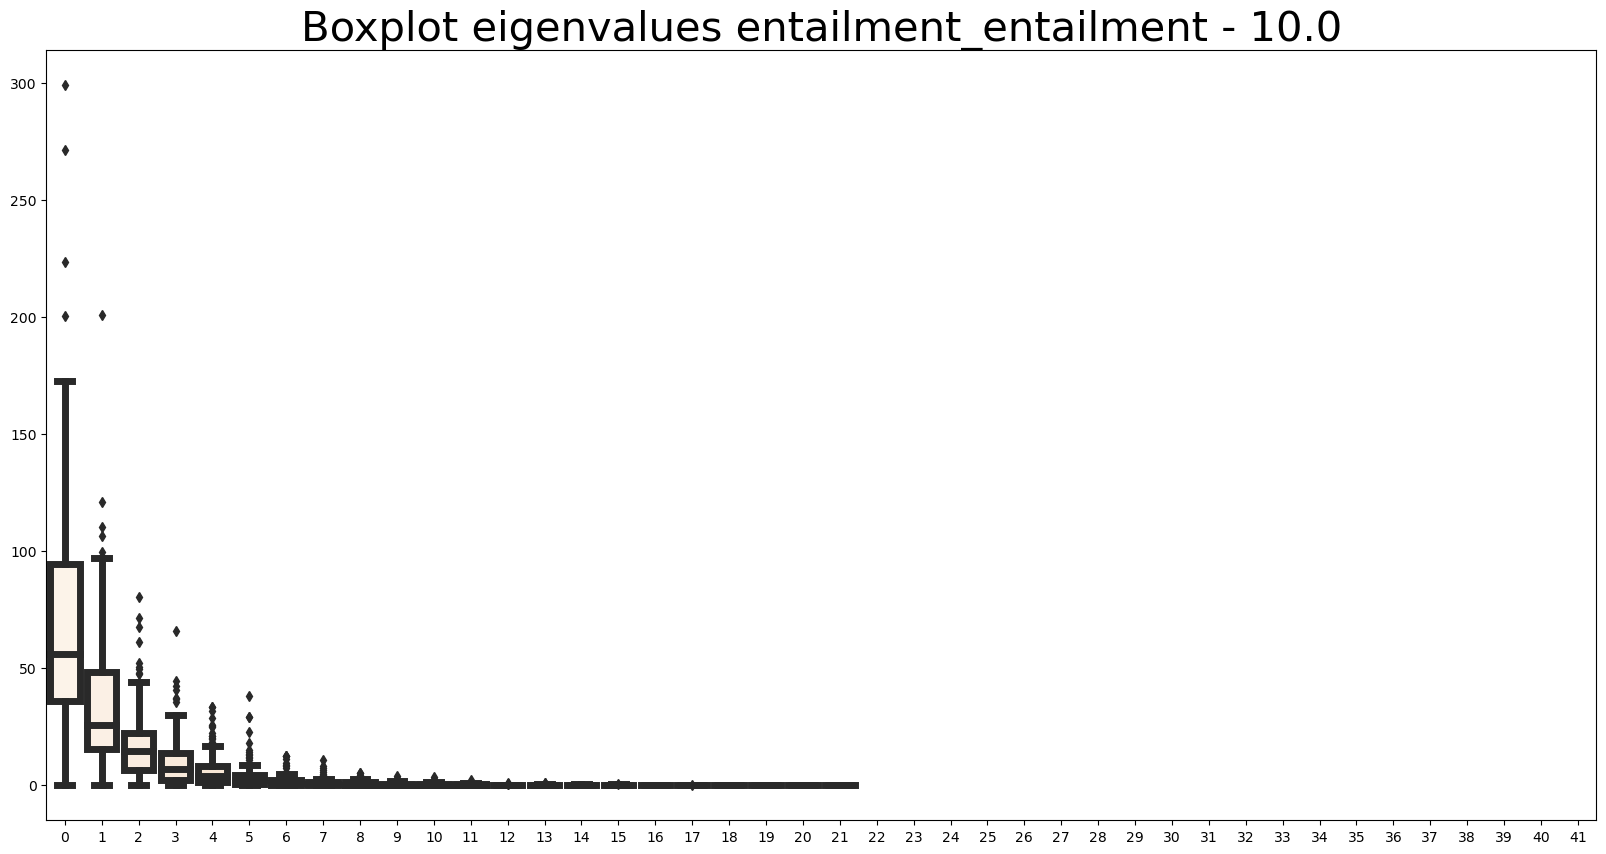

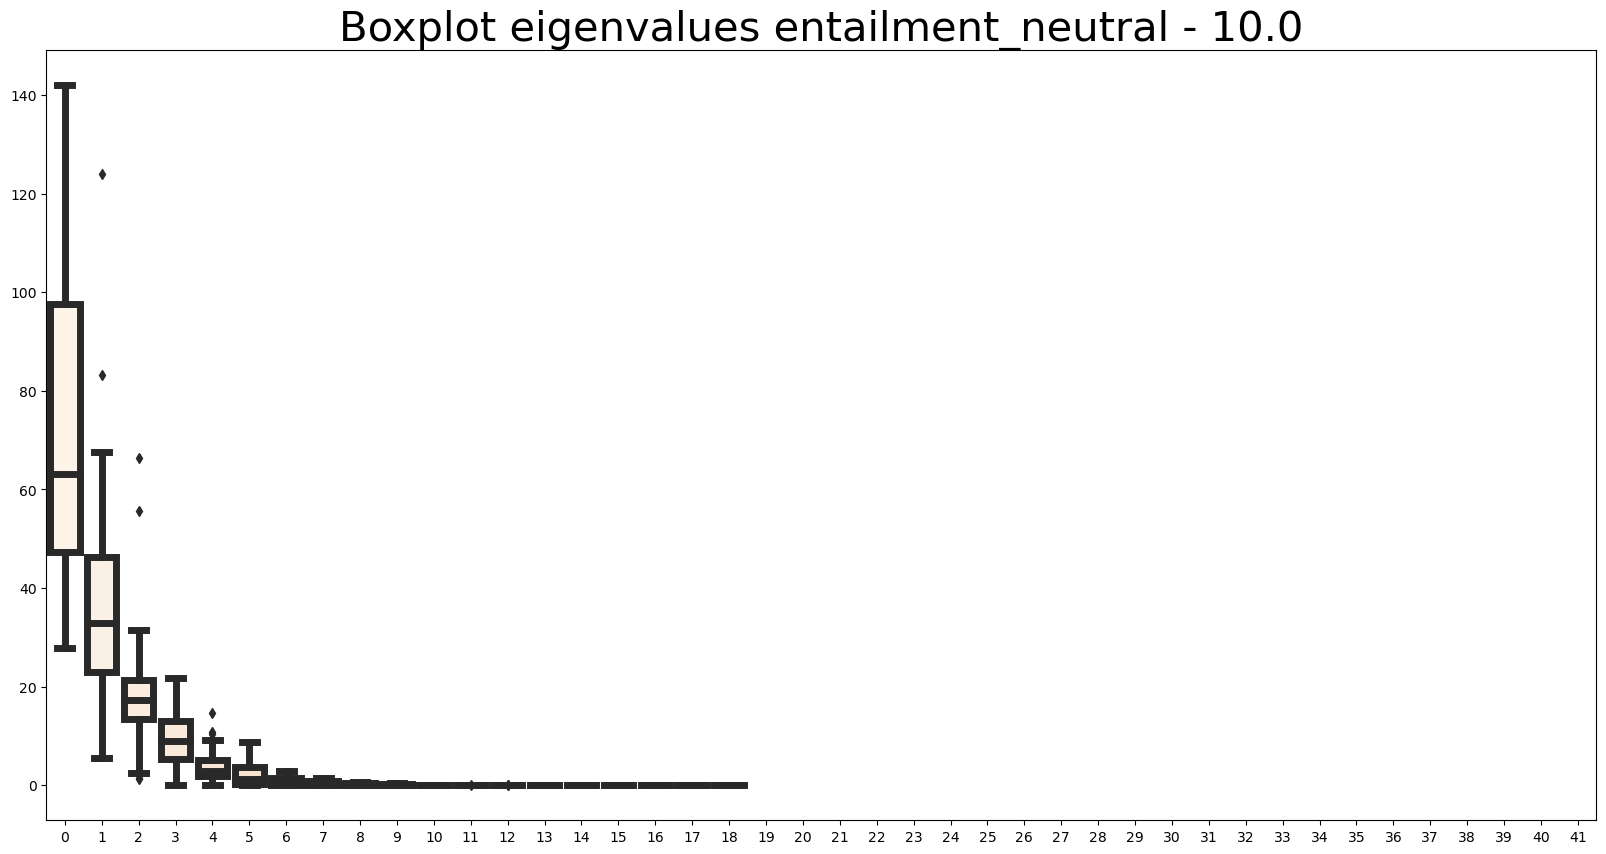

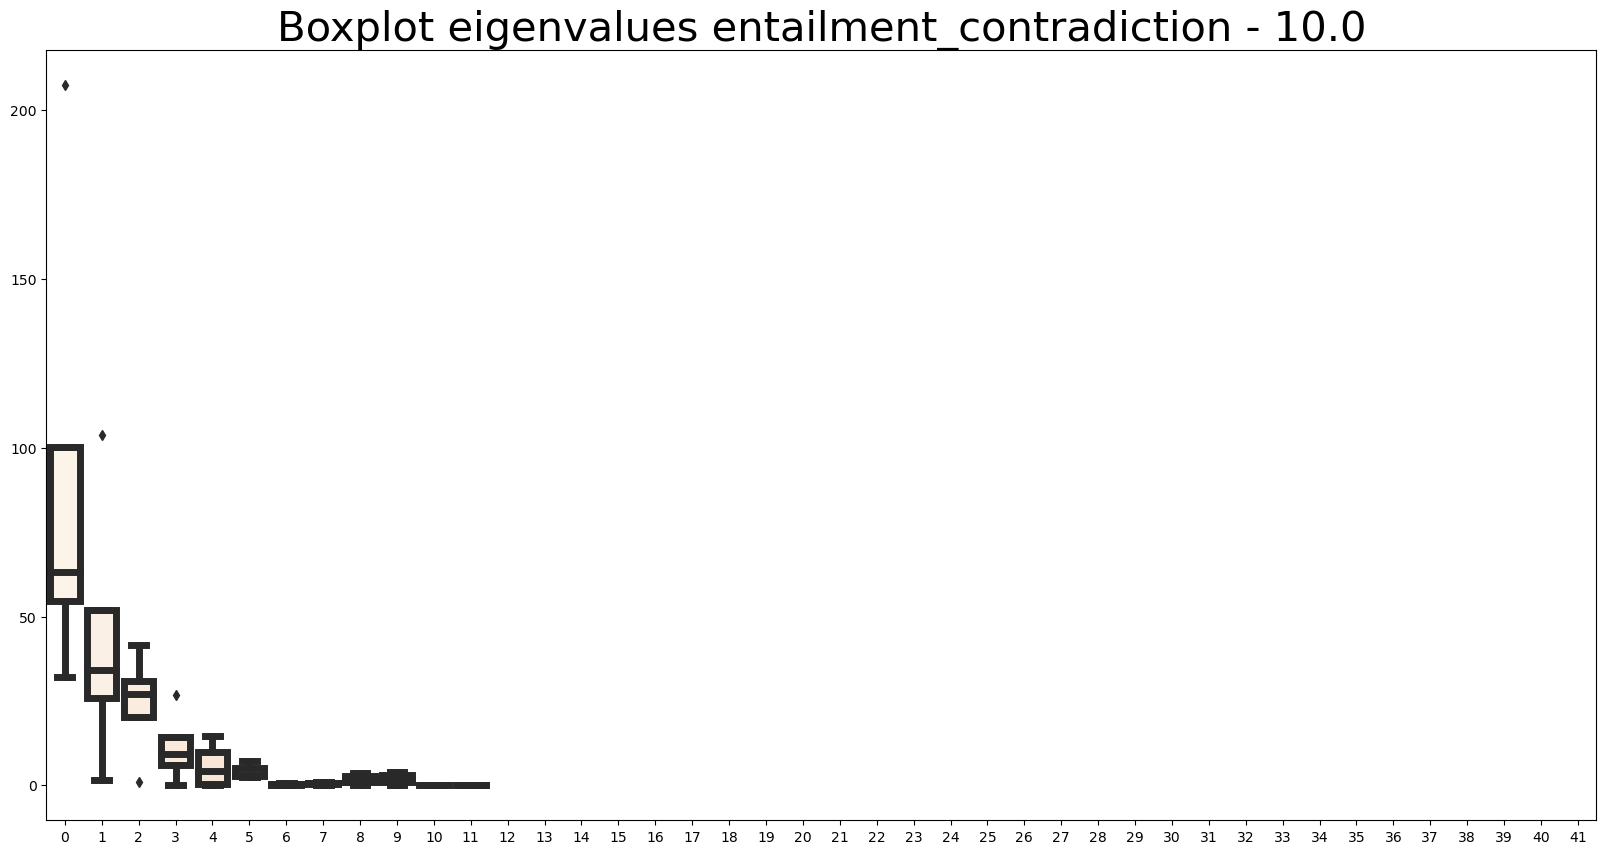

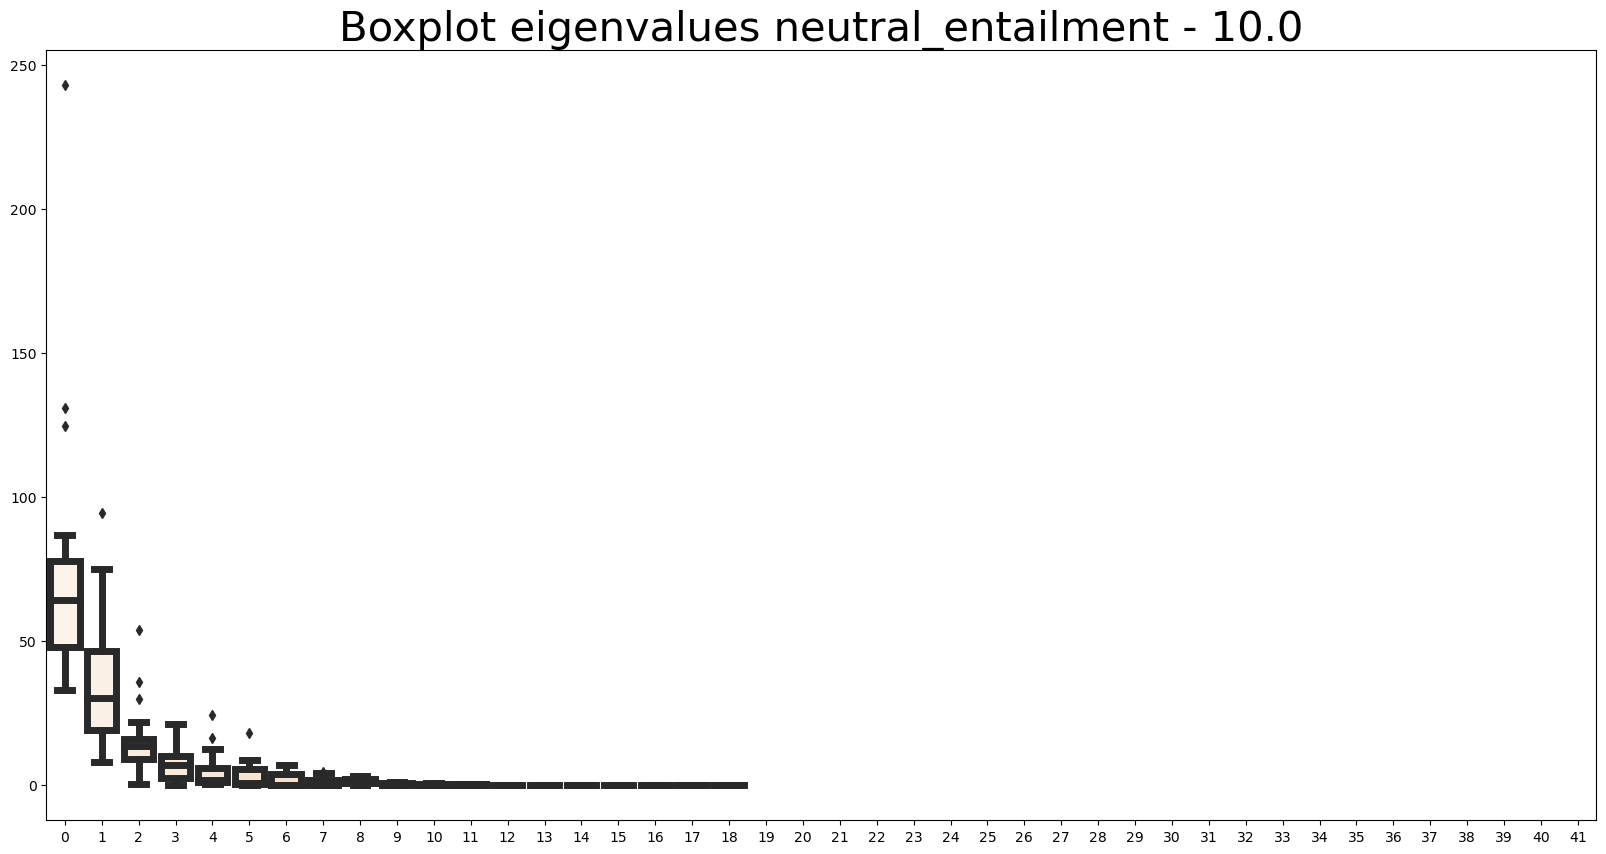

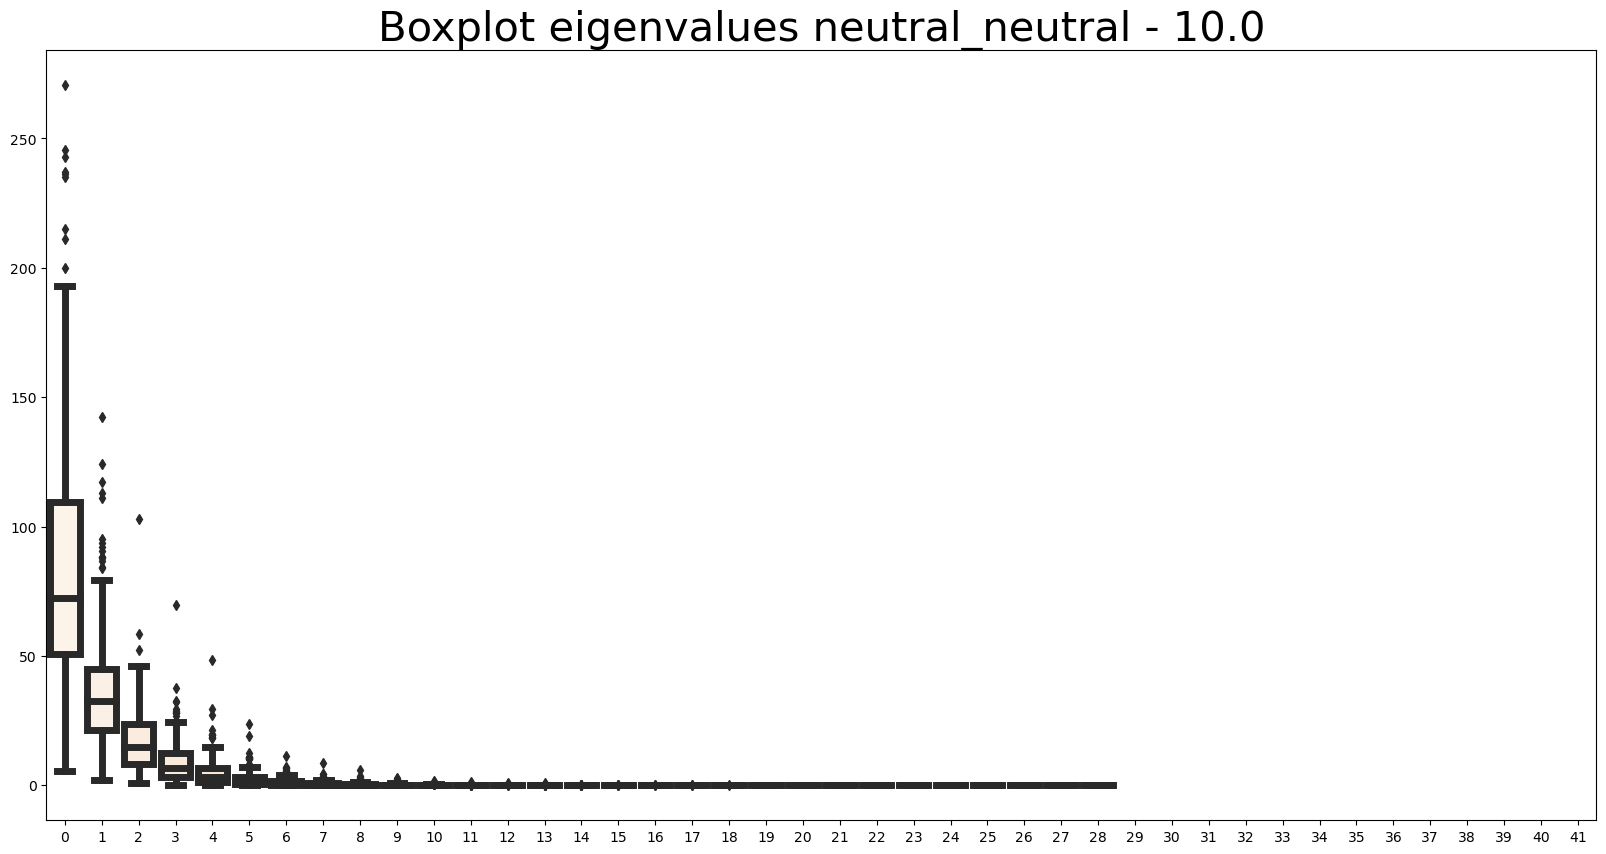

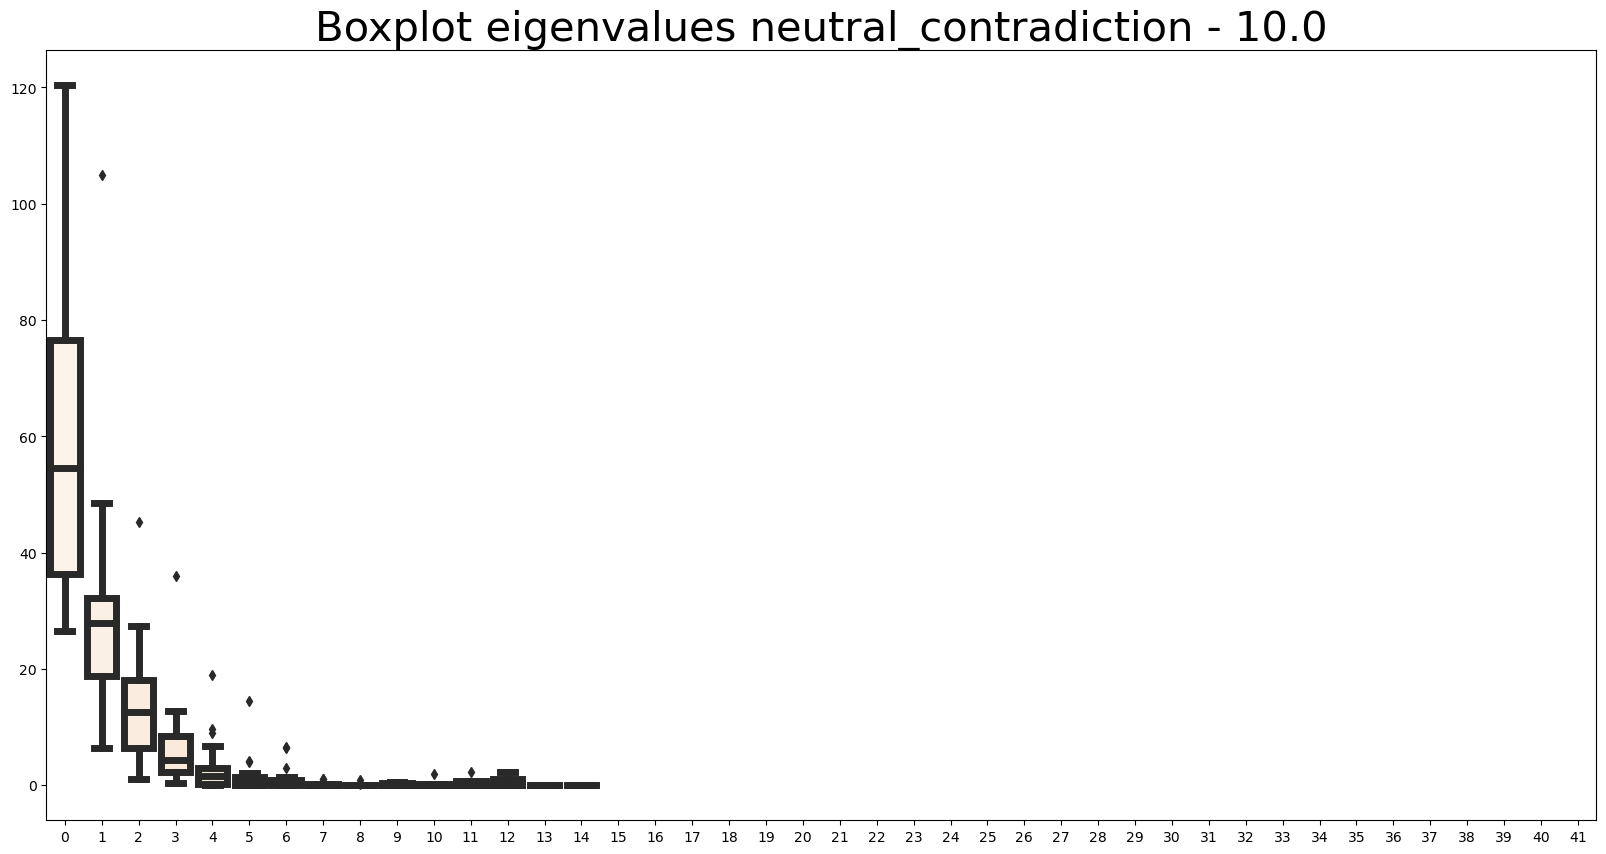

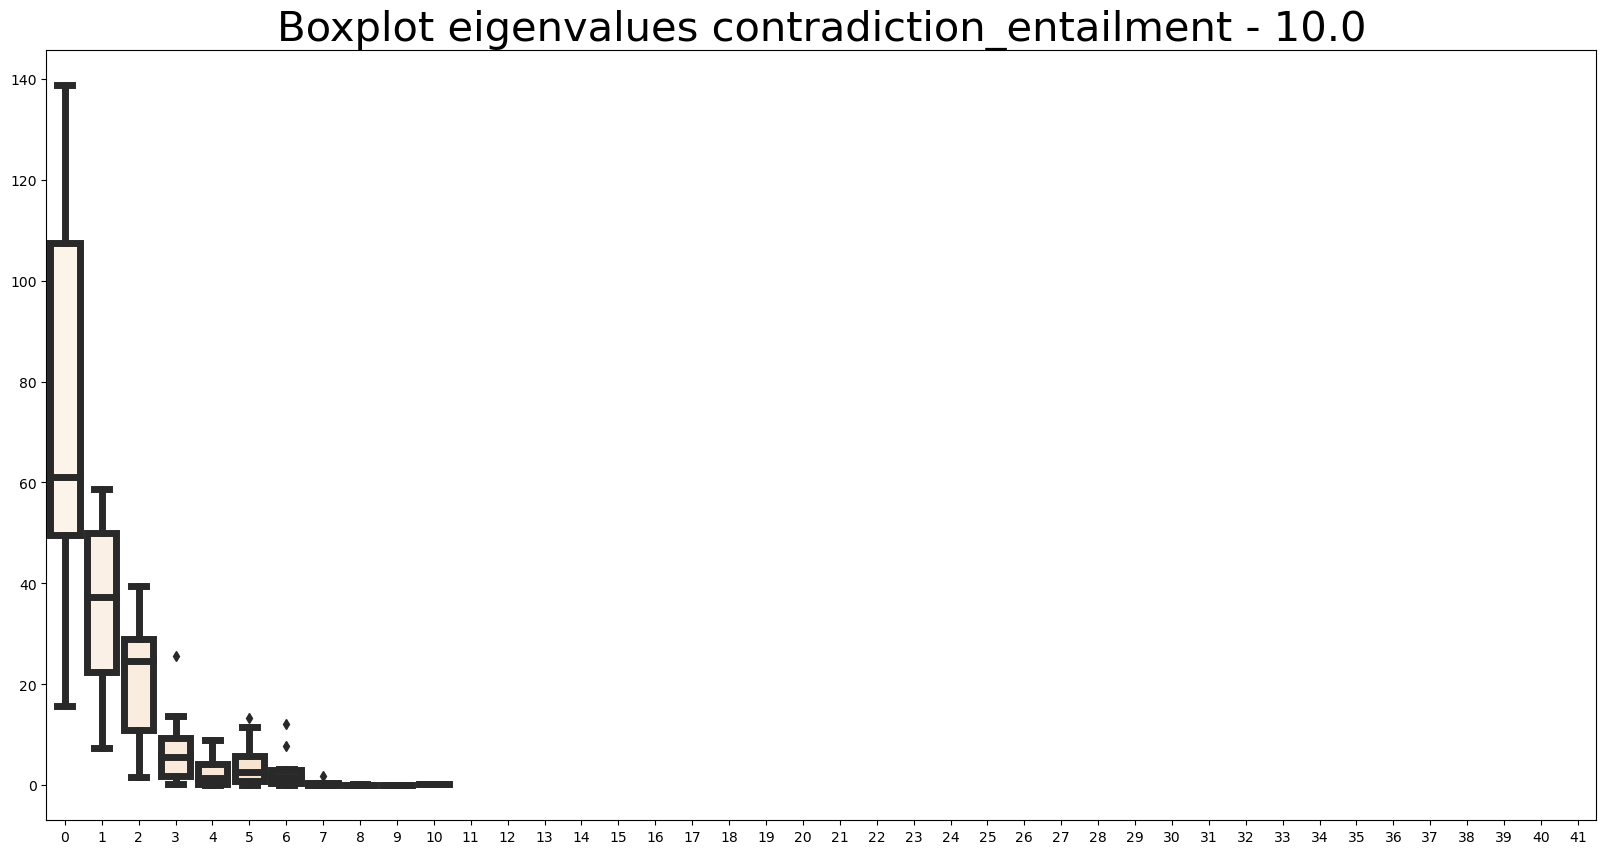

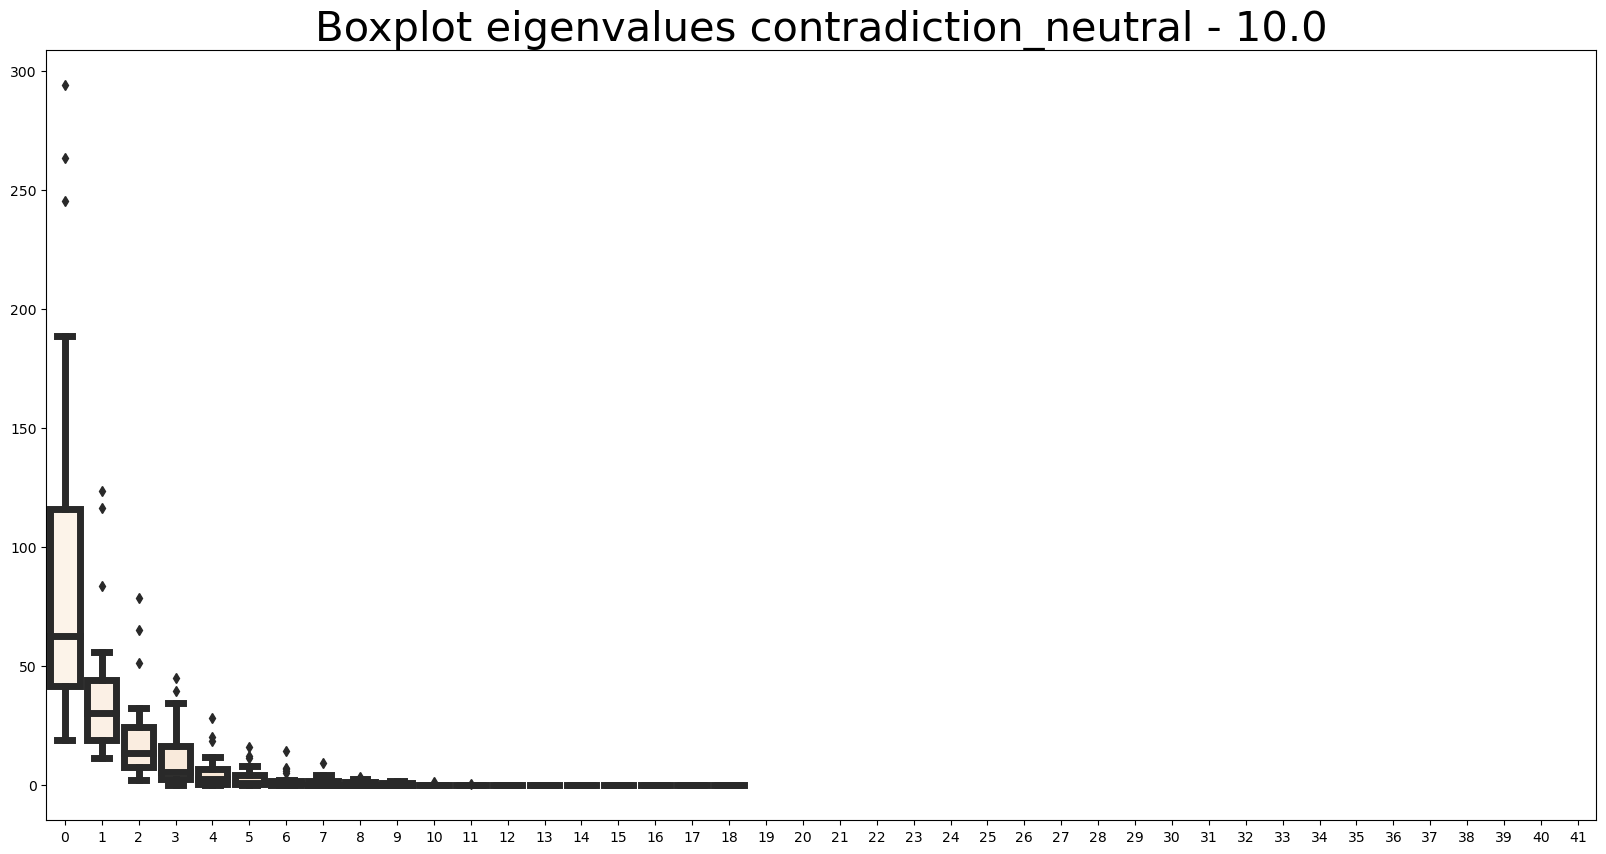

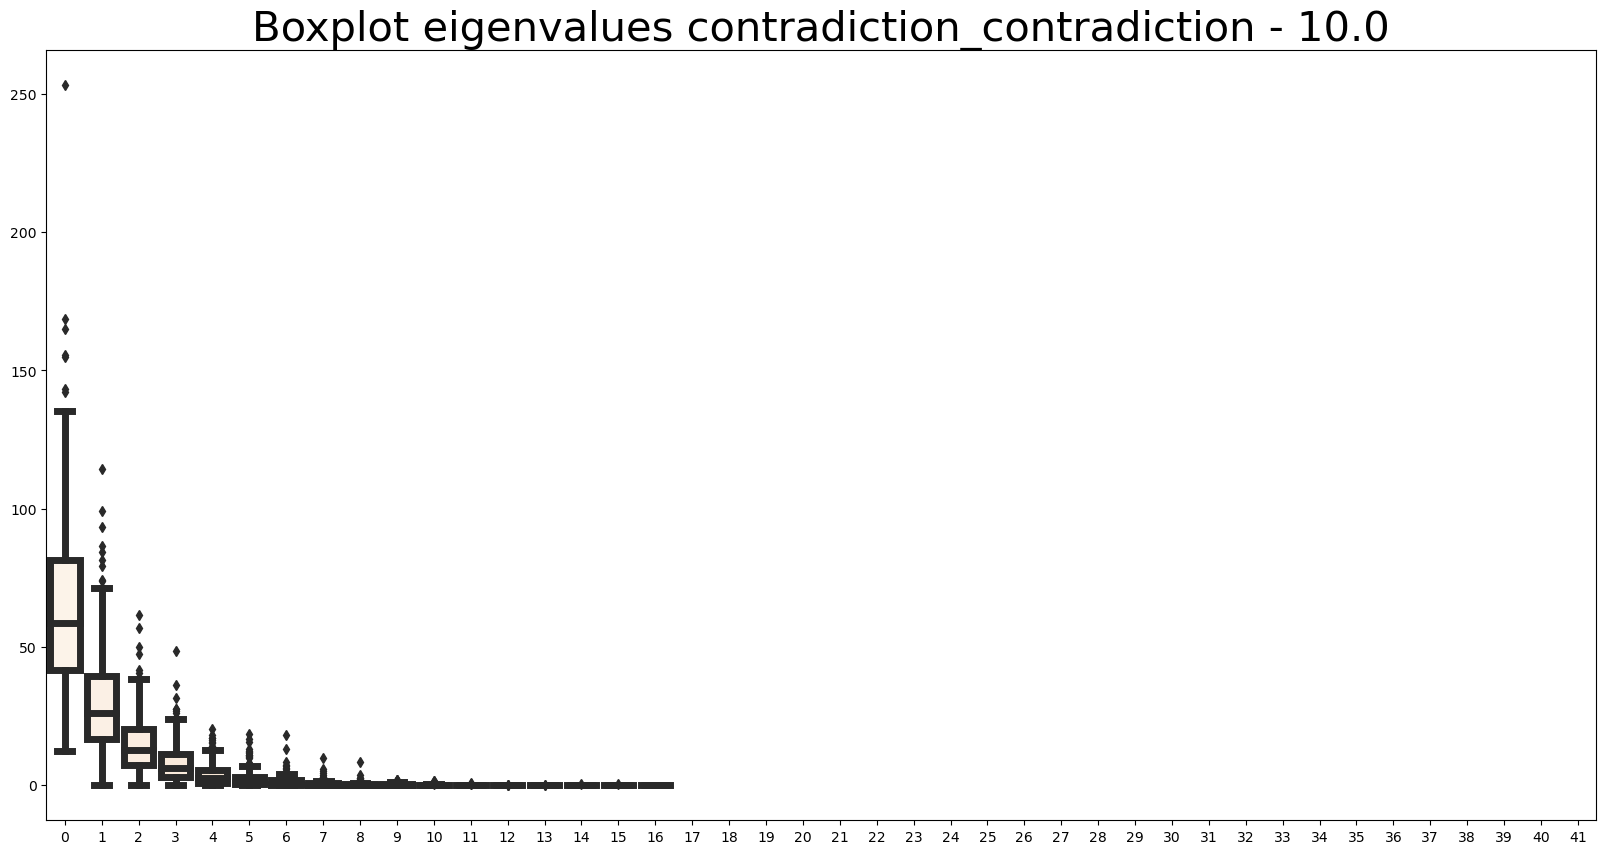

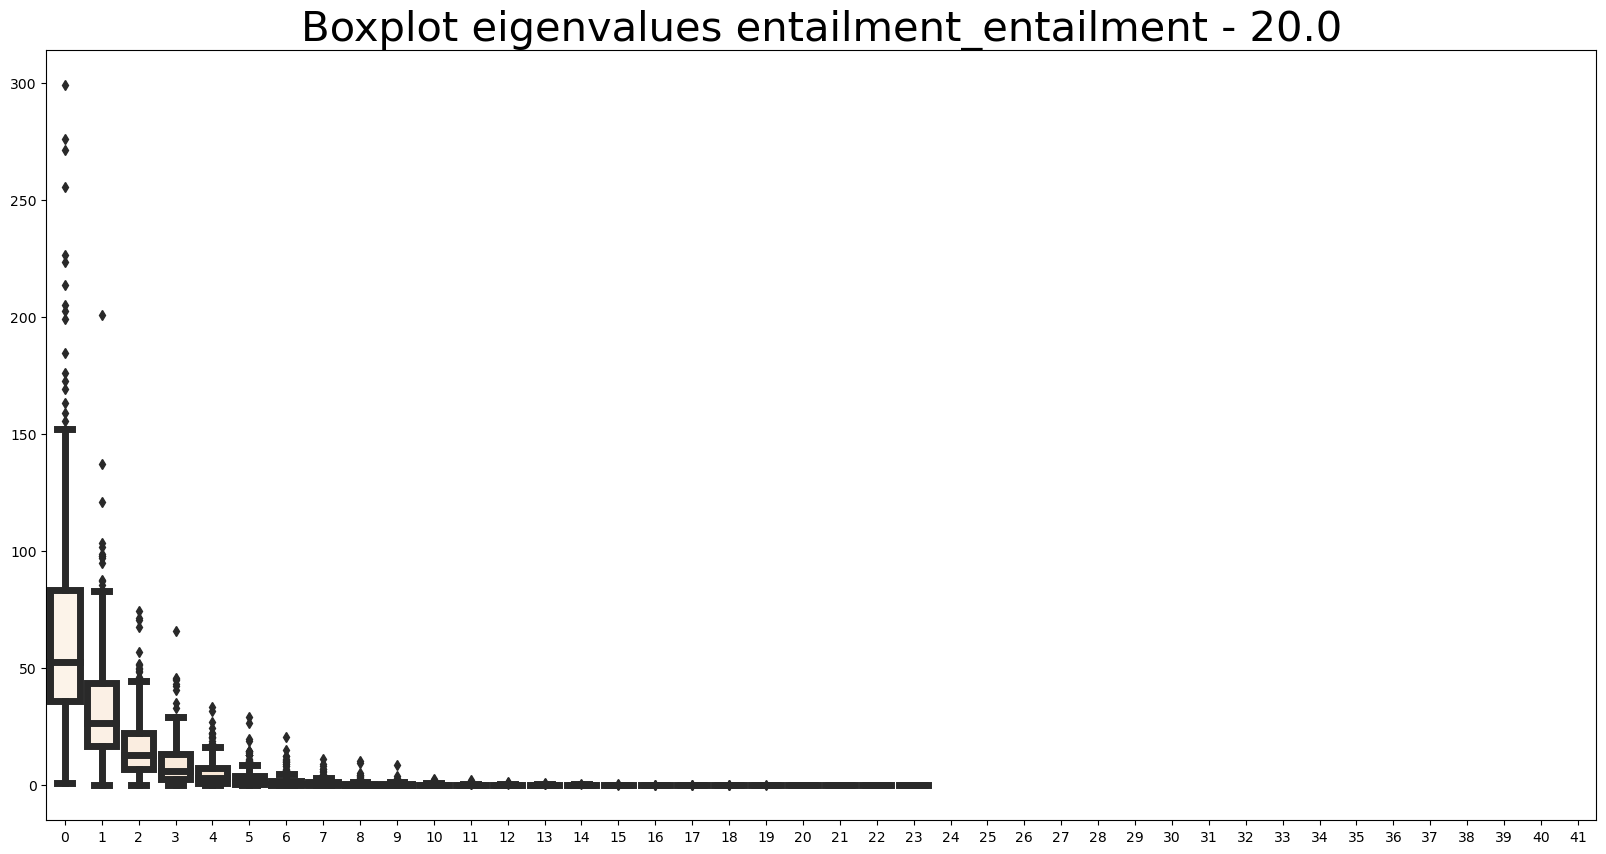

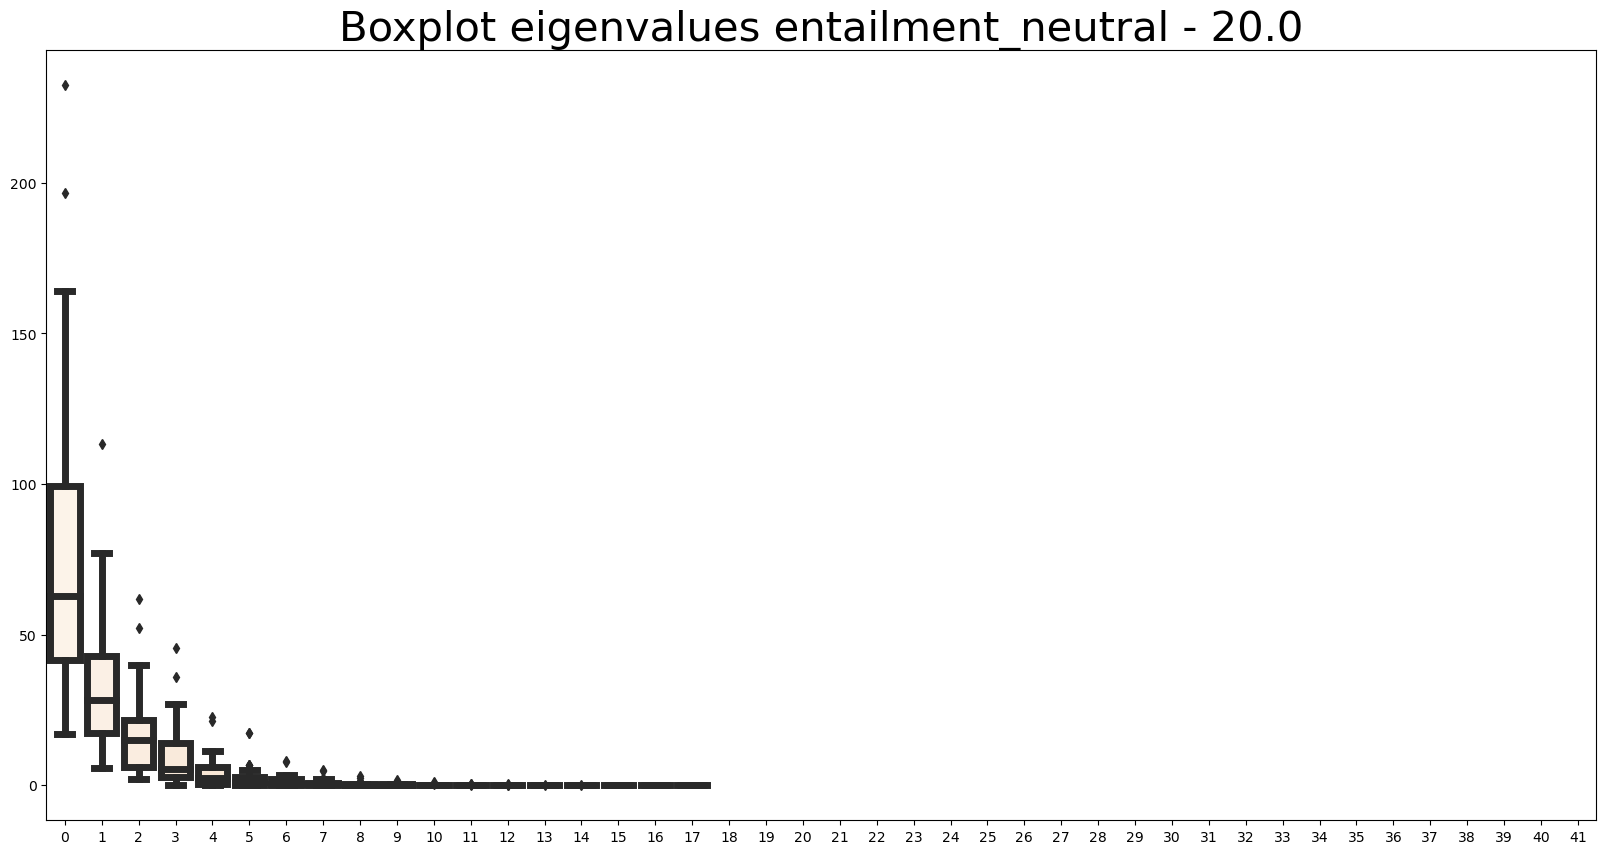

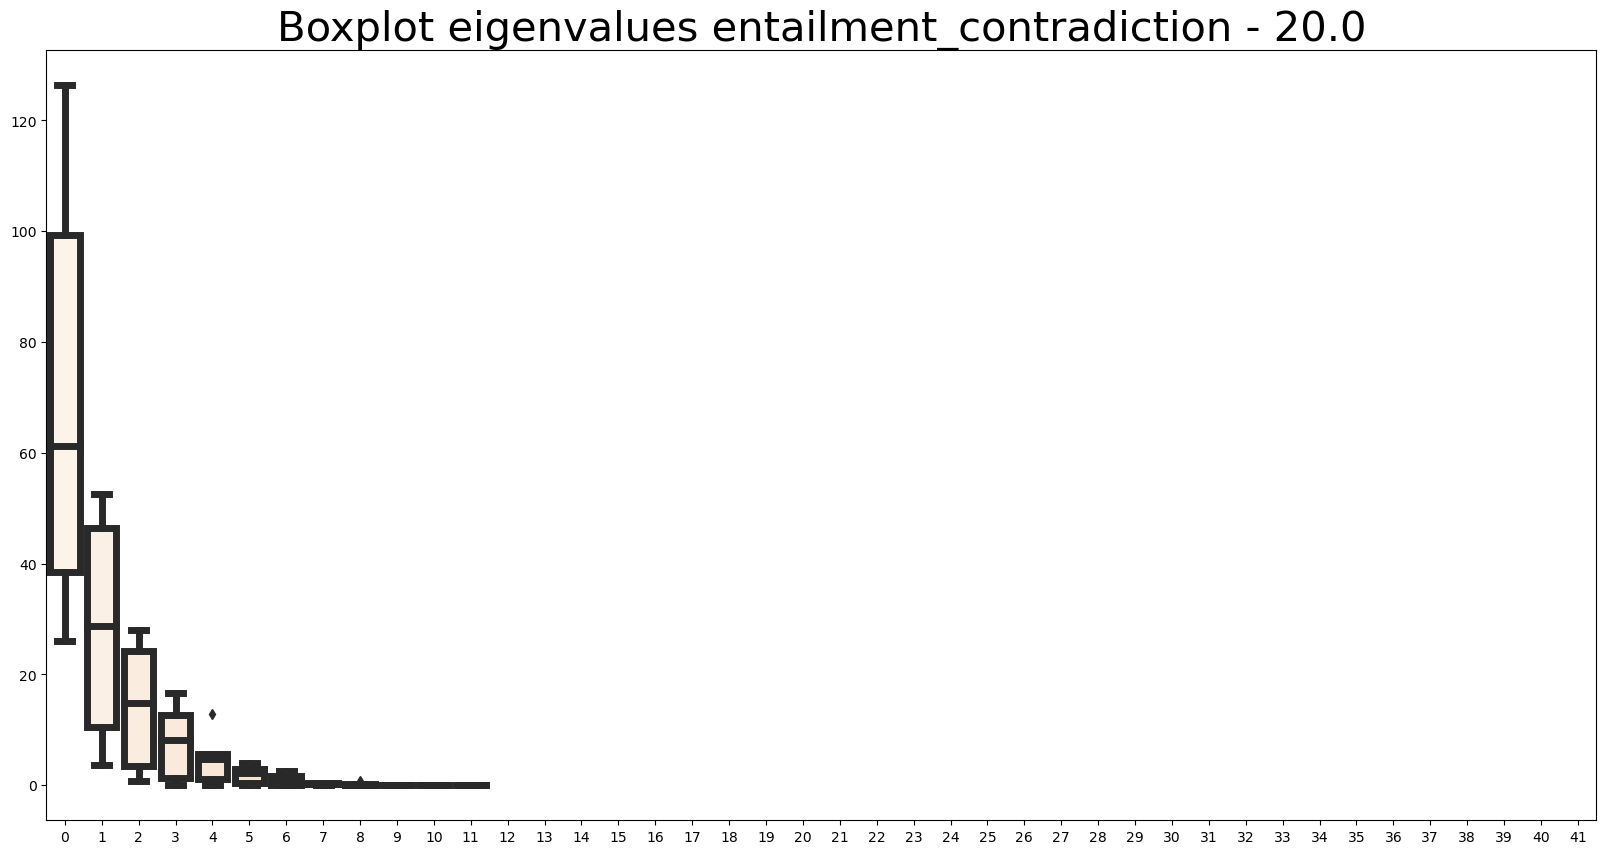

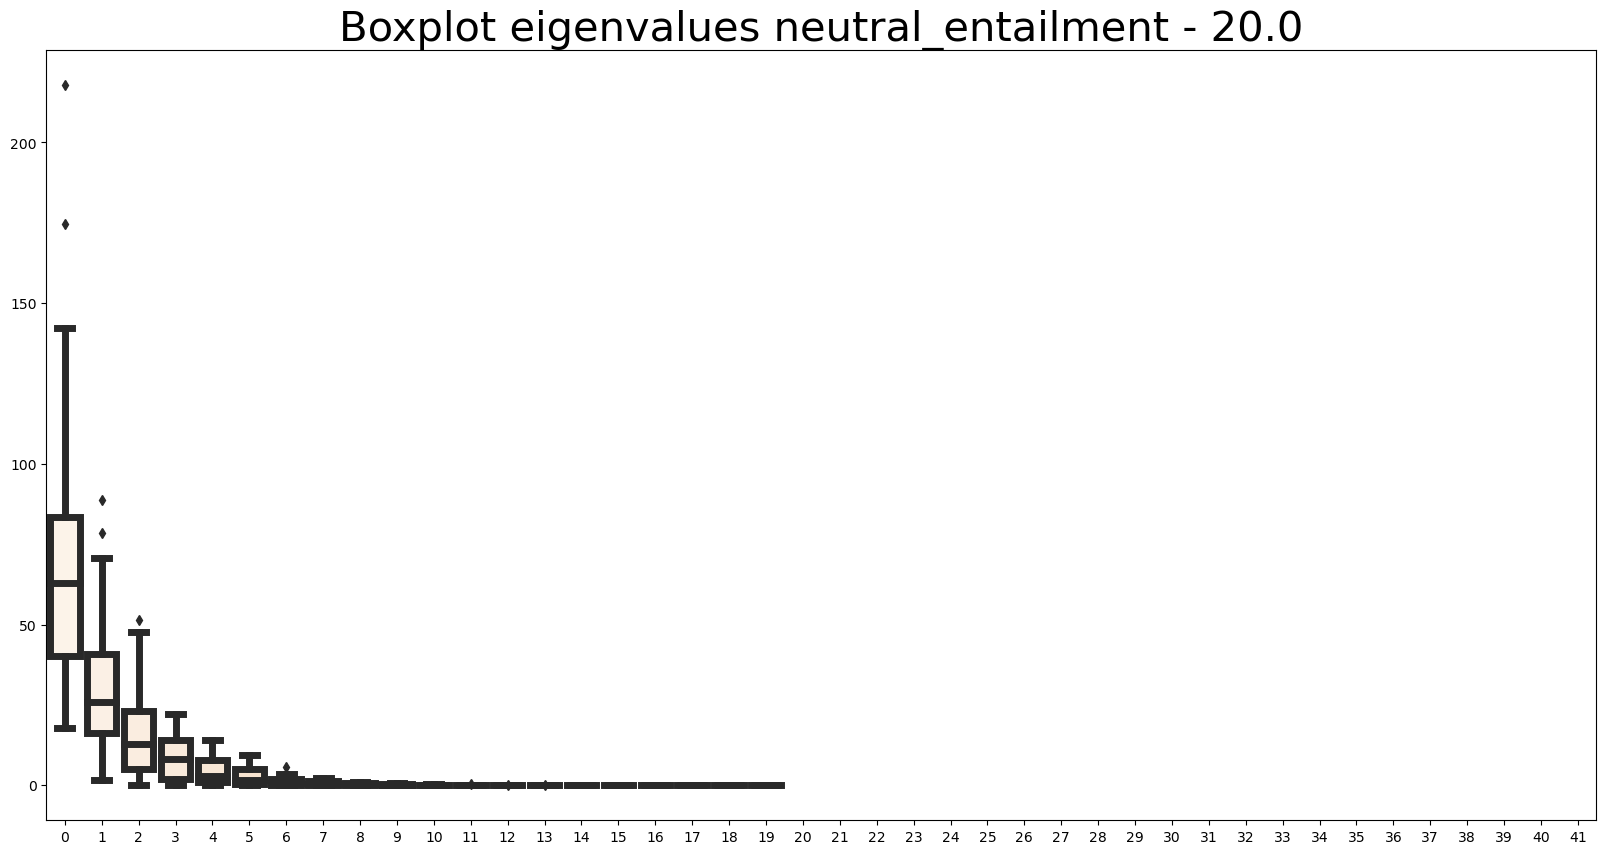

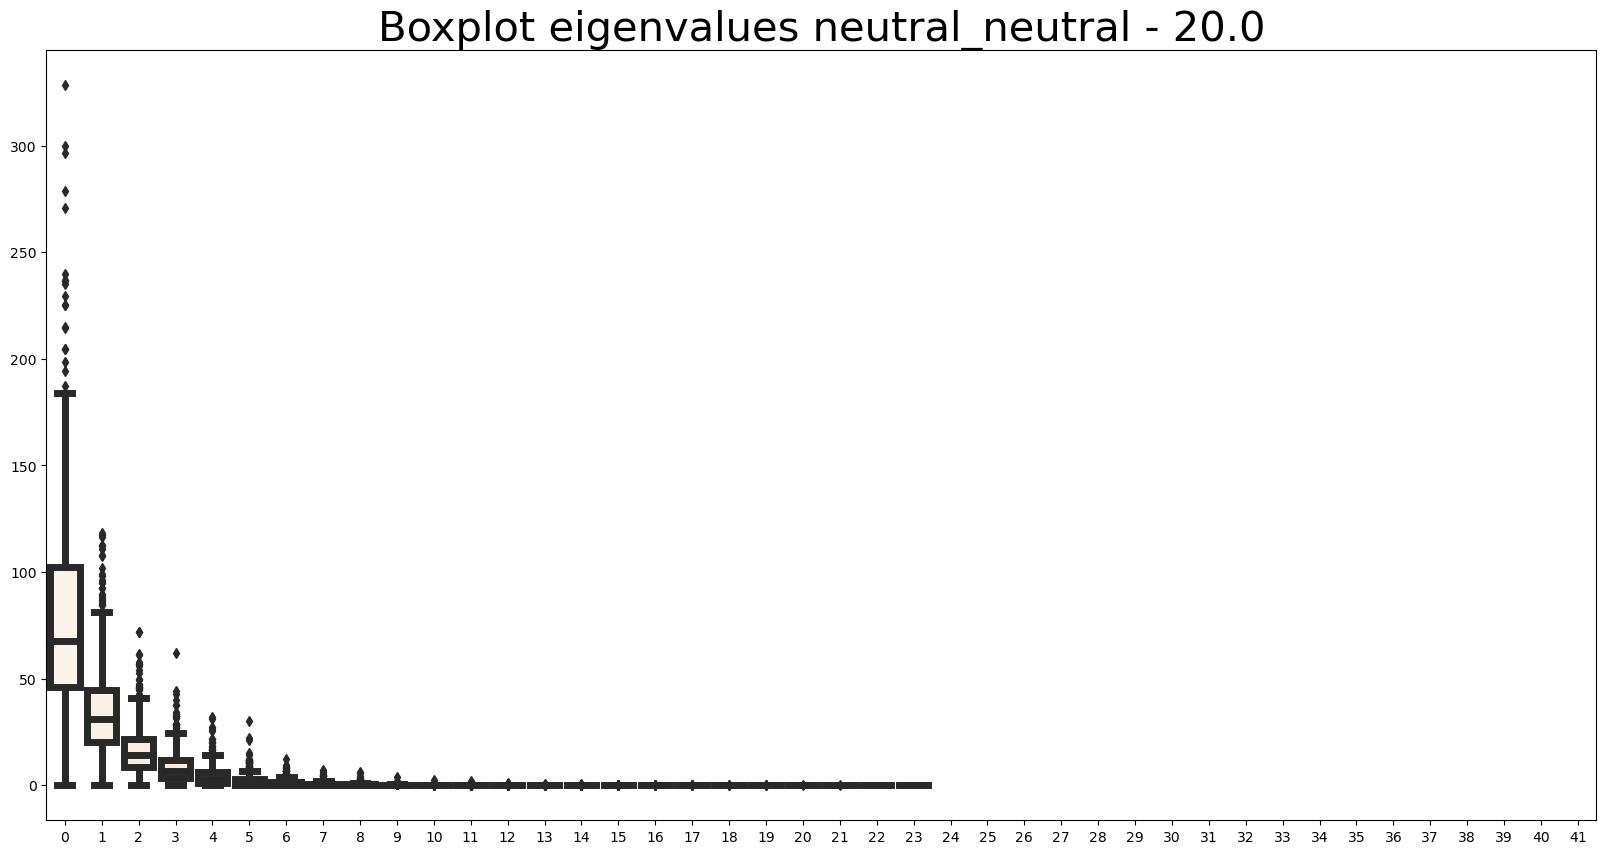

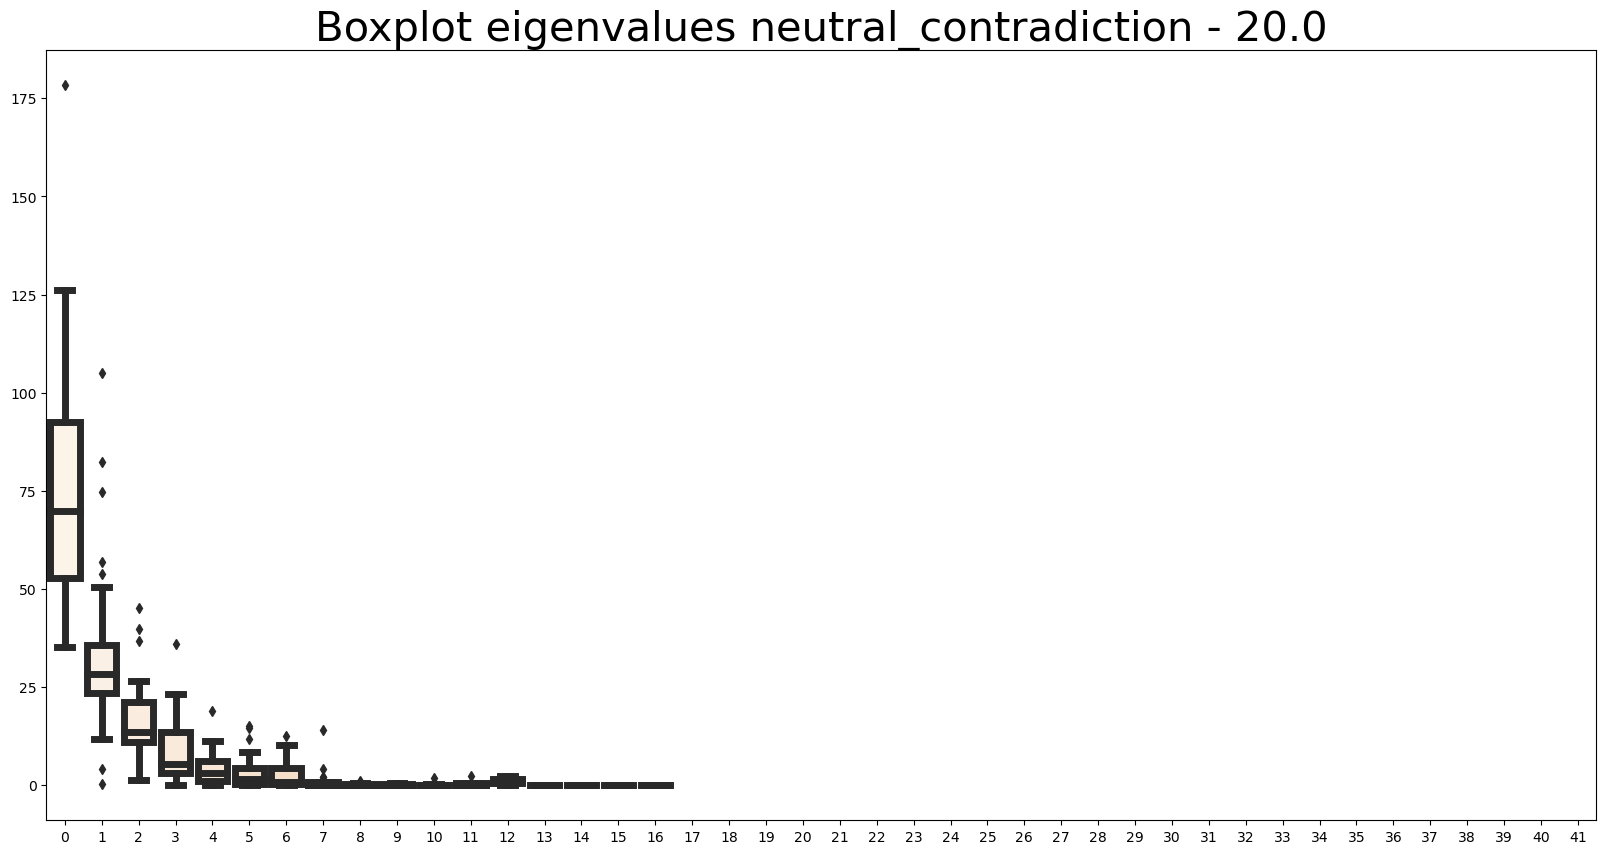

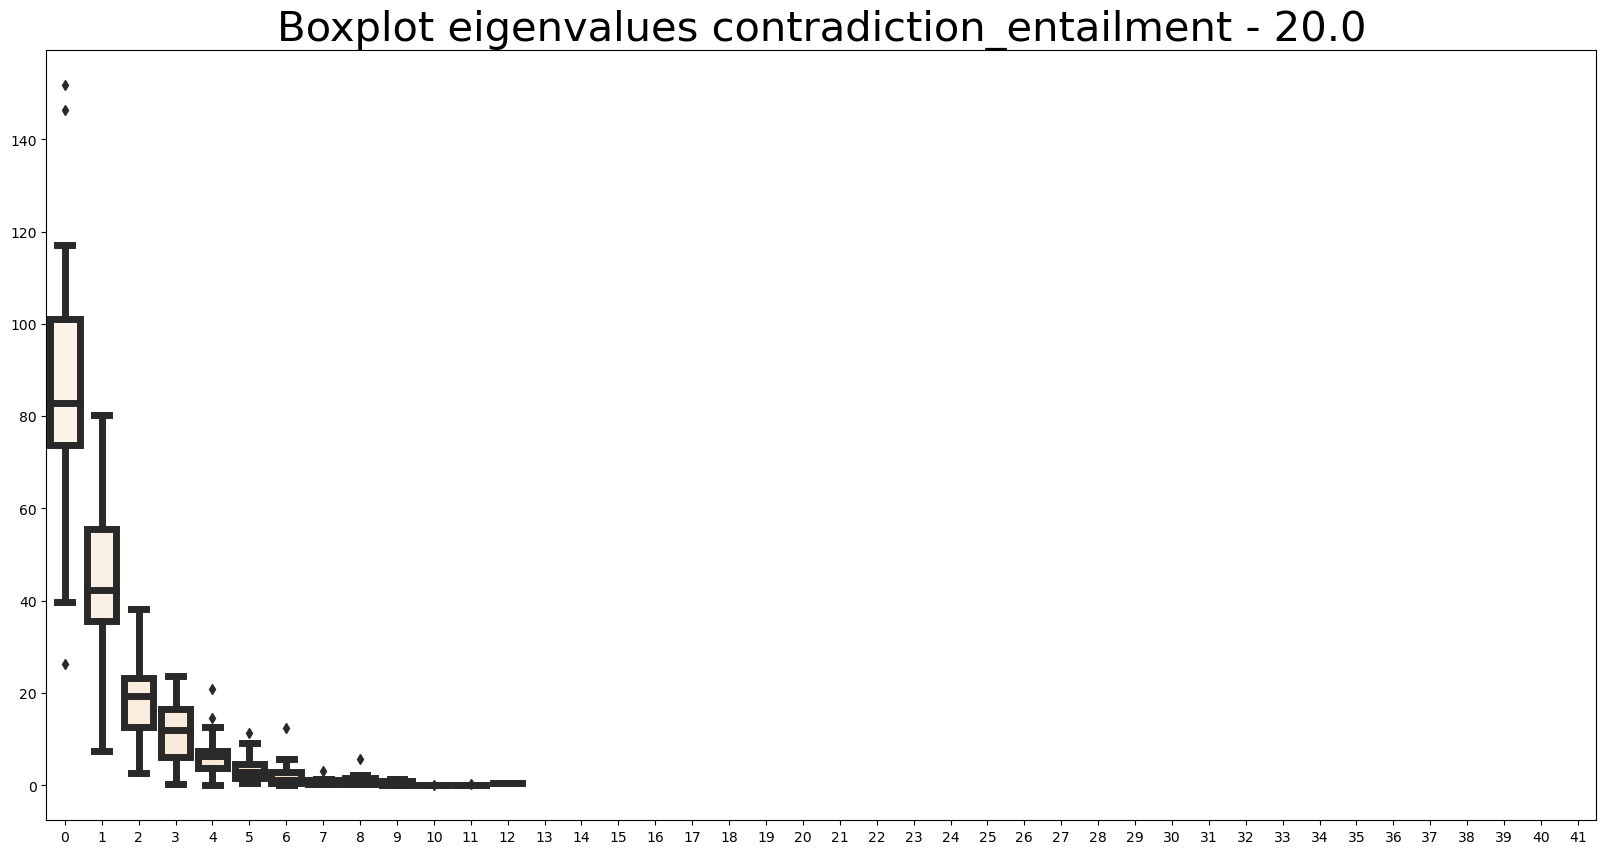

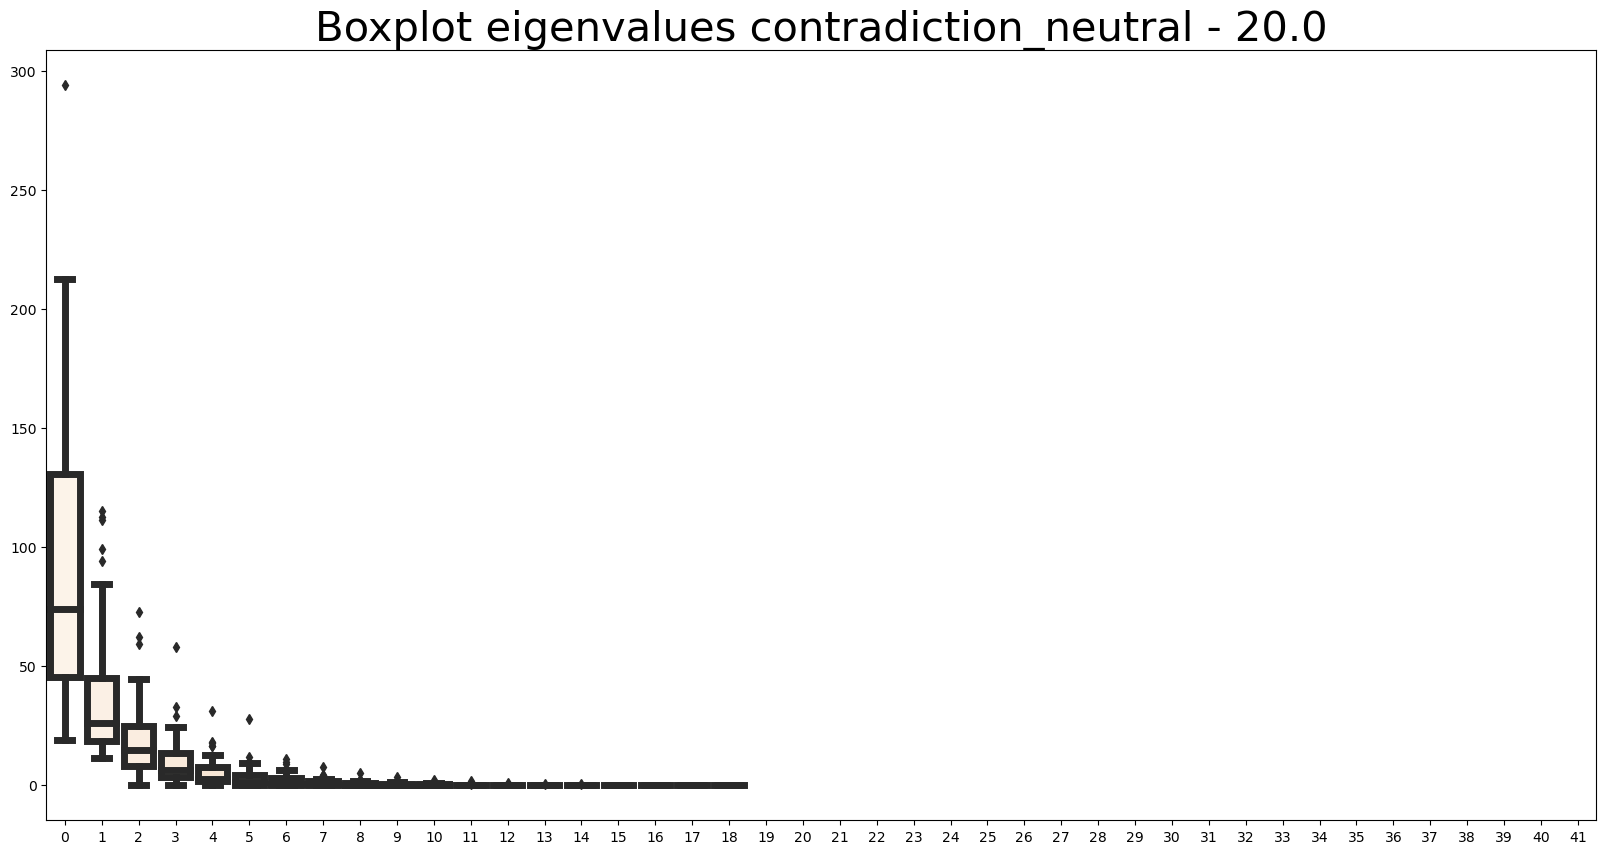

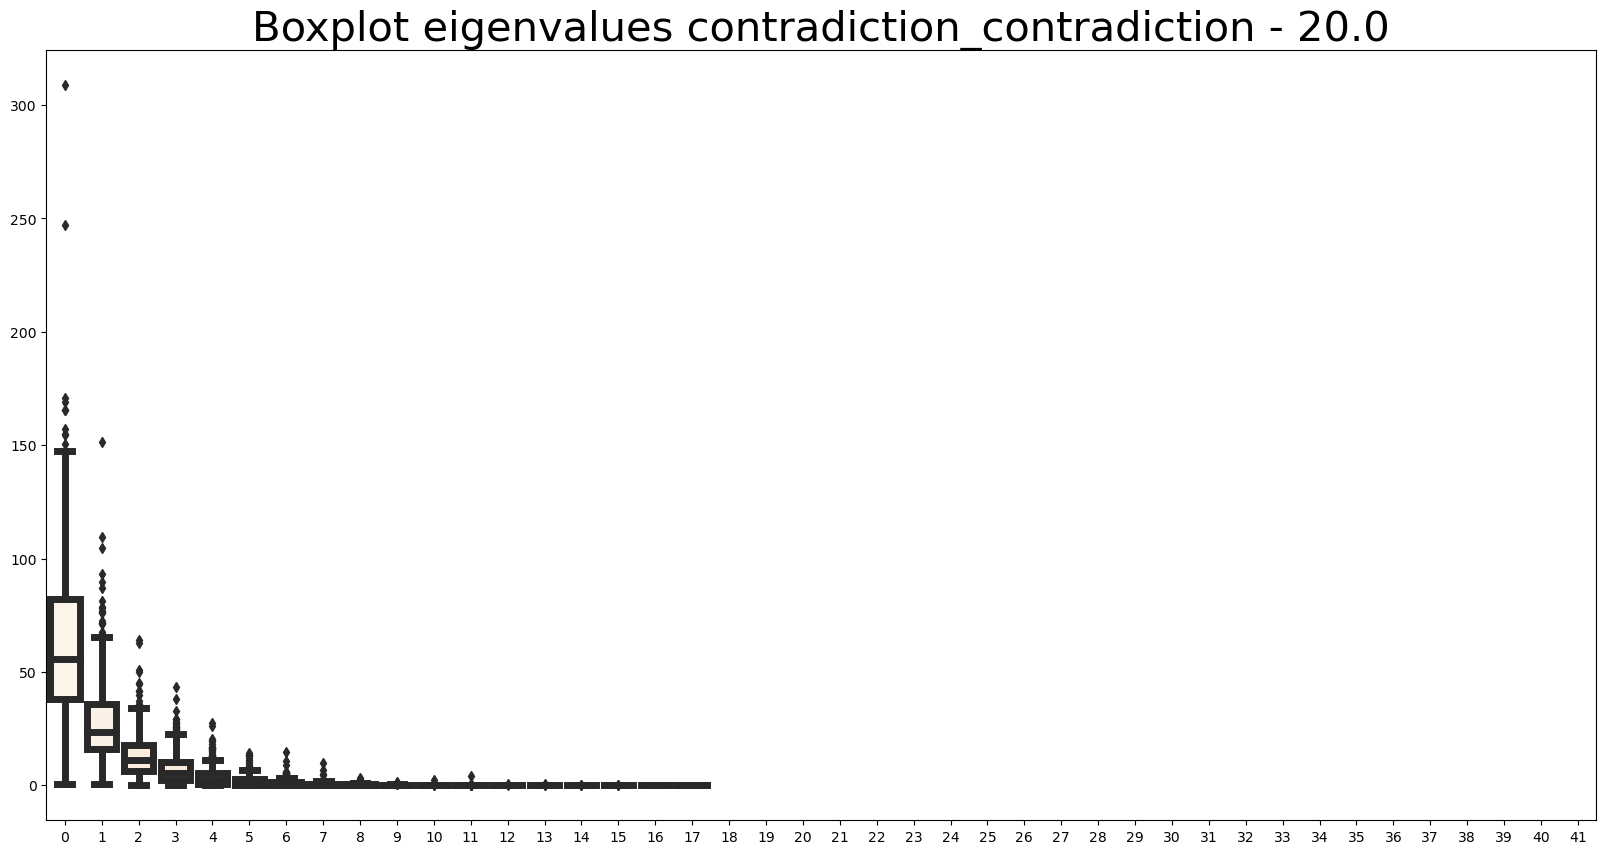

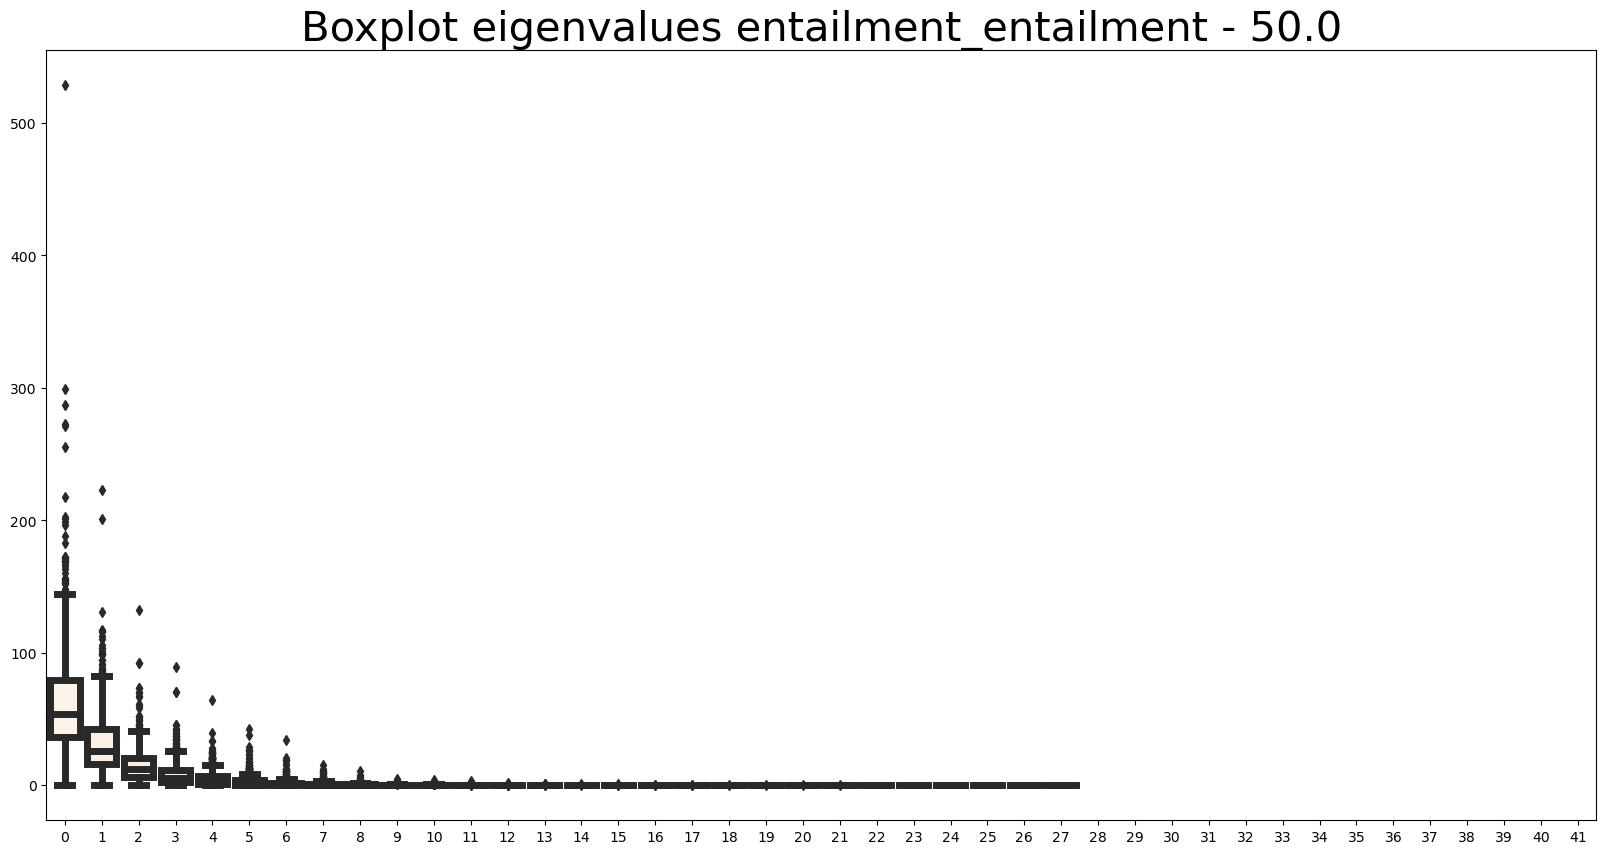

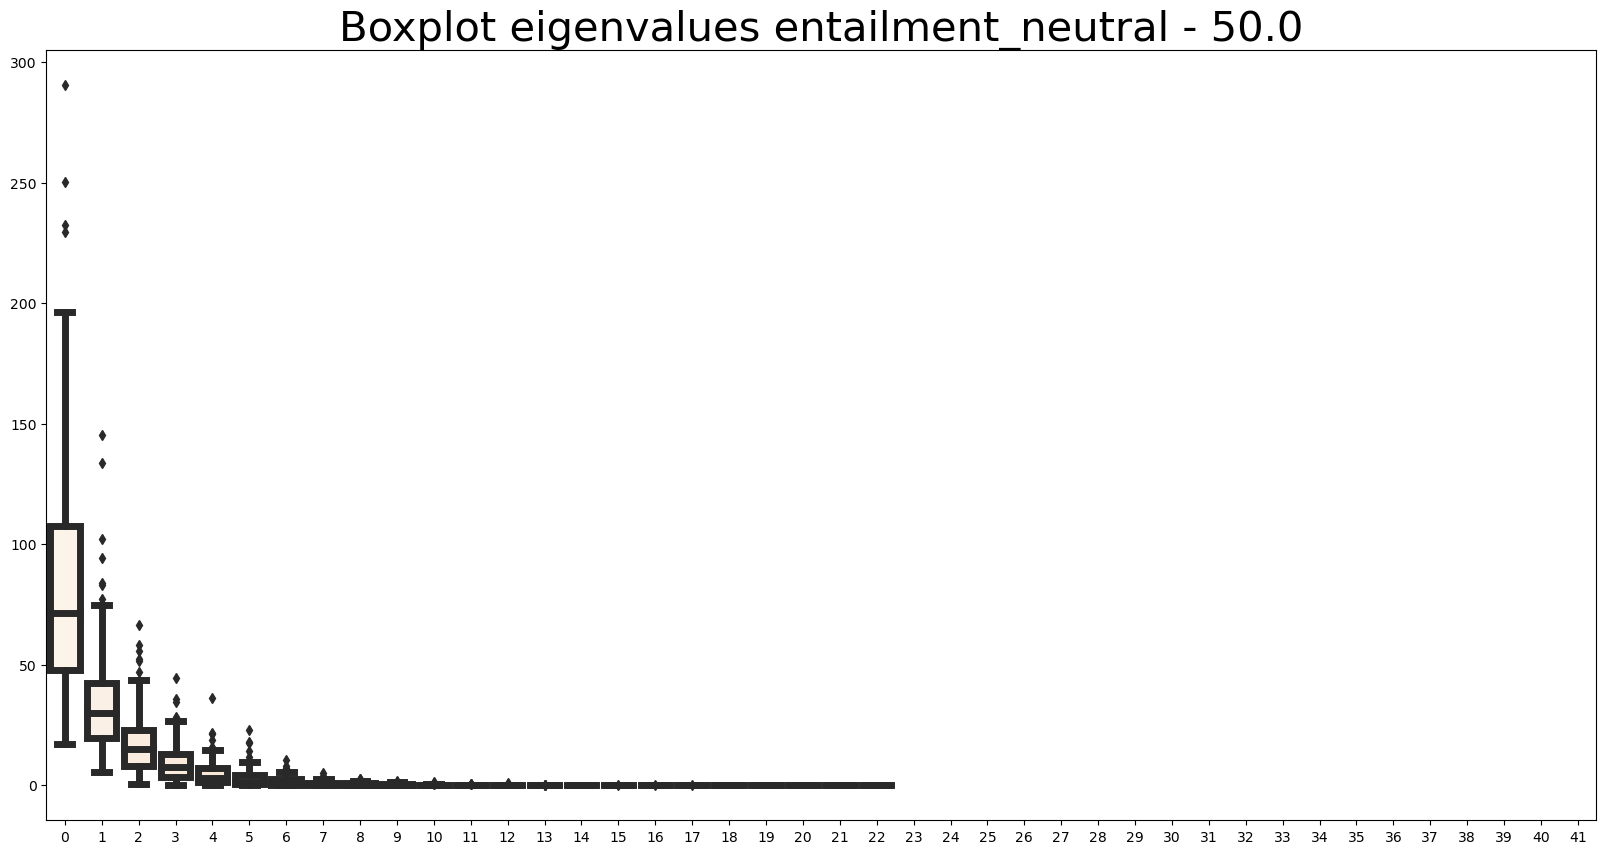

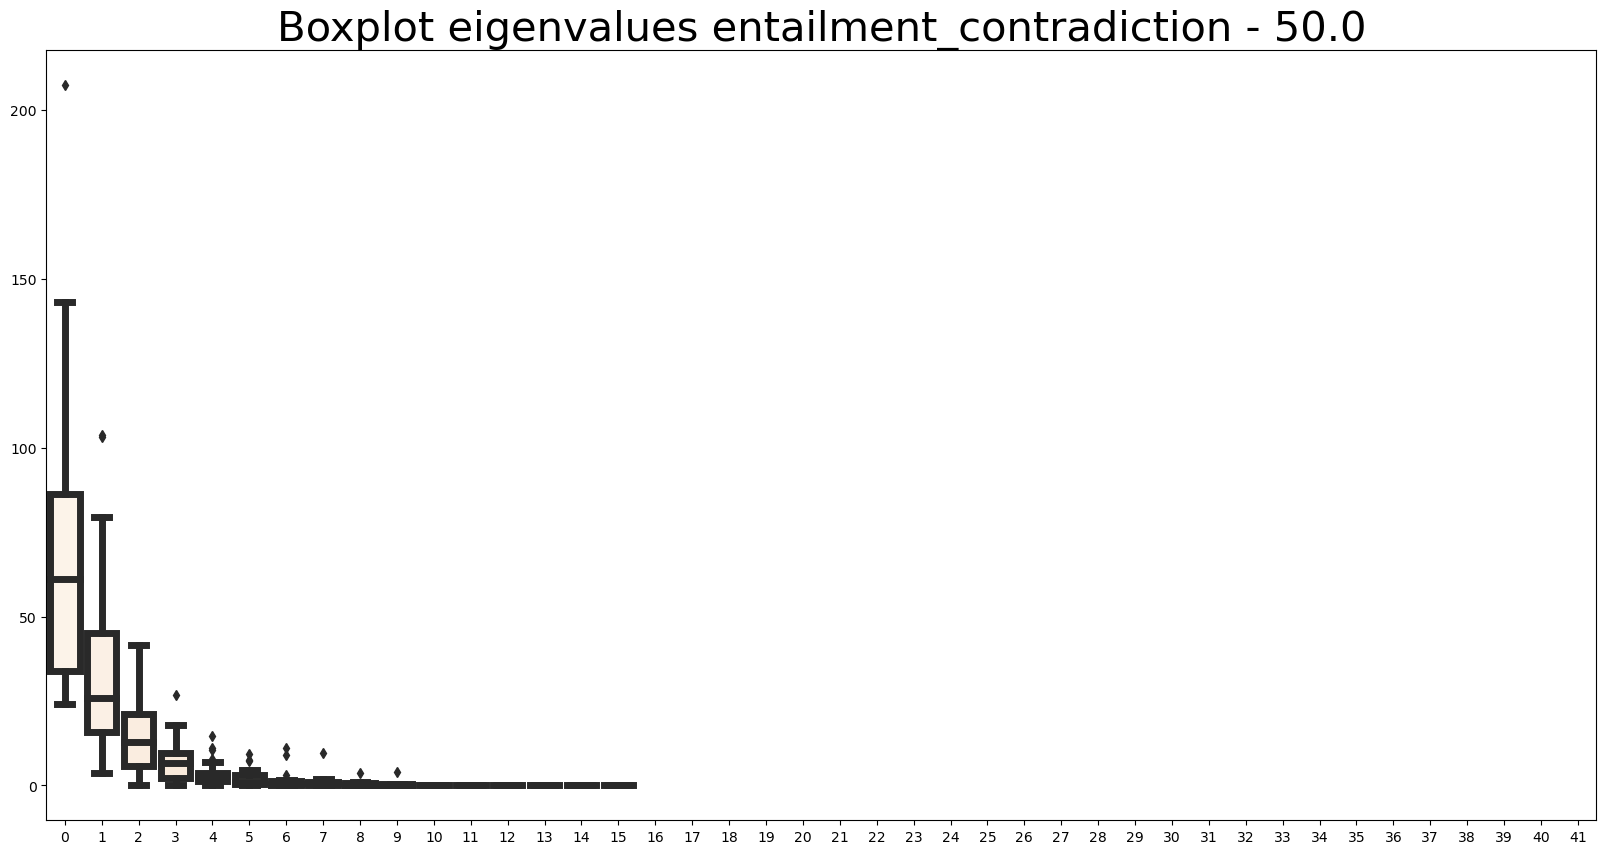

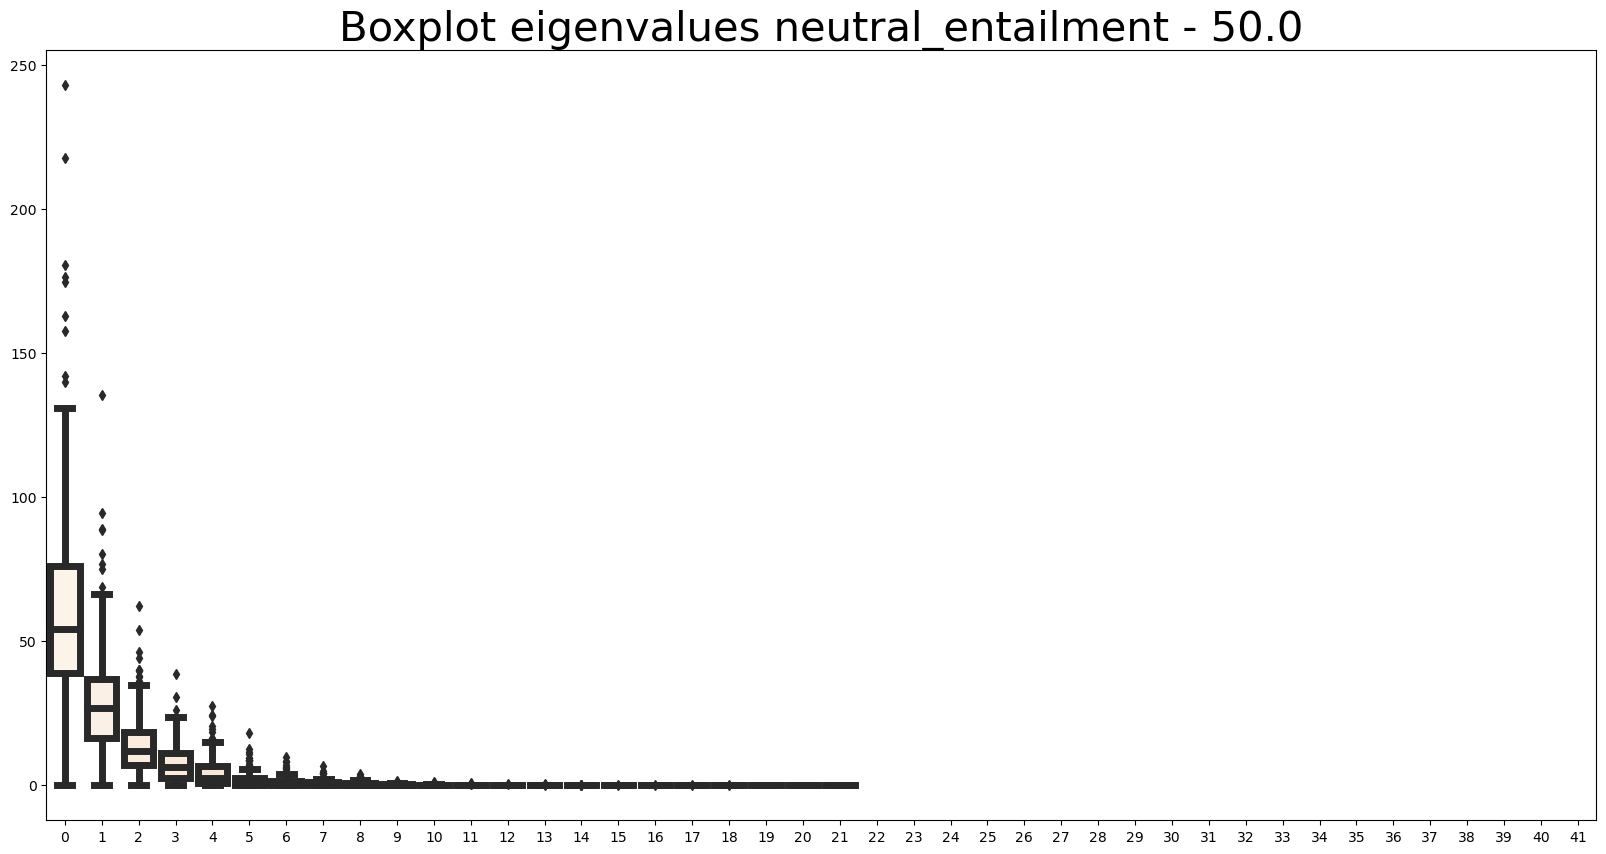

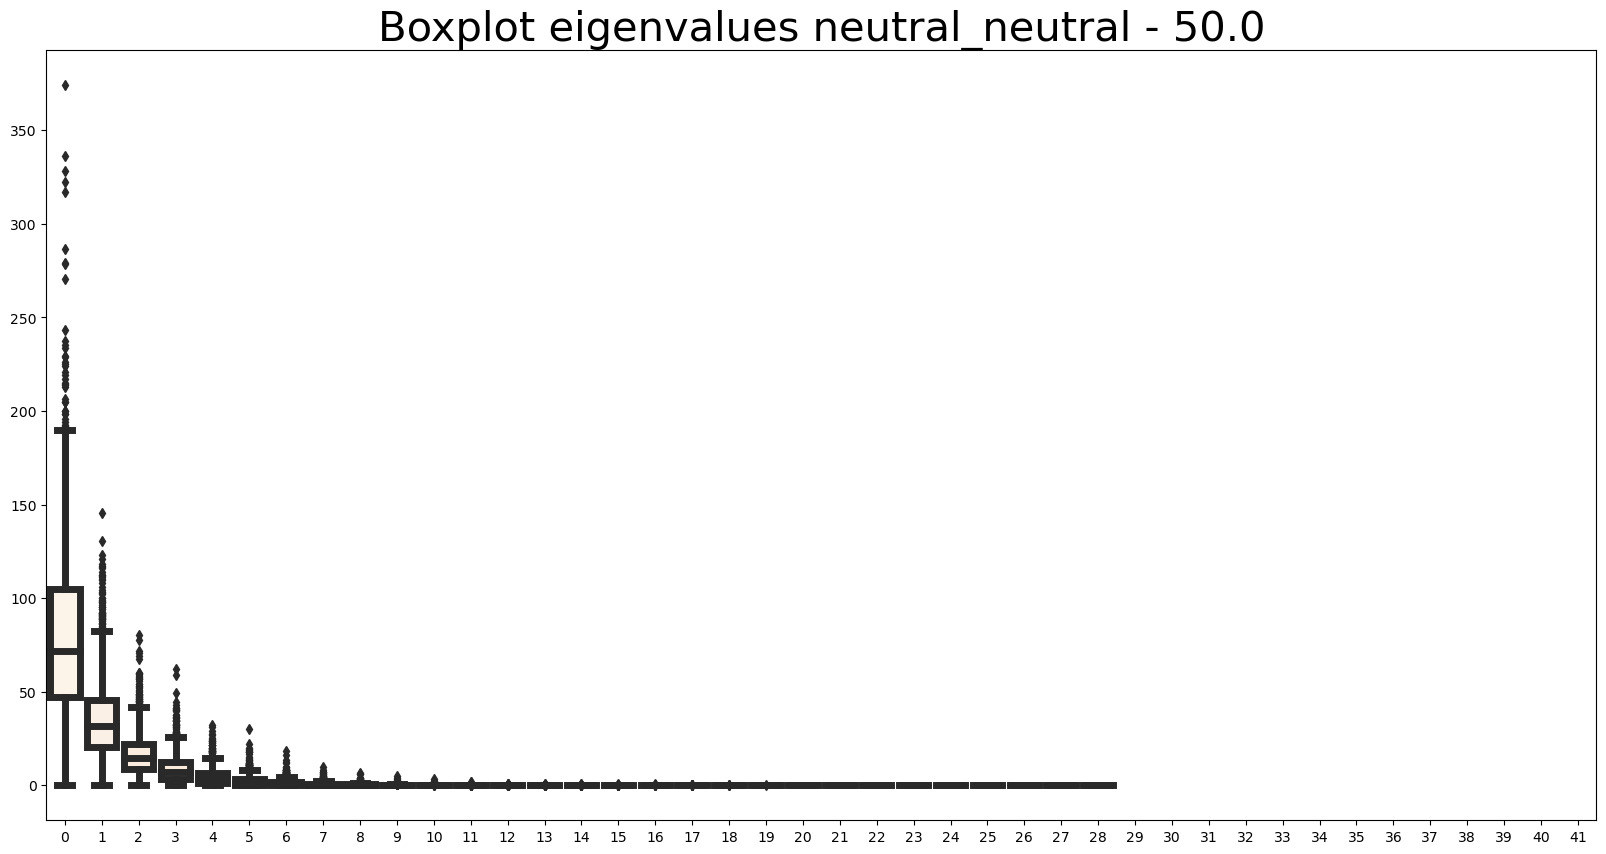

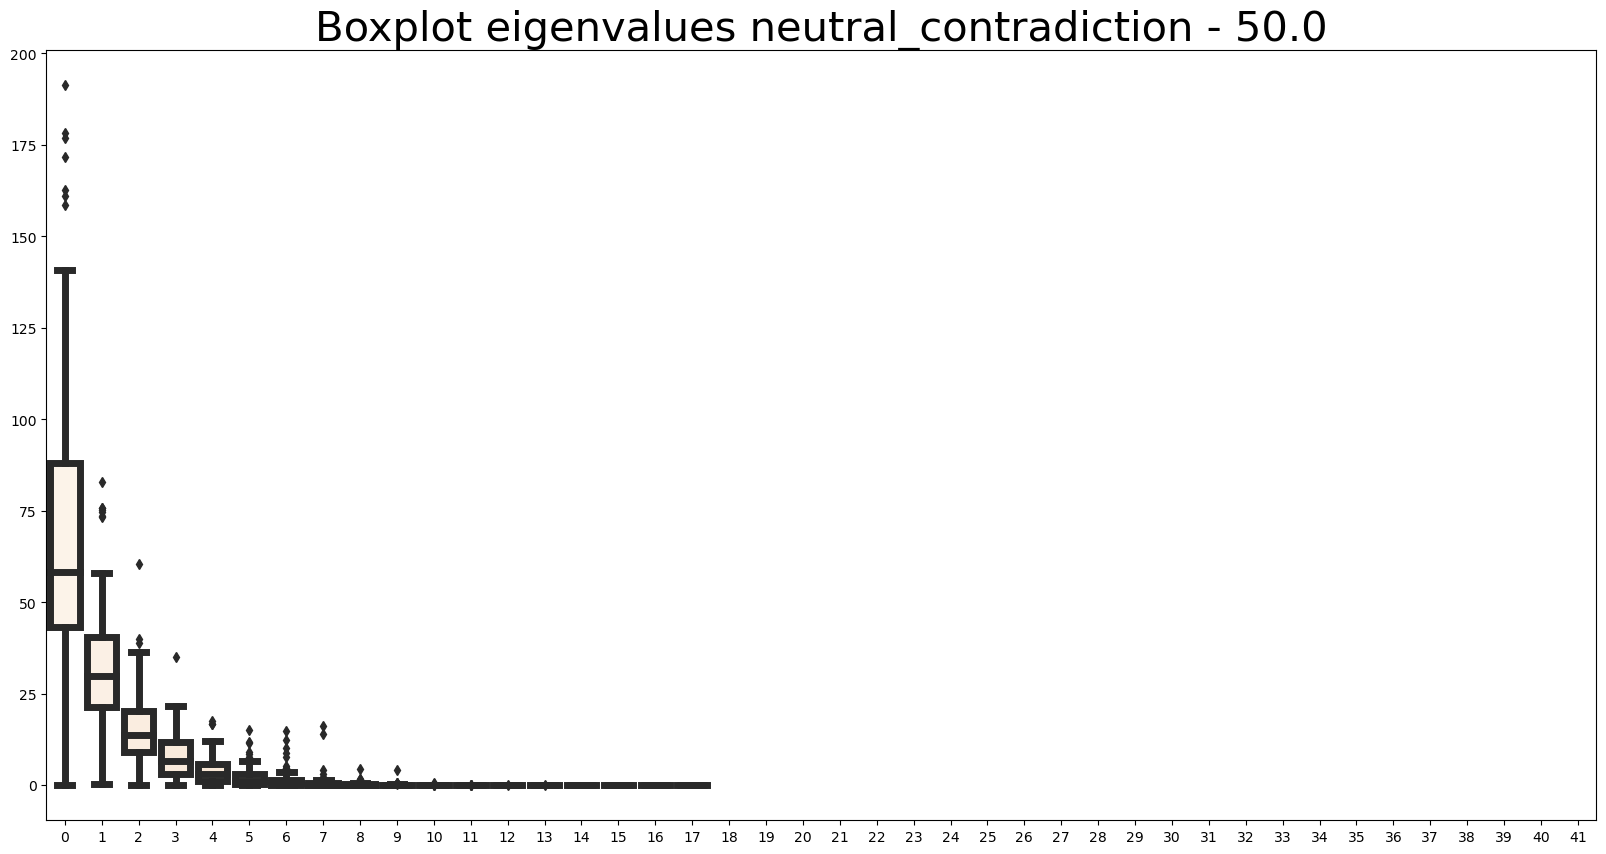

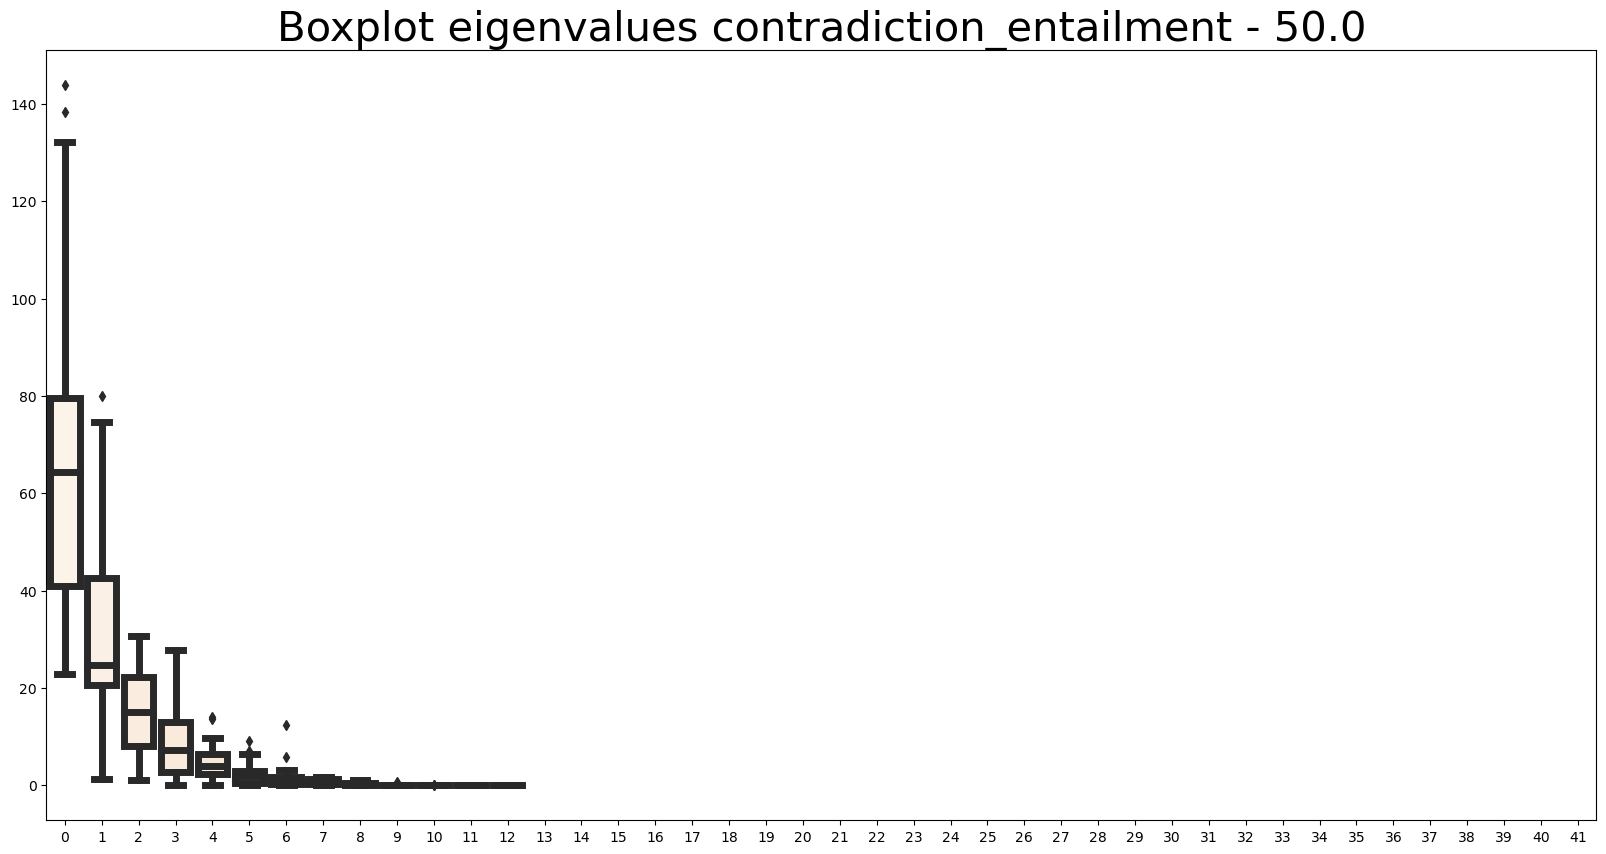

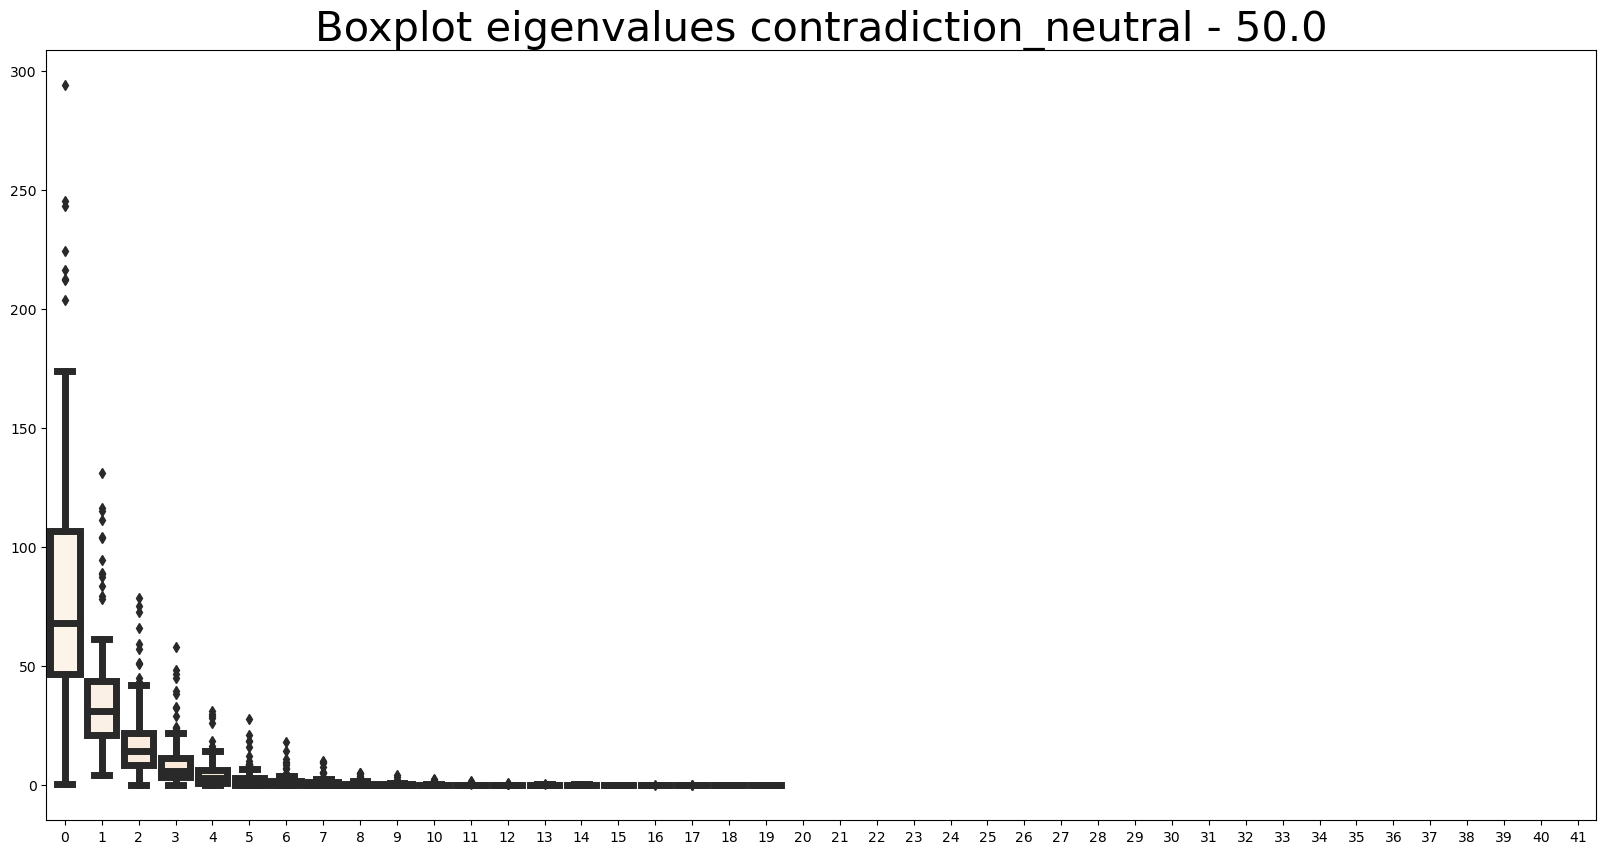

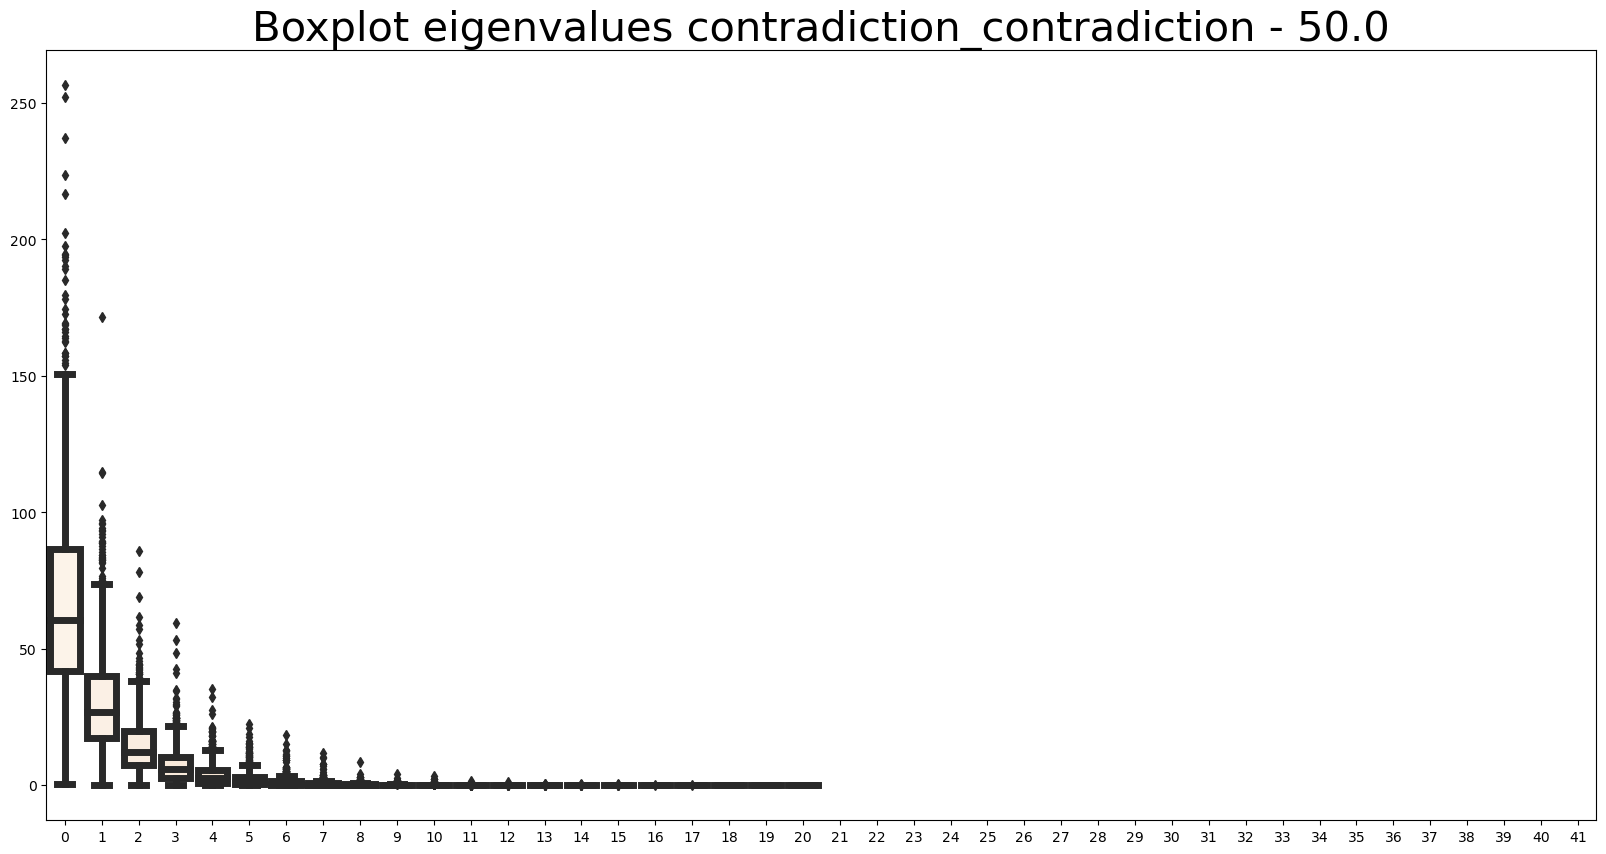

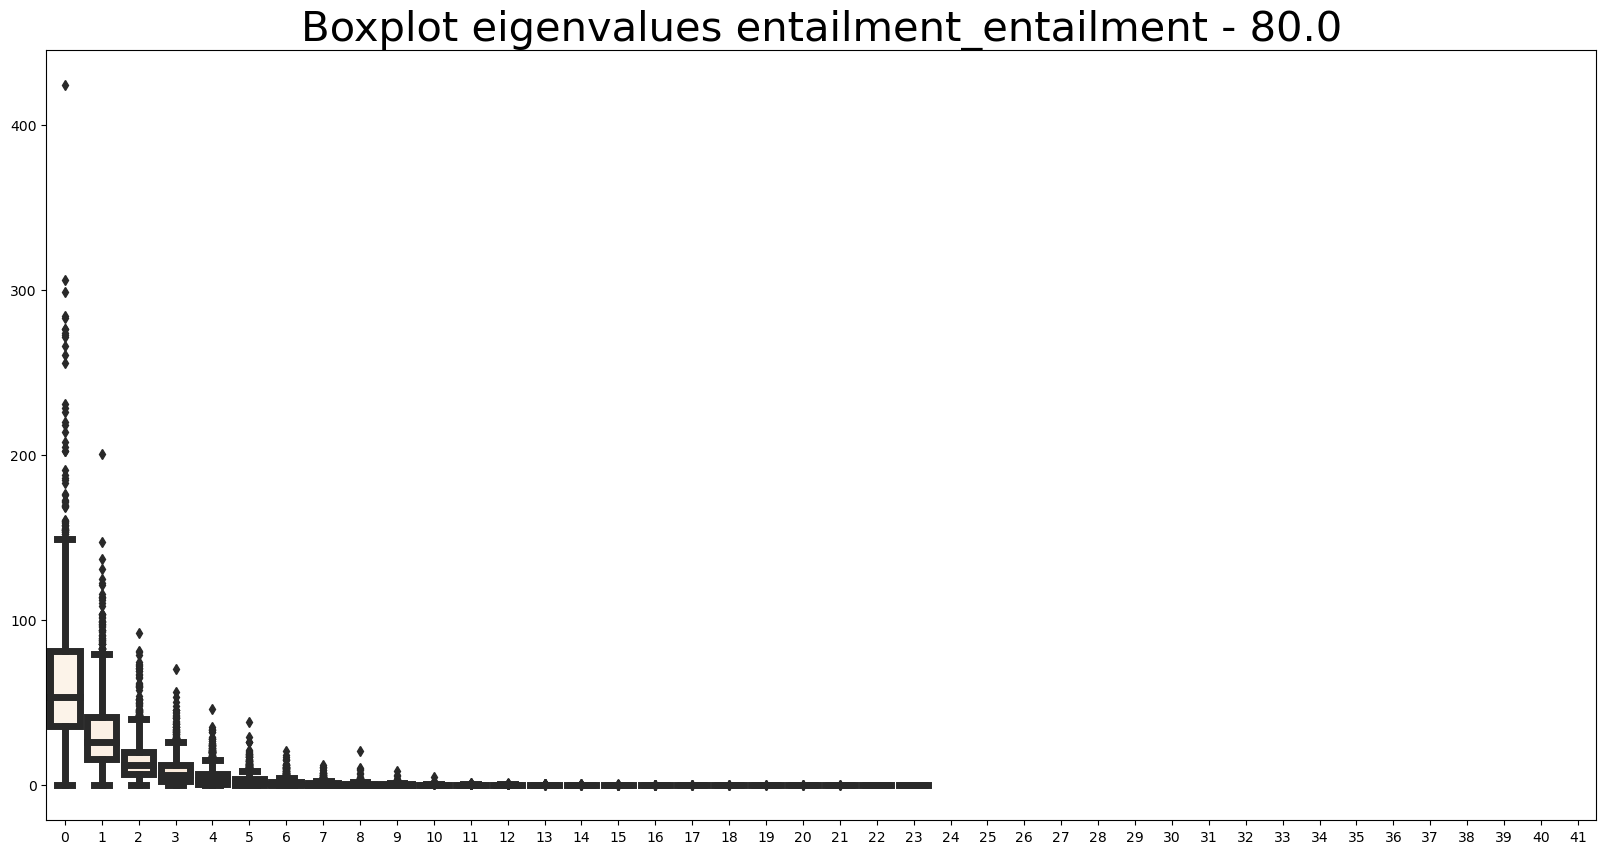

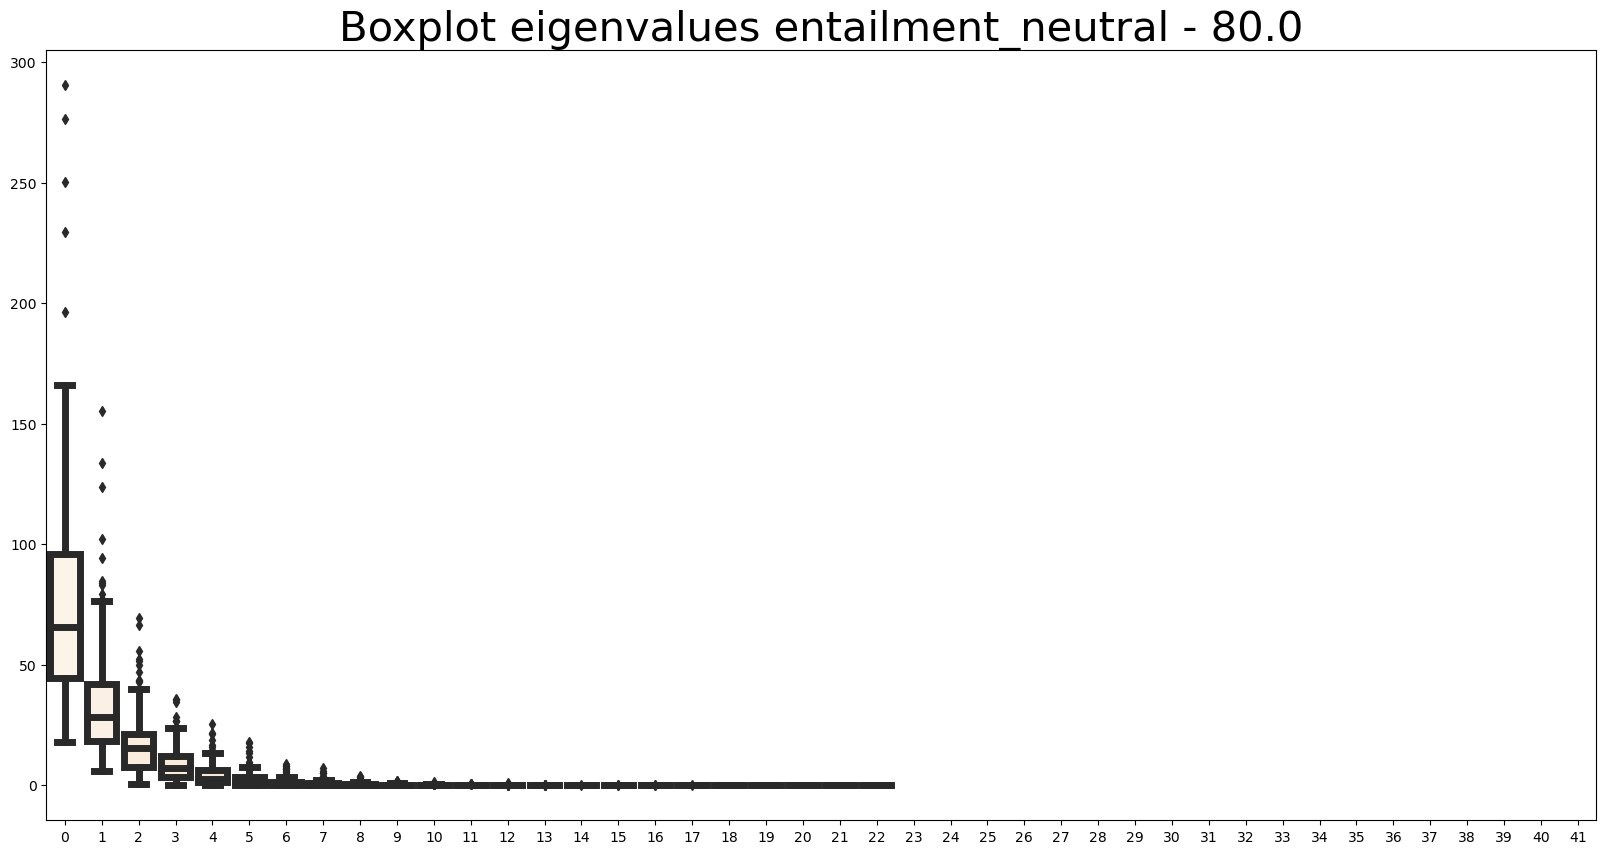

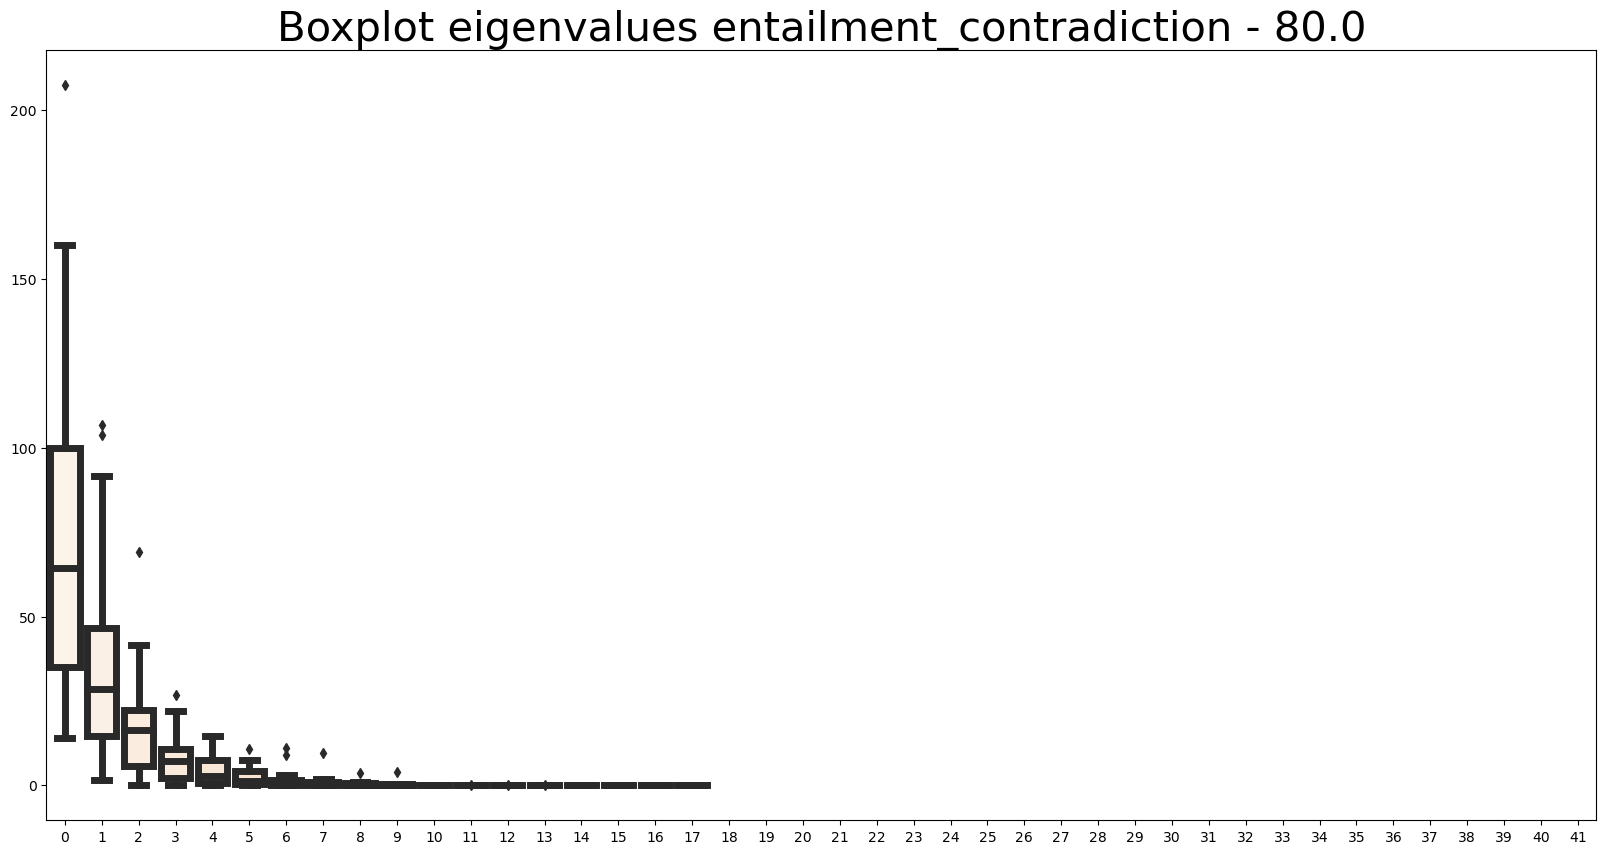

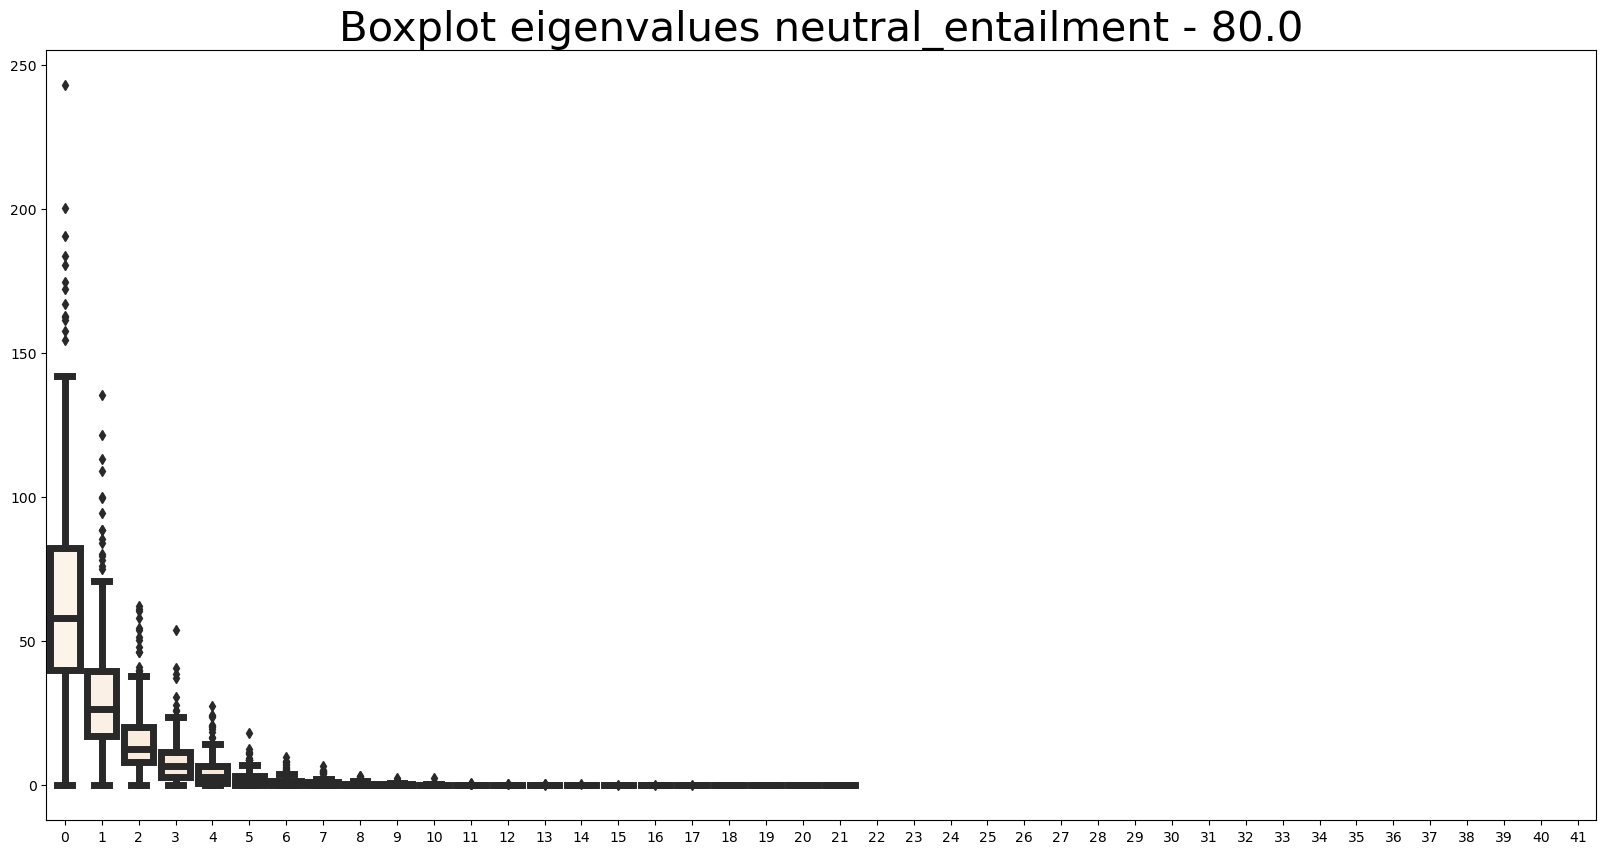

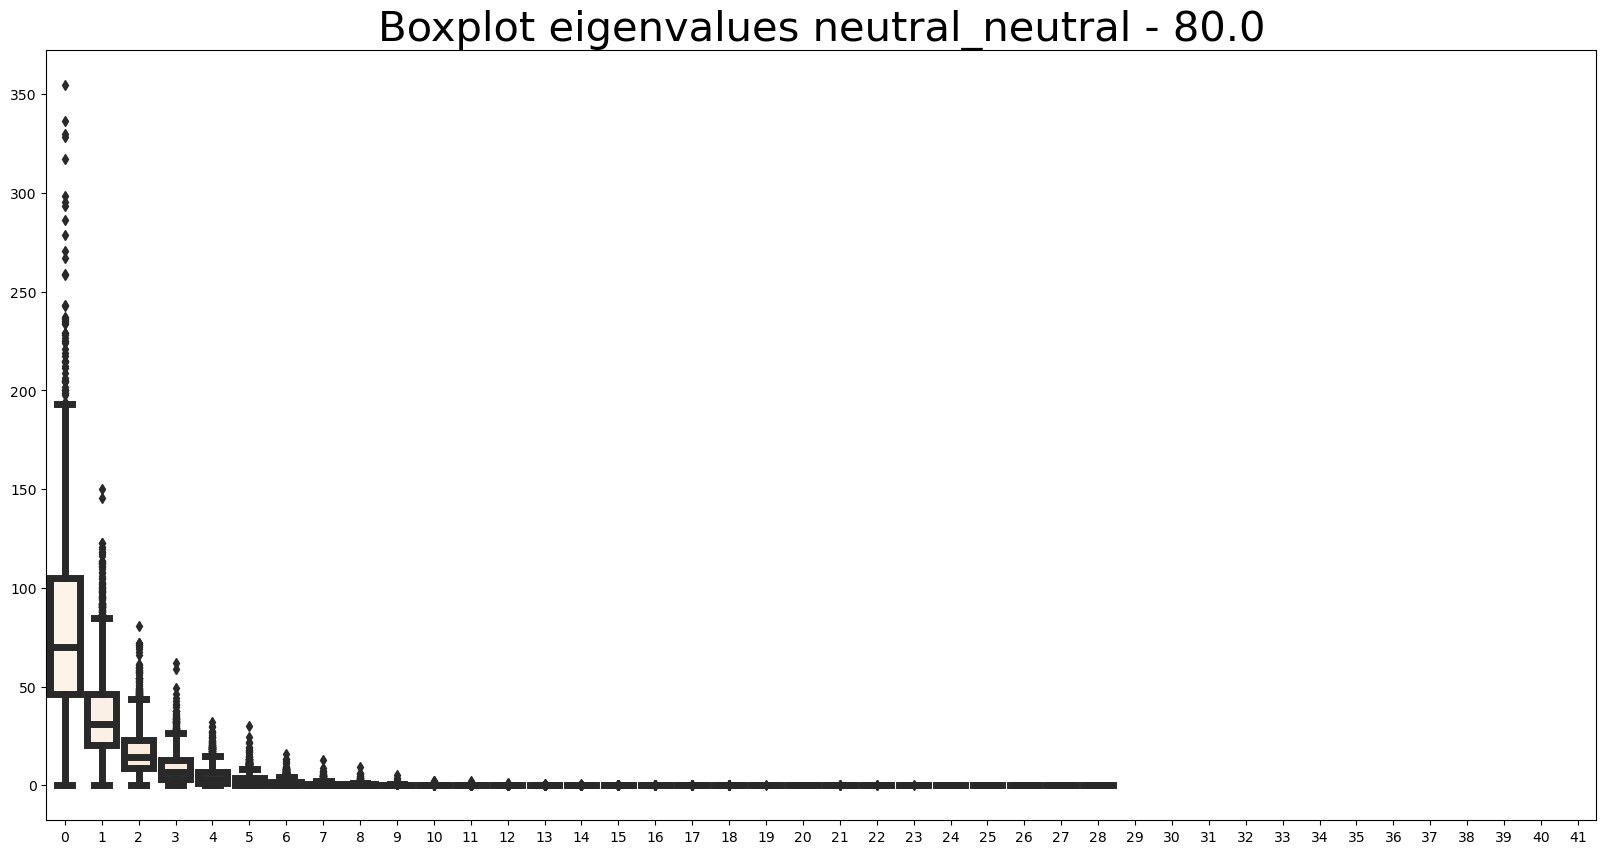

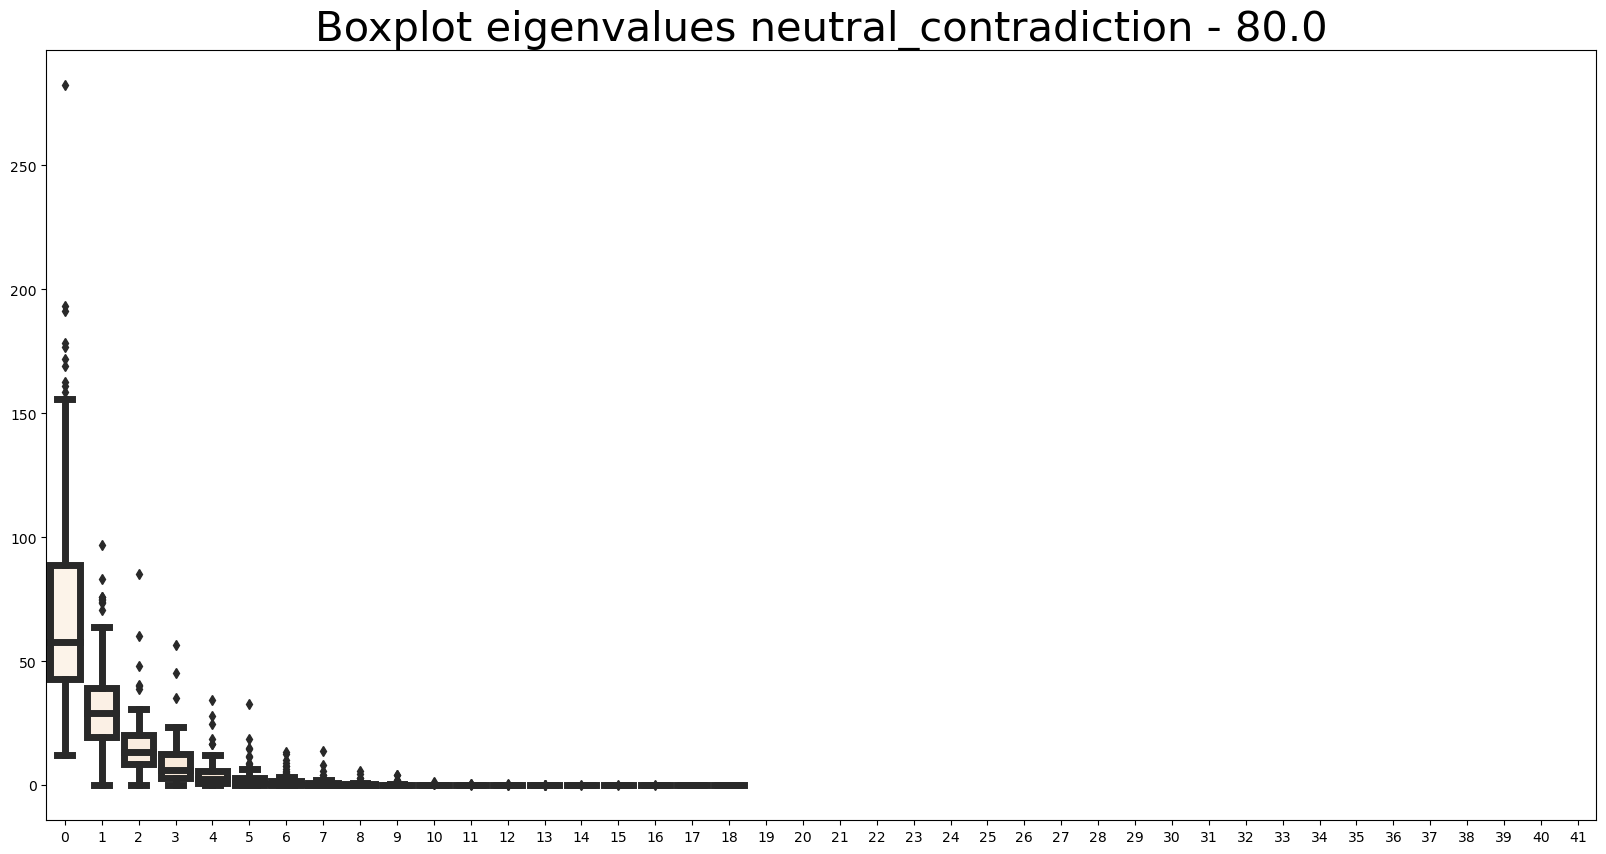

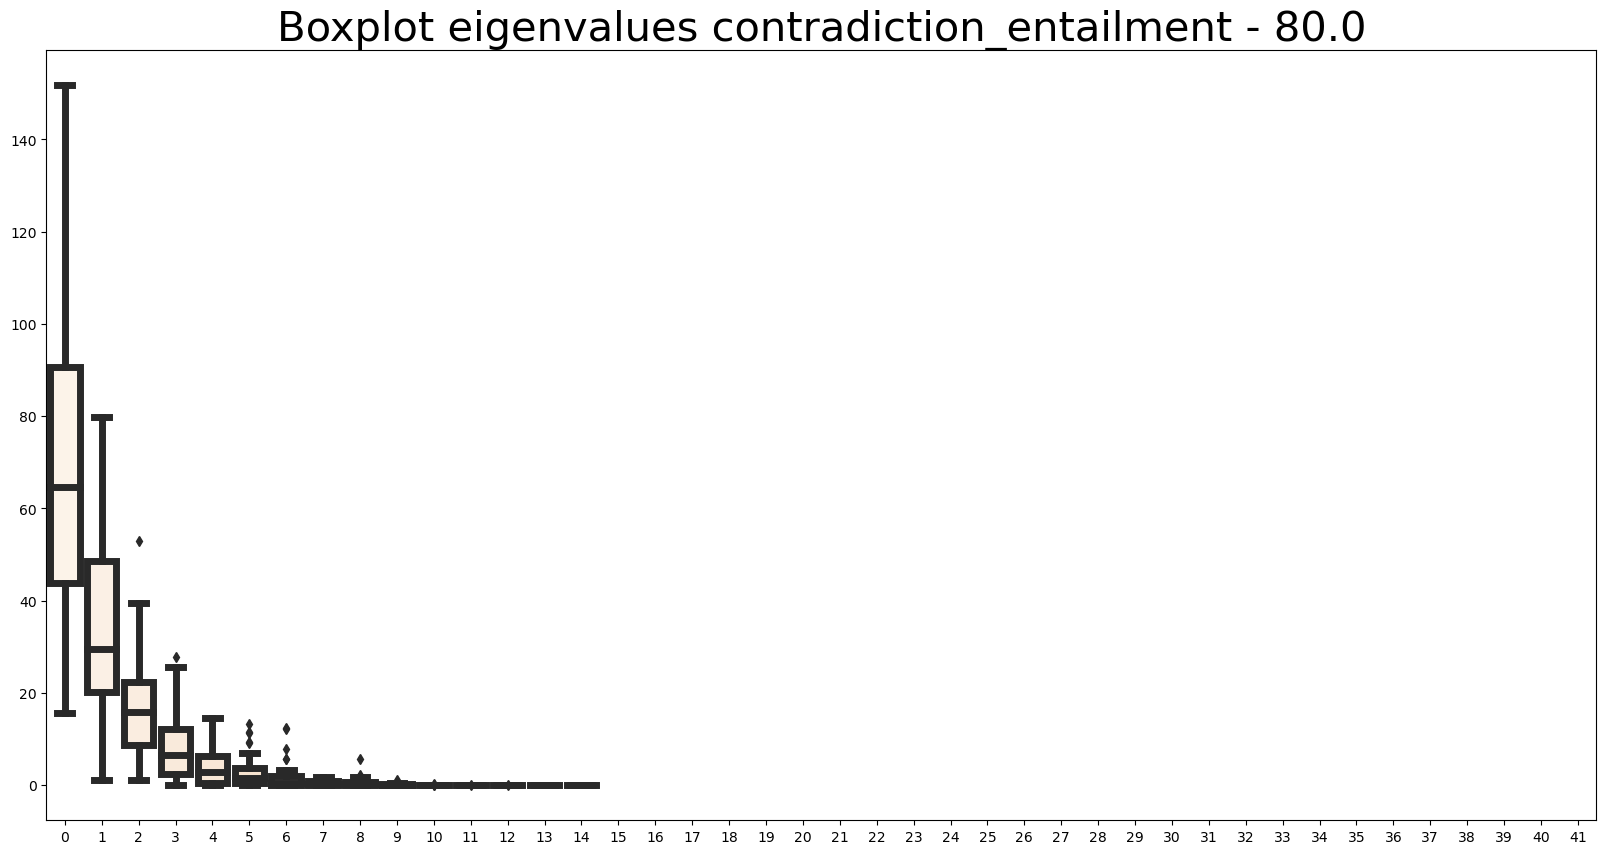

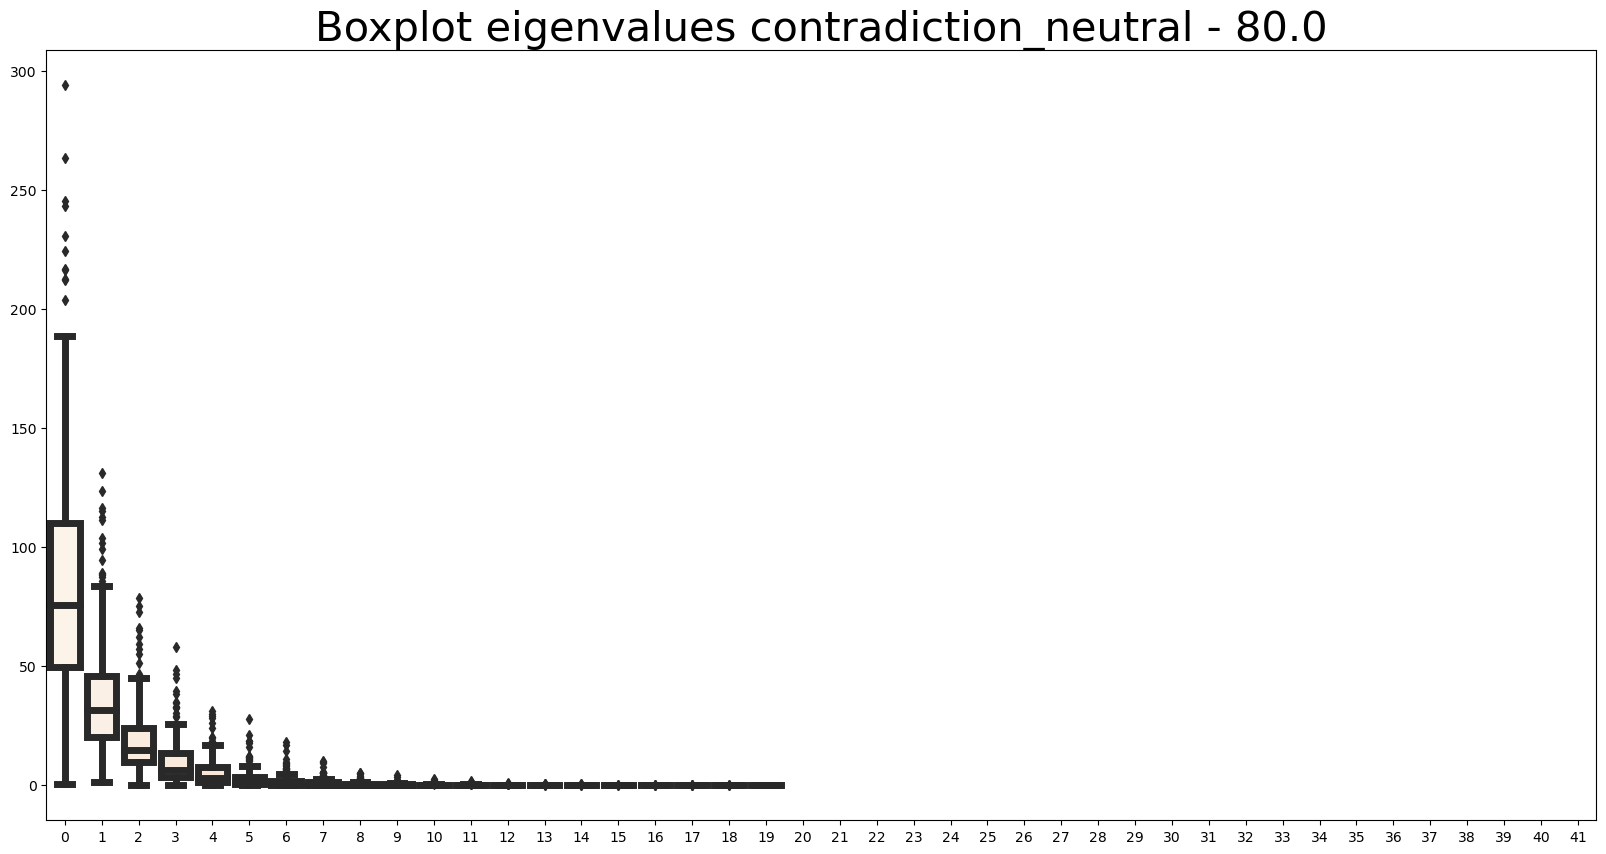

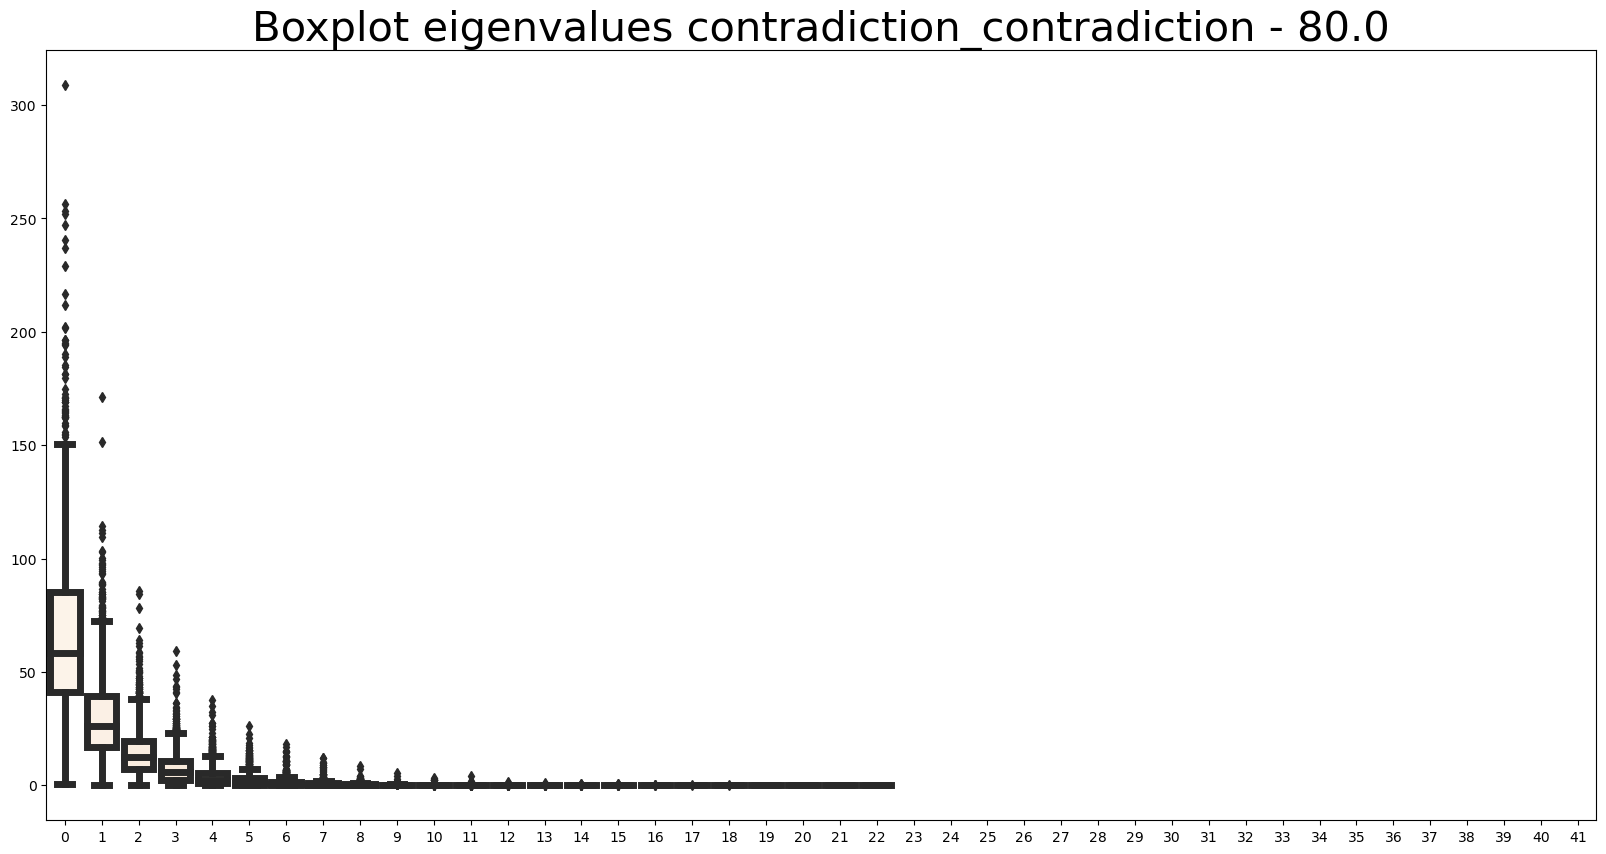

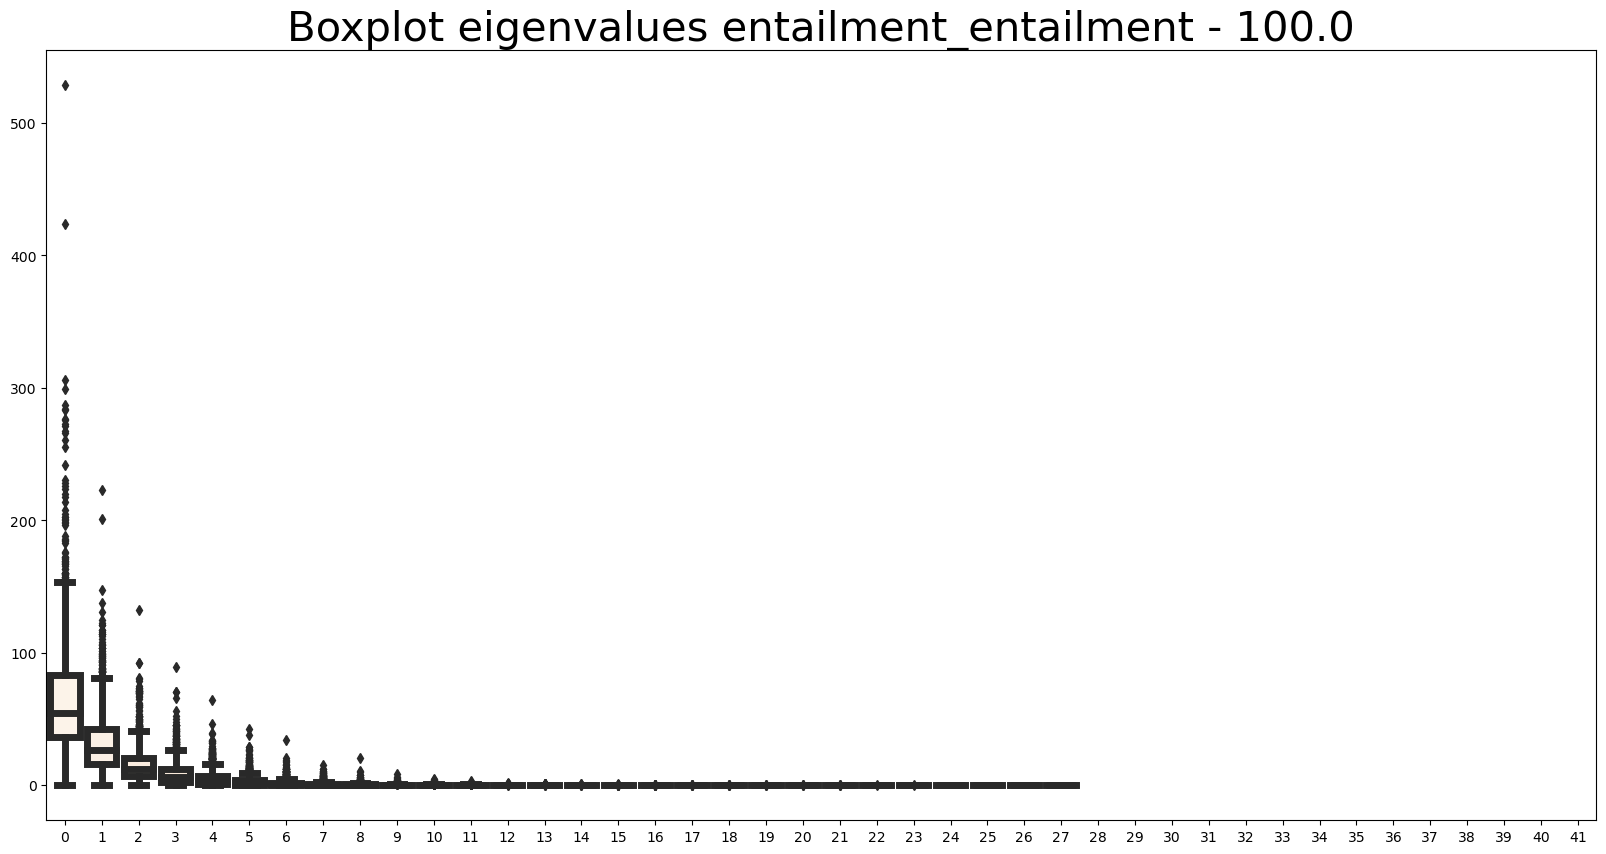

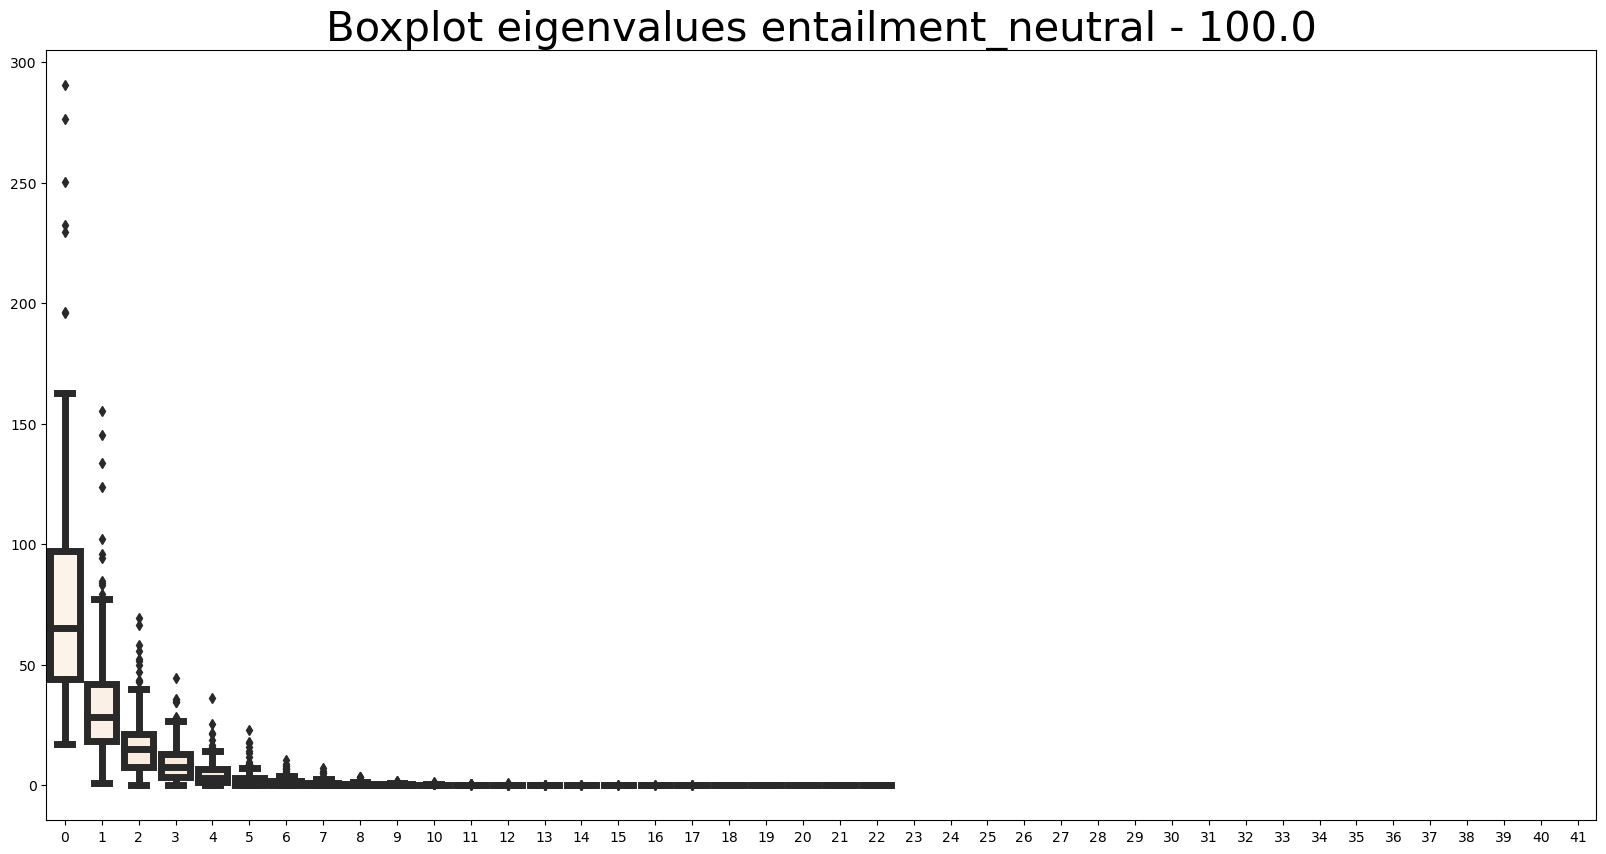

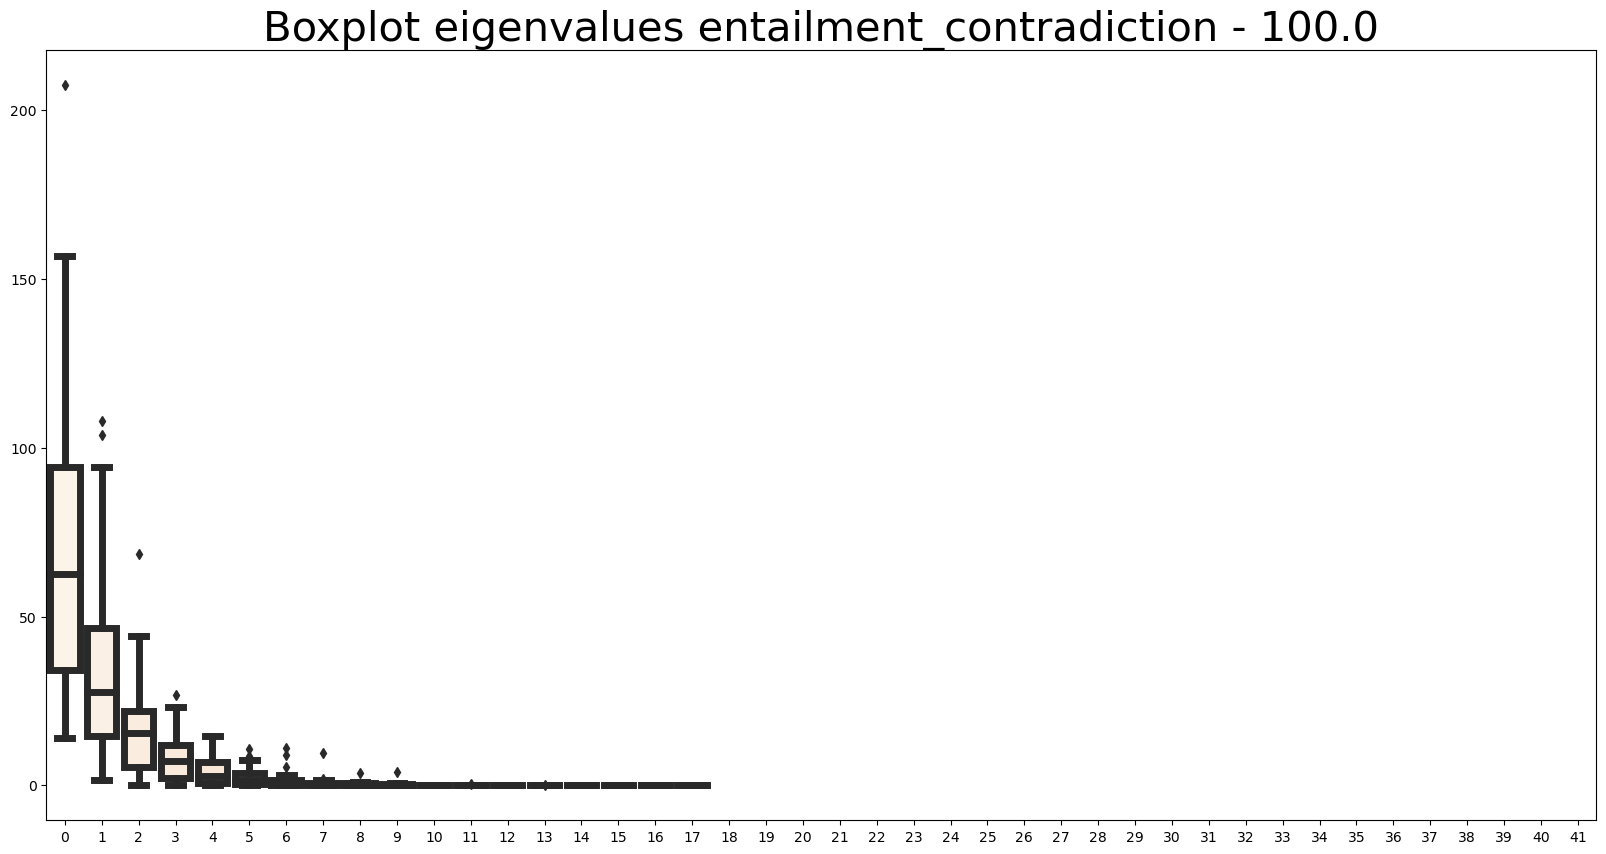

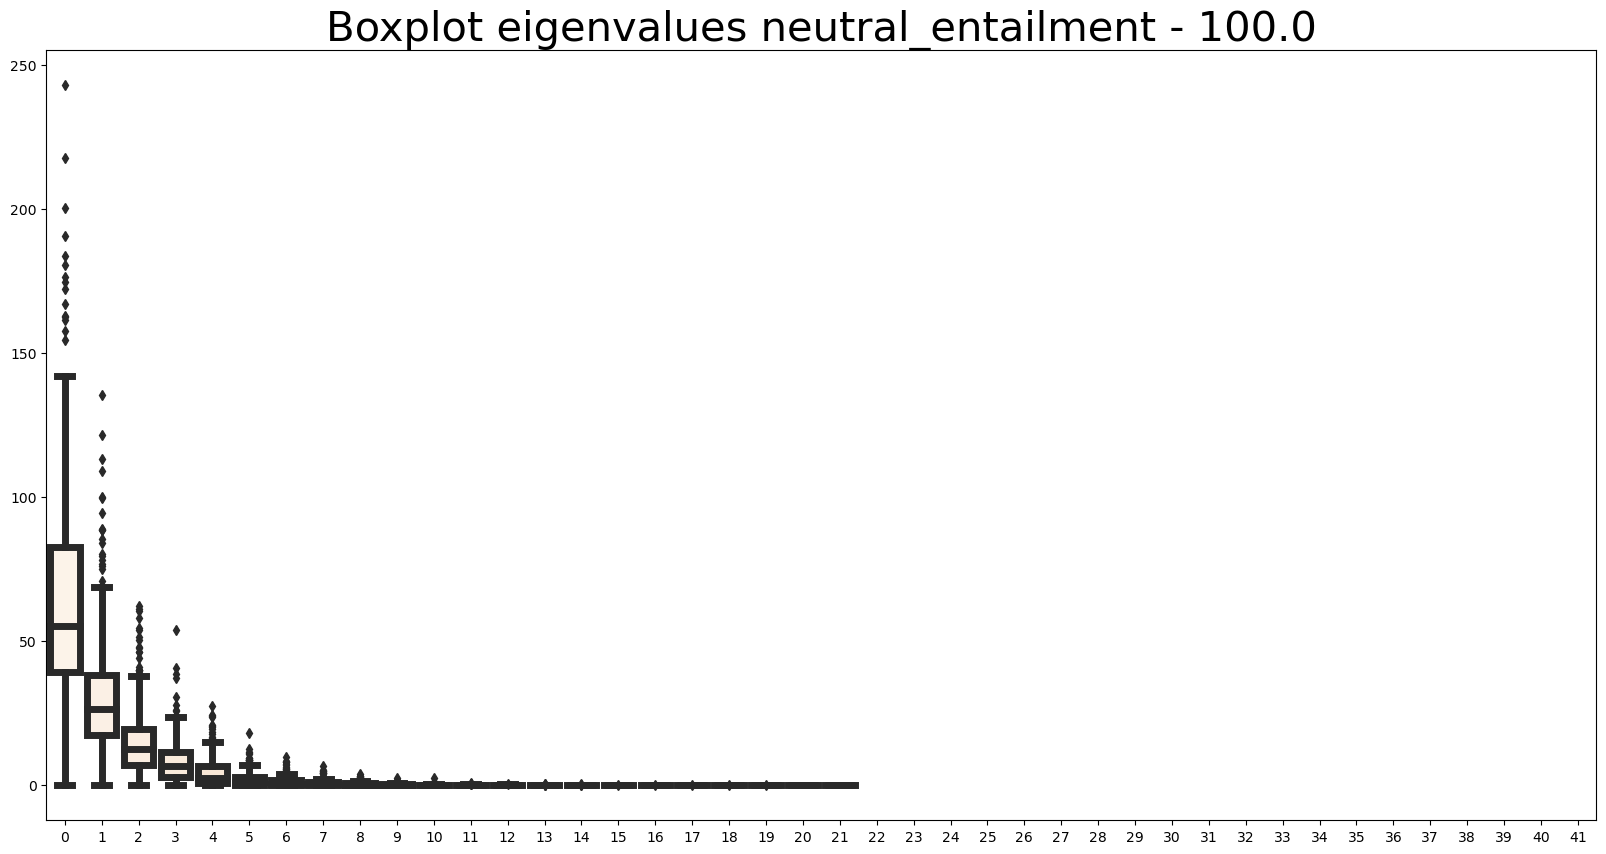

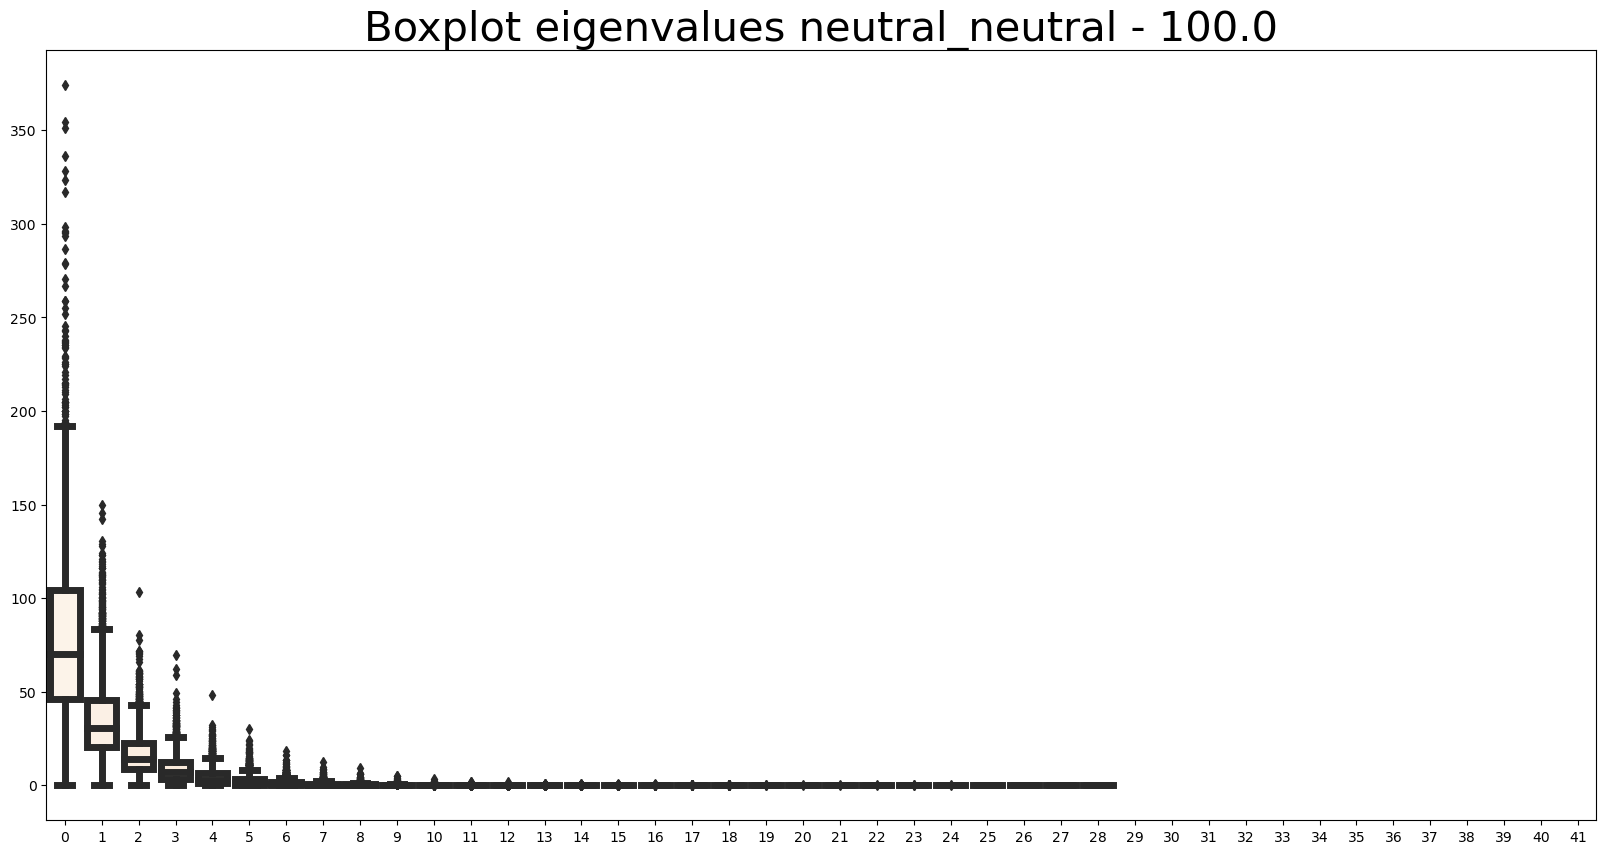

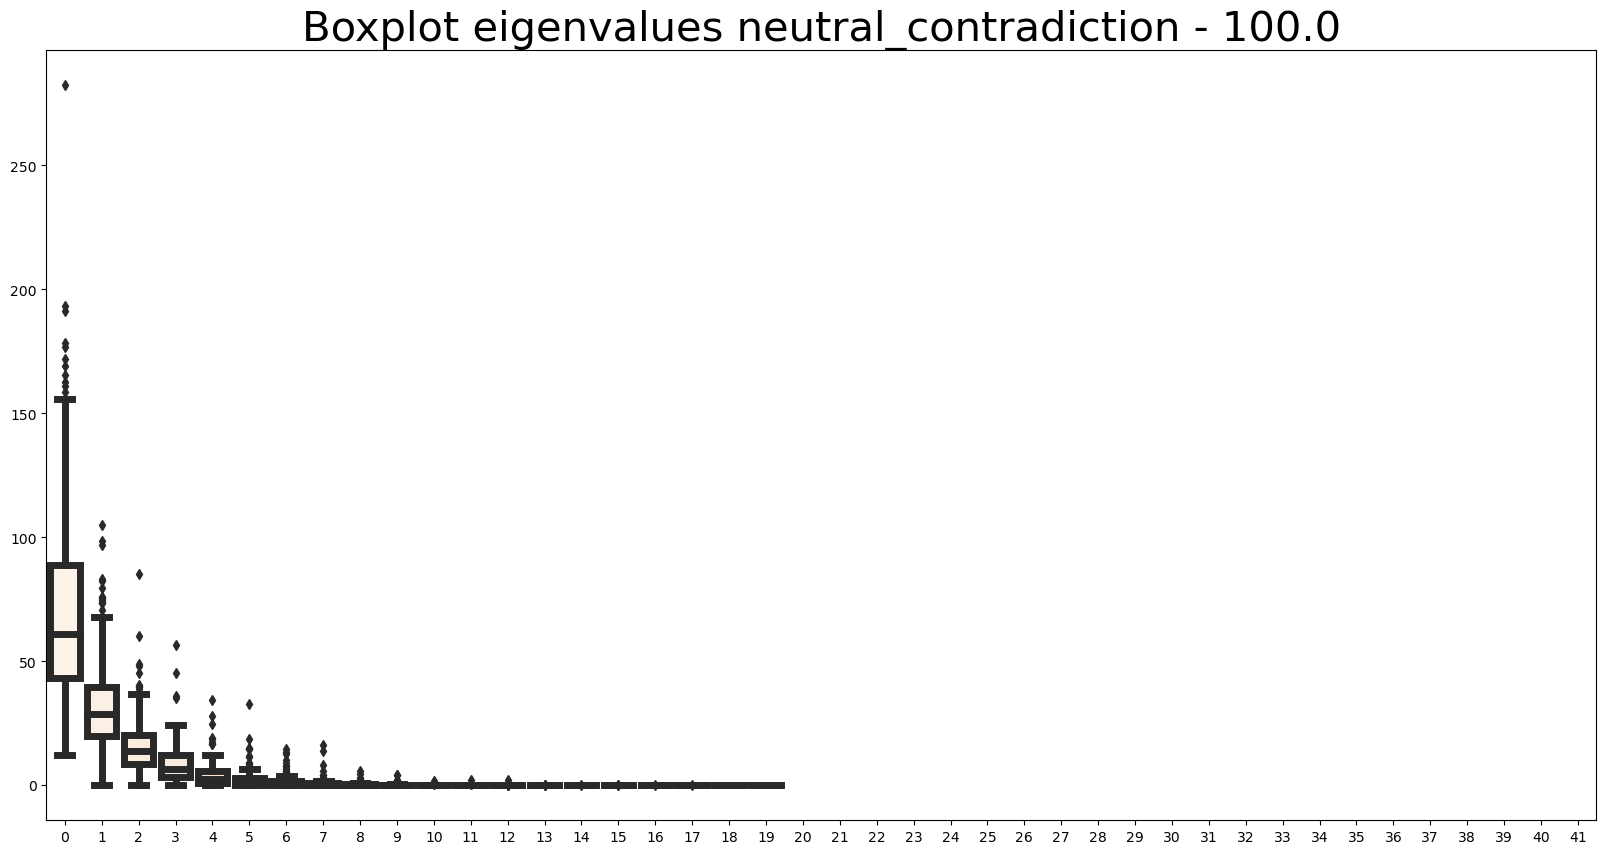

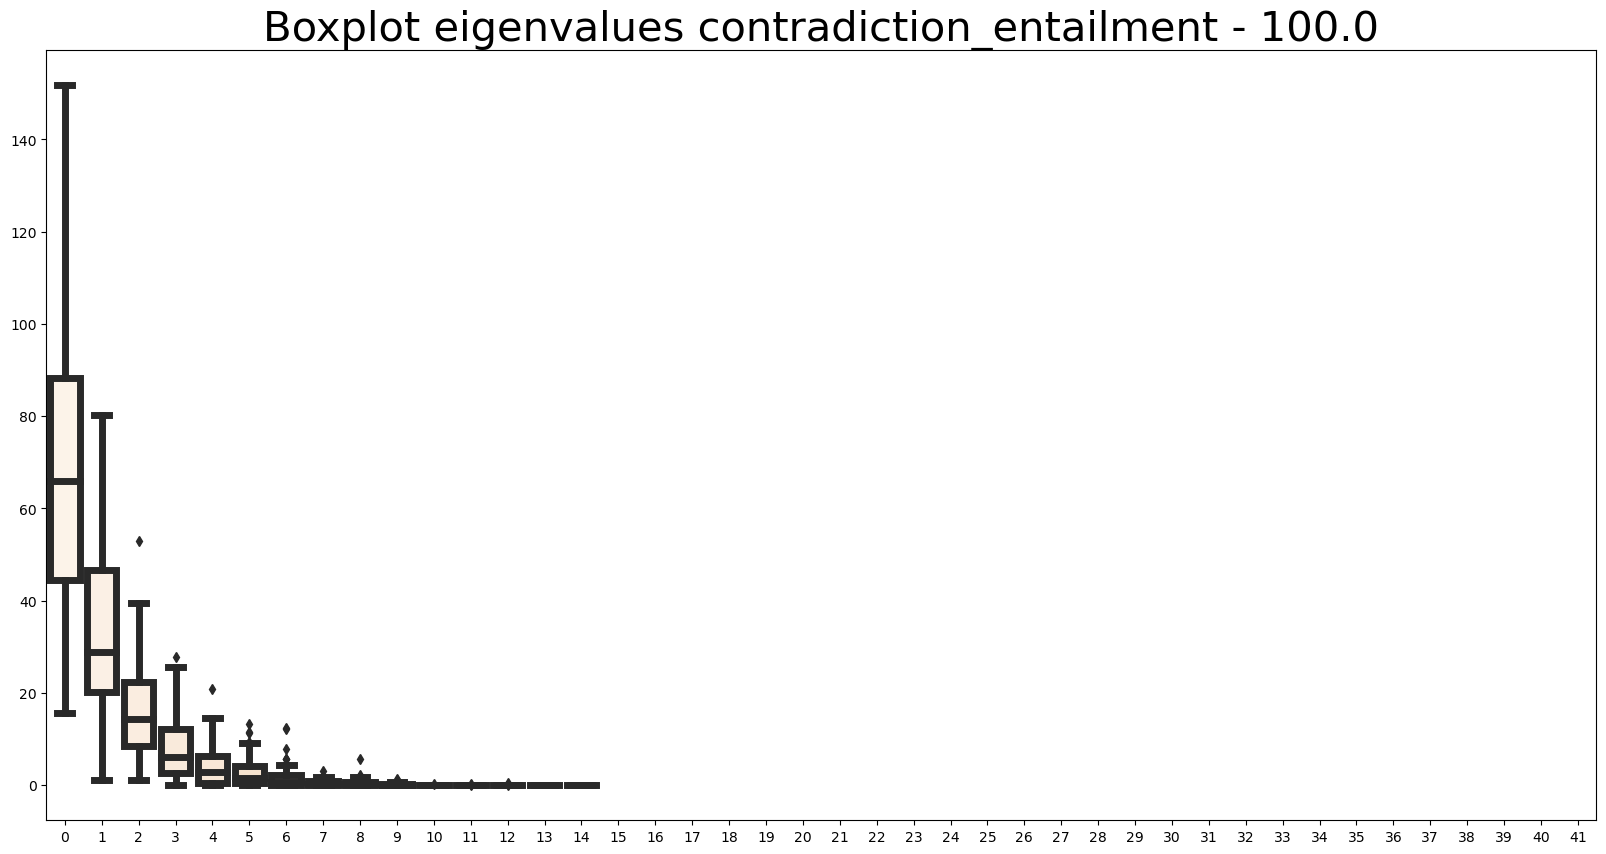

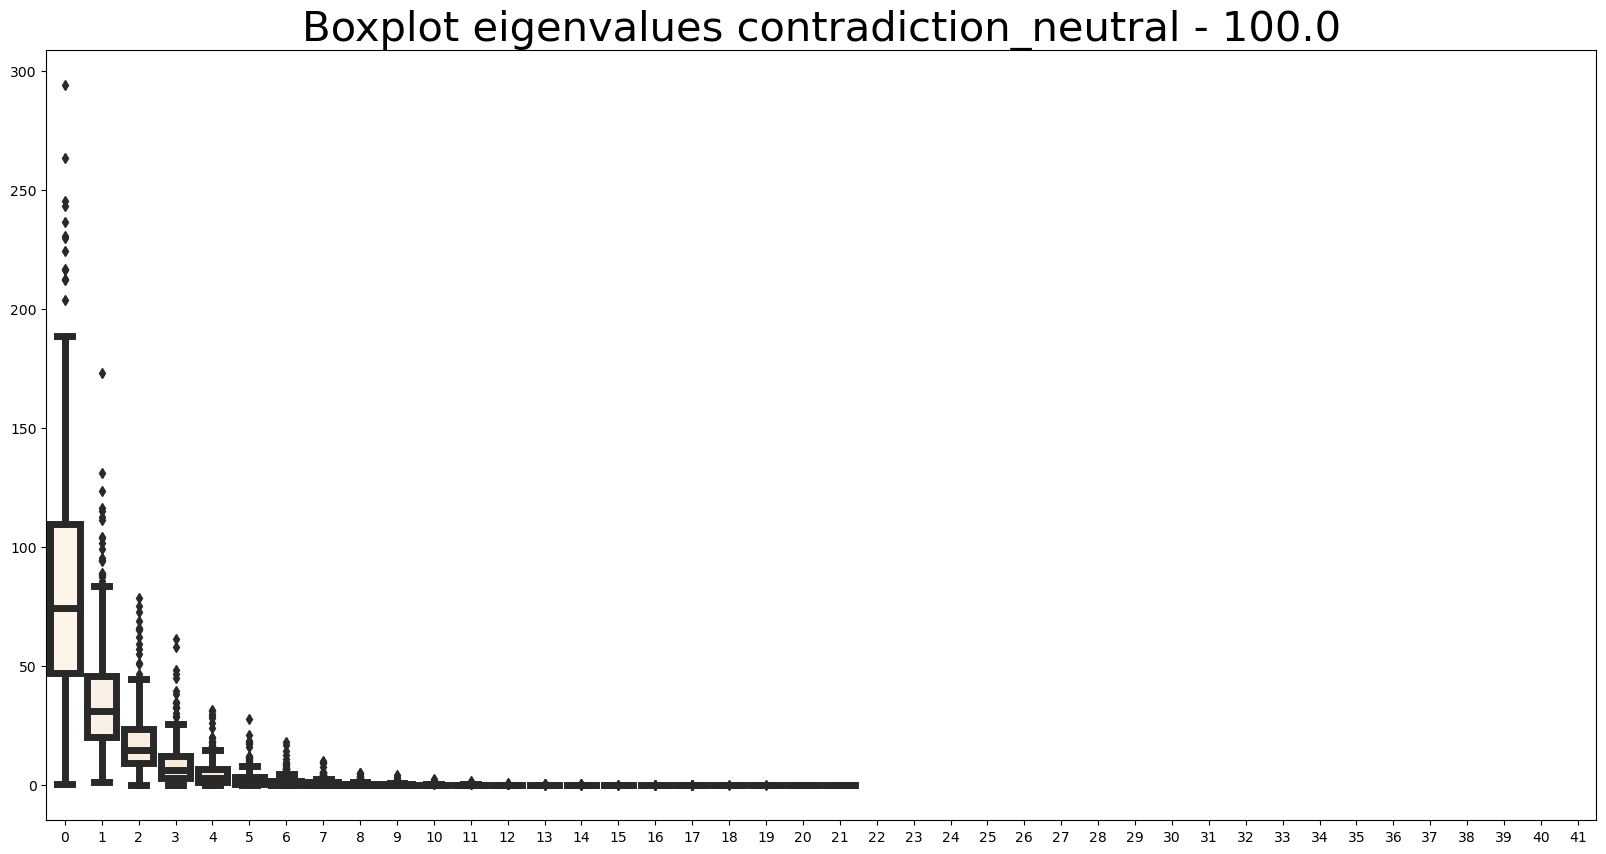

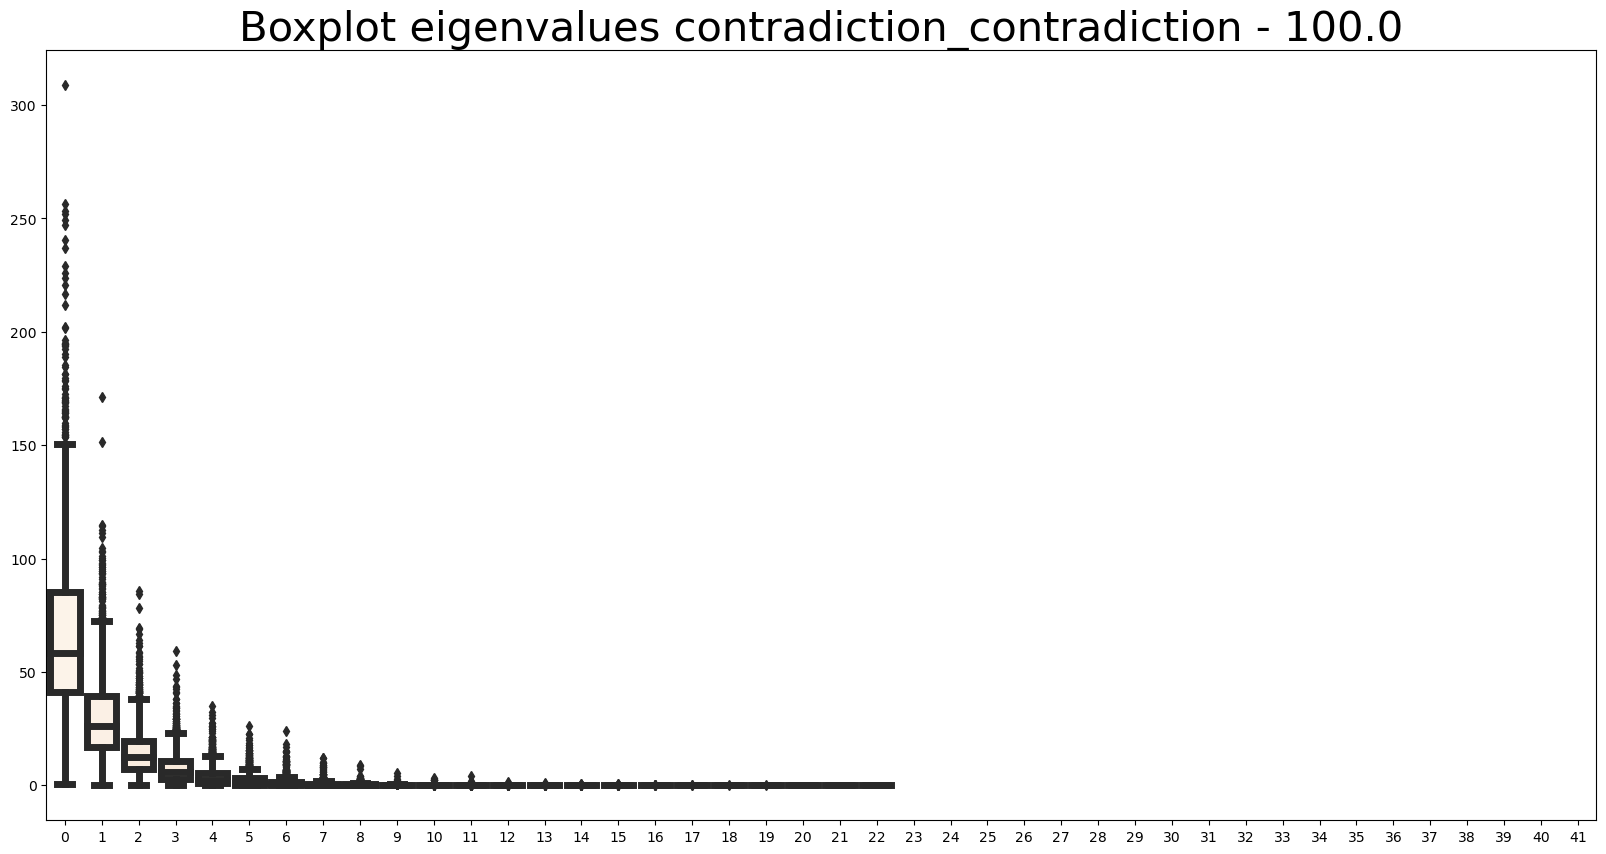

In [42]:
for gb in grupos_box:
    for et in eti_box:
        df=dfn[(dfn["grupo"]==gb) & (dfn["E_P"]==et)]
        lista_eigenvalues=[]
        for index,strings in df.iterrows():
            data=strings[6]
            #print(strings["E_P"],strings["grupo"])
            #print(data[0])
            #print(data[1:])
            for i in range(42):
                columna = [float(fila[i]) for fila in data if i < len(fila)]
                #print(columna)
                lista_eigenvalues.append(columna)
            fig2 = plt.figure(figsize=(20,10))
            #ax.tick_params(labelsize=10)
            #ax.grid(visible=True)
            plt.title("Boxplot eigenvalues "+et+" - "+str(gb),fontsize=30)
            bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")
            break
        

In [ ]:
lista_eigenvalues

[[42.08087,
  62.523476,
  29.60789,
  44.297653,
  92.12063,
  60.607395,
  42.469032,
  119.341385,
  137.86183,
  68.32848,
  72.568115,
  128.8557,
  84.73515,
  60.307728,
  49.487907,
  60.370274,
  36.55351,
  59.729183,
  48.716484,
  53.24939,
  36.488422,
  68.51858,
  34.771606,
  50.36612,
  98.3021,
  50.033985,
  37.76495,
  55.927387,
  66.861534,
  50.58563,
  53.636627,
  131.54169,
  47.412663,
  21.719042,
  40.18985,
  110.28296,
  54.602135,
  39.211994,
  33.709576,
  54.28029,
  68.82015,
  (147.6407+0j),
  74.34464,
  19.12077,
  32.718174,
  94.89795,
  144.18393,
  73.00247,
  63.791763,
  63.51944,
  71.594406,
  65.40456,
  122.21037,
  113.71737,
  35.96813,
  54.093864,
  28.649836,
  67.51706,
  48.720364,
  149.0954,
  71.75541,
  30.414722,
  57.593525,
  64.0102,
  65.64974,
  78.51613,
  77.28594,
  35.65043,
  49.371784,
  91.58573,
  60.141727,
  26.179317,
  25.00515,
  41.824158,
  41.32215,
  104.77101,
  49.932194,
  30.596998,
  55.64651,
  (19

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7efd4478b760>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41')])

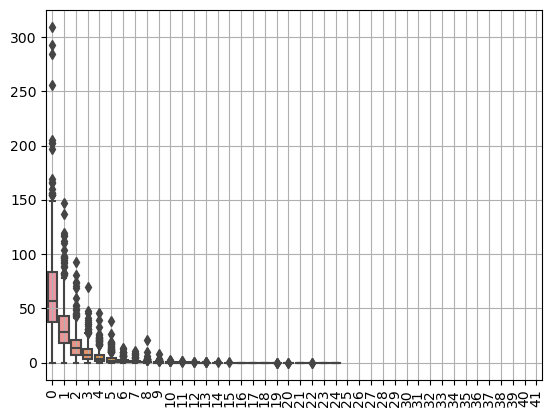

In [ ]:
sns.boxplot(data=lista_eigenvalues)
plt.grid()
plt.xticks(np.arange(42),rotation=90)

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


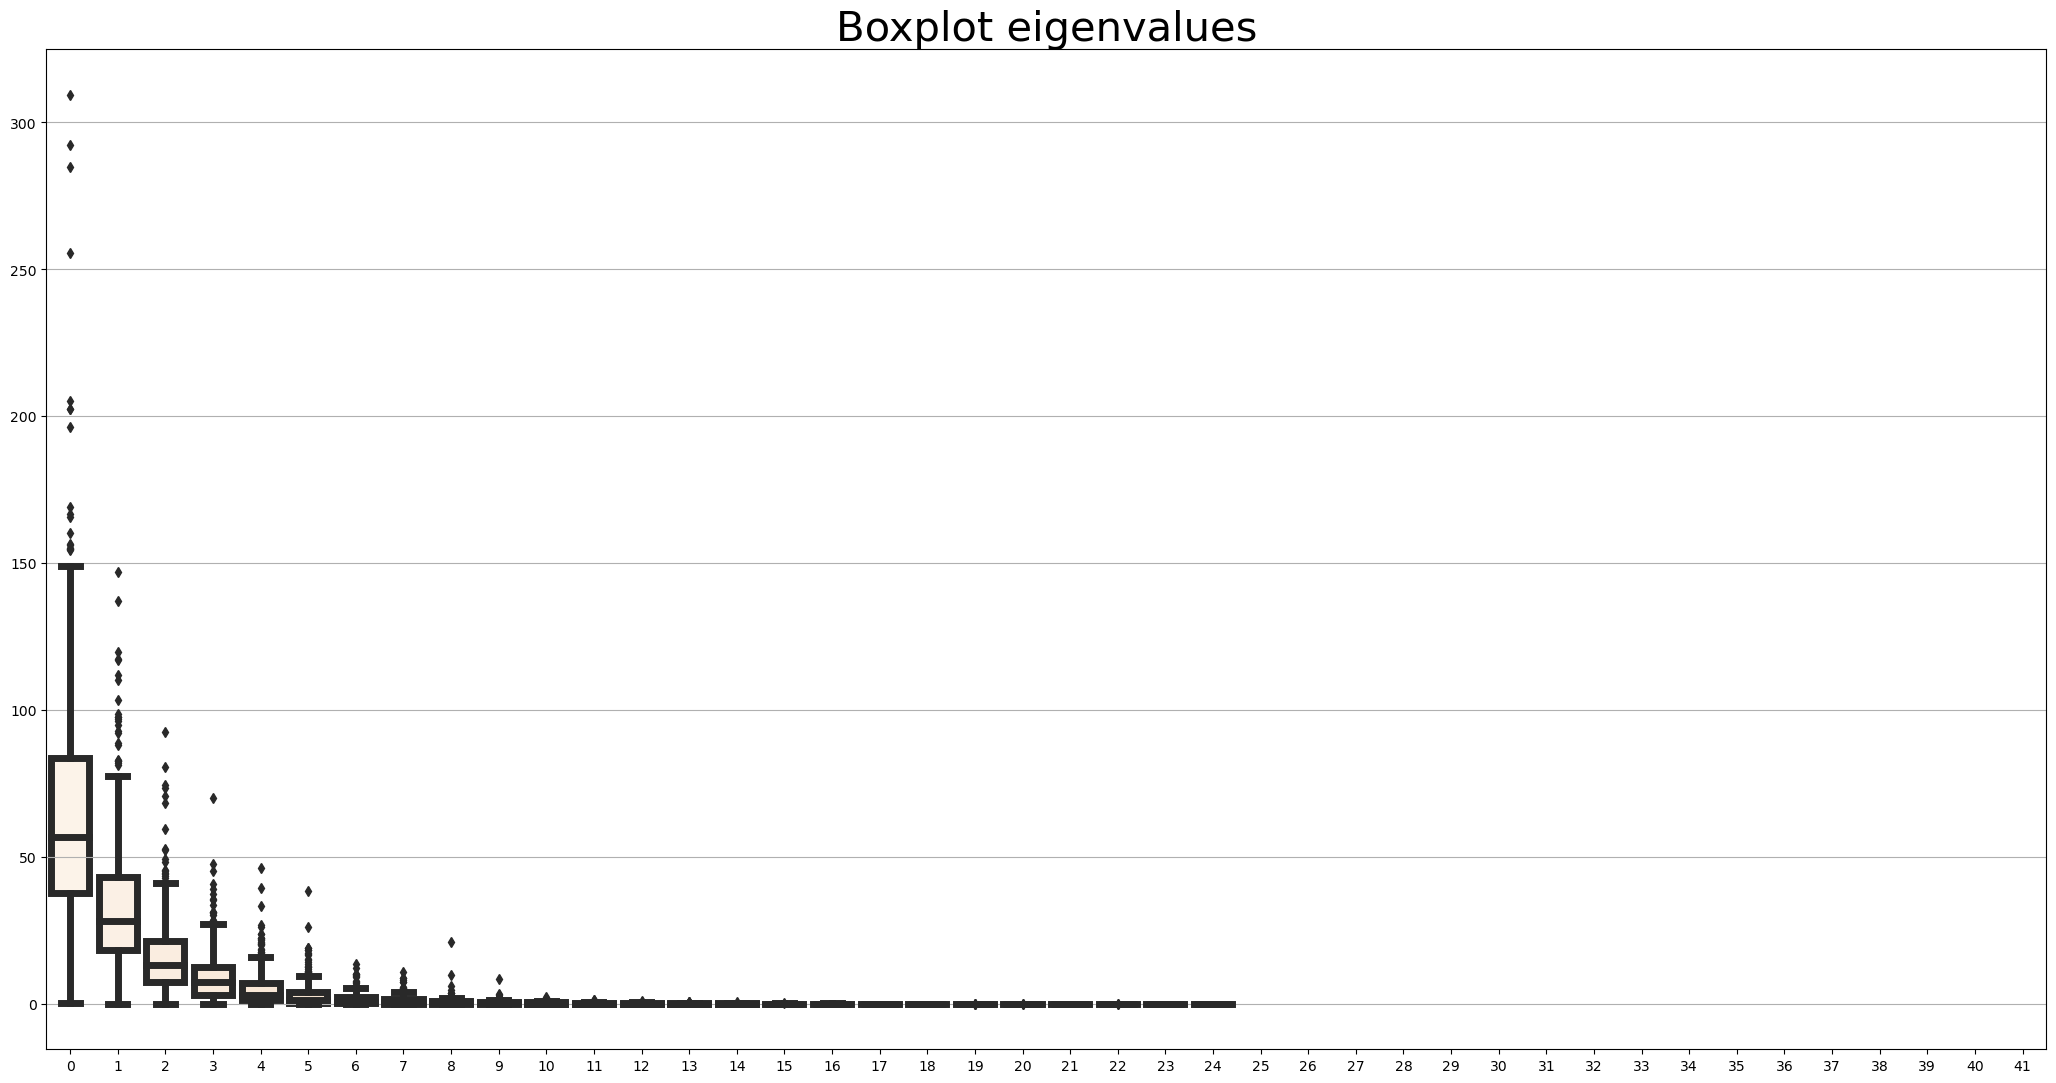

In [ ]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=10)
ax.grid(visible=True)
plt.title("Boxplot eigenvalues",fontsize=30)
bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")

In [ ]:
s=np.transpose(m)*m

In [ ]:
m_n=normalize_2d(s)

In [ ]:
x, v = np.linalg.eig (m_n)

In [ ]:
x

array([ 8.2198036e-01,  4.4953737e-01,  3.3778334e-01,  9.0338141e-02,
        1.5342963e-03, -1.3962749e-03, -1.1090860e-03,  5.2070891e-04,
       -8.6099935e-05,  2.1168440e-04,  1.3158313e-04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
v

array([[-1.8347610e-03,  8.8550820e-04, -2.9179843e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.8047651e-02,  5.6653398e-01, -8.1549281e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.6764369e-01,  7.7380818e-01,  5.7283217e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [ ]:
len(v)

42